<a href="https://colab.research.google.com/github/Minh-A/Bitcoin_fluctuation_prediction/blob/main/Fluctuation_Prediction_Beta3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 설명
* https://blog.naver.com/jeonghj66/222008532124
* https://blog.naver.com/naiy0404/222230337030


# 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

# 성능지표
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as mt

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/real_final_data.csv', encoding='cp949')

In [ ]:
data.tail()

date Up/Down  원/달러(저가)  ...  reserve_usd_all       reserve   reserve_usd
1197  2021-05-13      Up    1128.3  ...     1.200000e+11  1.261852e+06  6.268501e+10
1198  2021-05-14    Down    1127.5  ...     1.210000e+11  1.269391e+06  6.331977e+10
1199  2021-05-15    Down    1127.5  ...     1.140000e+11  1.275133e+06  5.962342e+10
1200  2021-05-16    Down    1127.5  ...     1.130000e+11  1.278611e+06  5.936626e+10
1201  2021-05-17    Down    1127.0  ...     1.070000e+11  1.296740e+06  5.648334e+10

[5 rows x 80 columns]

In [ ]:
data.head()

date Up/Down  원/달러(저가)  ...  reserve_usd_all        reserve   reserve_usd
0  2018-02-01    Down    1068.5  ...     1.863463e+10  642450.952764  5.879285e+09
1  2018-02-02    Down    1070.7  ...     1.822771e+10  661565.889330  5.853314e+09
2  2018-02-03      Up    1070.7  ...     1.871951e+10  659549.653501  6.003224e+09
3  2018-02-04    Down    1070.7  ...     1.707094e+10  681863.948930  5.605143e+09
4  2018-02-05    Down    1087.6  ...     1.454652e+10  701178.409165  4.858823e+09

[5 rows x 80 columns]

In [ ]:
a5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/국제금시세.csv', encoding='cp949')

In [ ]:
a5.head()

date    파실 때  보내실 때   받으실 때
0  2021-05-17  1867.5   29.6  0.0161
1  2021-05-14  1837.9   14.1  0.0077
2  2021-05-13  1823.8    1.2  0.0006
3  2021-05-12  1822.6   13.3 -0.0072
4  2021-05-11  1835.9    1.6 -0.0008

In [ ]:
a5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    828 non-null    object 
 1   파실 때    828 non-null    float64
 2   보내실 때   828 non-null    float64
 3   받으실 때   828 non-null    float64
dtypes: float64(3), object(1)
memory usage: 26.0+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1202 non-null   object 
 1   Up/Down                  1202 non-null   object 
 2   원/달러(저가)                 1202 non-null   float64
 3   원/달러(종가)                 1202 non-null   float64
 4    open _x                 1202 non-null   int64  
 5    high _x                 1202 non-null   int64  
 6    low _x                  1202 non-null   int64  
 7    close _x                1202 non-null   int64  
 8   전일대비                     1202 non-null   int64  
 9   증감률                      1202 non-null   float64
 10   volume _x               1202 non-null   int64  
 11   value                   1202 non-null   float64
 12  MA(5)                    1202 non-null   int64  
 13  WMA(5)                   1202 non-null   int64  
 14  중심선                     

In [ ]:
 a1_13 = pd.merge(data, a5, how='left', left_on= 'date', right_on= "date")

In [ ]:
a1_13

date Up/Down  원/달러(저가)  ...    파실 때  보내실 때   받으실 때
0     2018-02-01    Down    1068.5  ...  1344.3    5.3  0.0039
1     2018-02-02    Down    1070.7  ...  1333.7   10.6 -0.0078
2     2018-02-03      Up    1070.7  ...     NaN    NaN     NaN
3     2018-02-04    Down    1070.7  ...     NaN    NaN     NaN
4     2018-02-05    Down    1087.6  ...  1333.0    0.7 -0.0005
...          ...     ...       ...  ...     ...    ...     ...
1197  2021-05-13      Up    1128.3  ...  1823.8    1.2  0.0006
1198  2021-05-14    Down    1127.5  ...  1837.9   14.1  0.0077
1199  2021-05-15    Down    1127.5  ...     NaN    NaN     NaN
1200  2021-05-16    Down    1127.5  ...     NaN    NaN     NaN
1201  2021-05-17    Down    1127.0  ...  1867.5   29.6  0.0161

[1202 rows x 83 columns]

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1201
Data columns (total 83 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1202 non-null   object 
 1   Up/Down                  1202 non-null   object 
 2   원/달러(저가)                 1202 non-null   float64
 3   원/달러(종가)                 1202 non-null   float64
 4    open _x                 1202 non-null   int64  
 5    high _x                 1202 non-null   int64  
 6    low _x                  1202 non-null   int64  
 7    close _x                1202 non-null   int64  
 8   전일대비                     1202 non-null   int64  
 9   증감률                      1202 non-null   float64
 10   volume _x               1202 non-null   int64  
 11   value                   1202 non-null   float64
 12  MA(5)                    1202 non-null   int64  
 13  WMA(5)                   1202 non-null   int64  
 14  중심선                     

In [ ]:
data1.to_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/final_data_0601_3.csv', encoding='cp949', index = False)

In [ ]:
data12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/final_data_0601_1.csv', encoding='cp949')

In [ ]:
data23 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/업비트_데이터_작업.csv', encoding='cp949')

In [ ]:
data12.head(3)

date Up/Down  원/달러(저가)  ...         파실 때  보내실 때     받으실 때
0  2018-02-01    Down    1068.5  ...  1344.300000    5.3  0.003900
1  2018-02-02    Down    1070.7  ...  1333.700000   10.6 -0.007800
2  2018-02-03      Up    1070.7  ...  1333.466667    7.3 -0.005367

[3 rows x 82 columns]

In [ ]:
data23.head(3)

date  프리미엄%_업비트  프리미엄%_코인베이스
0  2018-02-01     1.8431      -2.2797
1  2018-02-02    -1.7767      -0.9637
2  2018-02-03        NaN          NaN

In [ ]:
 a1_13 = pd.merge(data12, data23, how='left', left_on= 'date', right_on= "date")

In [ ]:
a1_13

date Up/Down  원/달러(저가)  ...     받으실 때  프리미엄%_업비트  프리미엄%_코인베이스
0     2018-02-01    Down    1068.5  ...  0.003900     1.8431      -2.2797
1     2018-02-02    Down    1070.7  ... -0.007800    -1.7767      -0.9637
2     2018-02-03      Up    1070.7  ... -0.005367        NaN          NaN
3     2018-02-04    Down    1070.7  ... -0.002933        NaN          NaN
4     2018-02-05    Down    1087.6  ... -0.000500     3.6777      -0.5014
...          ...     ...       ...  ...       ...        ...          ...
1197  2021-05-13      Up    1128.3  ...  0.000600    12.4356       0.0385
1198  2021-05-14    Down    1127.5  ...  0.007700     9.8593       0.1044
1199  2021-05-15    Down    1127.5  ...  0.010500        NaN          NaN
1200  2021-05-16    Down    1127.5  ...  0.013300        NaN          NaN
1201  2021-05-17    Down    1127.0  ...  0.016100     7.1811      -4.7175

[1202 rows x 84 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1202 non-null   object 
 1   Up/Down                  1202 non-null   object 
 2   원/달러(저가)                 1202 non-null   float64
 3   원/달러(종가)                 1202 non-null   float64
 4    open _x                 1202 non-null   int64  
 5    high _x                 1202 non-null   int64  
 6    low _x                  1202 non-null   int64  
 7    close _x                1202 non-null   int64  
 8   전일대비                     1202 non-null   int64  
 9   증감률                      1202 non-null   float64
 10   volume _x               1202 non-null   int64  
 11   value                   1202 non-null   float64
 12  MA(5)                    1202 non-null   int64  
 13  WMA(5)                   1202 non-null   int64  
 14  중심선                     

In [ ]:
data.head()

date Up/Down  원/달러(저가)  ...  reserve_usd_all        reserve   reserve_usd
0  2018-02-01    Down    1068.5  ...     1.863463e+10  642450.952764  5.879285e+09
1  2018-02-02    Down    1070.7  ...     1.822771e+10  661565.889330  5.853314e+09
2  2018-02-03      Up    1070.7  ...     1.871951e+10  659549.653501  6.003224e+09
3  2018-02-04    Down    1070.7  ...     1.707094e+10  681863.948930  5.605143e+09
4  2018-02-05    Down    1087.6  ...     1.454652e+10  701178.409165  4.858823e+09

[5 rows x 80 columns]

선형 보간법

In [ ]:
# 선형 보간법으로 결측치를 없앰
data1 = a1_13.interpolate(method="linear")

In [ ]:
data1.head(3)

date Up/Down  원/달러(저가)  ...     받으실 때  프리미엄%_업비트  프리미엄%_코인베이스
0  2018-02-01    Down    1068.5  ...  0.003900   1.843100      -2.2797
1  2018-02-02    Down    1070.7  ... -0.007800  -1.776700      -0.9637
2  2018-02-03      Up    1070.7  ... -0.005367   0.041433      -0.8096

[3 rows x 84 columns]

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/final_data_0601_3.csv', encoding='cp949')

데이터 셋 분류

In [ ]:
# 상승, 하락에 굉장한 영향을 미치는 컬럼
mu = ['상승분','전일대비','증감률','전일대비.1','하락분']

# RF, LGBM, XGB로 뽑은 Top15개의 컬럼
top15_list=['%K','%B','mpi','outflow_mean','market_premium','%D','RS',' volume _y','volume','outflow_total','nvt_golden_cross','  value ','stock_to_flow',' volume _x','AU']

hab = ['date'	,'Up/Down', '상승분','전일대비','증감률','전일대비.1','하락분', '%K','%B','mpi','outflow_mean','market_premium','%D','RS',' volume _y','volume','outflow_total']

In [ ]:
wow = ['date'	,'Up/Down', '전일대비', '상승분', '증감률', '하락분', '%K', '%B', '%D', '프리미엄%_업비트', 'outflow_top10', 'reserve_bi', 'mpi', '원/달러(저가)', 'reserve_der', 'reserve_x', '받으실 때', 'reserve_usd_der', 'stock_to_flow']

In [ ]:
# 데이터 확인
data.loc[:,wow]

date Up/Down     전일대비  ...     받으실 때  reserve_usd_der  stock_to_flow
0     2018-02-01    Down -1359000  ...  0.003900       5879284961    8419.788648
1     2018-02-02    Down  -660000  ... -0.007800       5853314467    8019.846331
2     2018-02-03      Up   110000  ... -0.005367       6003224244    8528.431542
3     2018-02-04    Down  -620000  ... -0.002933       5605143266    7571.180807
4     2018-02-05    Down -1068000  ... -0.000500       4858822798    7285.703698
...          ...     ...      ...  ...       ...              ...            ...
1197  2021-05-13      Up   812000  ...  0.000600      62685006732   18593.170360
1198  2021-05-14    Down -1272000  ...  0.007700      63319768235   22340.555440
1199  2021-05-15    Down -2990000  ...  0.010500      59623423482   24339.491290
1200  2021-05-16    Down -1158000  ...  0.013300      59366258340   22680.980520
1201  2021-05-17    Down -2018000  ...  0.016100      56483344613   24743.887840

[1202 rows x 19 columns]

In [ ]:
data1 = data.loc[:,wow]

In [ ]:
# 훈련데이터 셋과 테스트데이터 셋을 분류
train = data1.iloc[:-37,:]
test = data1.iloc[-37:,:]

In [ ]:
# 각 데이터 셋에서 Feature와 label을 분류
train_feature = train.iloc[:,2:]
train_label = train.iloc[:,1]

test_feature = test.iloc[:,2:]
test_label = test.iloc[:,1]

원핫인코딩 처리

In [ ]:
# label은 원핫인코딩 처리
train_label1 = pd.get_dummies(train_label)
test_label1 = pd.get_dummies(test_label)

In [ ]:
test_label1.head(5)

Down  Up
1165     0   1
1166     1   0
1167     0   1
1168     1   0
1169     1   0

데이터 정규화를 사용

In [ ]:
# 데이터 정규화 (MinMax정규화)
from sklearn.preprocessing import StandardScaler

# 훈련 데이터셋 feature
scaler = StandardScaler()

train_feature = scaler.fit_transform(train_feature)
train_feature = pd.DataFrame(train_feature)

# 테스트 데이터셋 feature
scaler = StandardScaler()

test_feature = scaler.fit_transform(test_feature)
test_feature1 = pd.DataFrame(test_feature)

train_feature.head(3), test_feature1.head(3)

(         0         1         2   ...        14        15        16
 0 -1.912860 -0.371653 -3.429955  ...  0.374276 -0.588361 -0.838840
 1 -0.968986 -0.371653 -1.918622  ... -0.890423 -0.590329 -0.916043
 2  0.070760 -0.169959  0.266302  ... -0.627395 -0.578970 -0.817867
 
 [3 rows x 17 columns],
          0         1         2   ...        14        15        16
 0  0.331817 -0.315226  0.303816  ... -1.406463  0.765055 -0.196478
 1  0.021496 -0.500041  0.036939  ... -1.374195  0.734472 -0.161964
 2  1.267169  1.719482  1.112535  ...  0.769325  1.700895 -0.091724
 
 [3 rows x 17 columns])

In [ ]:
# # 데이터 정규화 (MinMax정규화)
# from sklearn.preprocessing import MinMaxScaler

# # 훈련 데이터셋 feature
# scaler = MinMaxScaler()

# train_feature = scaler.fit_transform(train_feature)
# train_feature = pd.DataFrame(train_feature)

# # 테스트 데이터셋 feature
# scaler = MinMaxScaler()

# test_feature = scaler.fit_transform(test_feature)
# test_feature1 = pd.DataFrame(test_feature)

# train_feature.head(3), test_feature1.head(3)

슬라이딩 윈도우 형태로 데이터를 변환

In [ ]:
# (배치 사이즈, 날짜, 속성)으로 데이터 셋을 생성
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
# 데이터 셋을 슬라이딩 윈도우 형식으로 만들기

# 훈련데이터 셋
train_feature1, train_label = make_dataset(train_feature, train_label1, 7)

#테스트 데이터 셋
test_feature, test_label = make_dataset(test_feature1, test_label1, 7)

x_train = train_feature1
y_train = train_label

x_train.shape, y_train.shape, test_label.shape

# # Validation 셋을 추가함
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(train_feature1, train_label1, test_size=0.2, shuffle=False)

# x_train.shape, x_valid.shape, test_feature.shape, test_label.shape

((1158, 7, 17), (1158, 2), (30, 2))

# 모델링

## GRU 0.833

In [ ]:
# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_19 (GRU)                 (None, 7, 8)              648       
_________________________________________________________________
gru_20 (GRU)                 (None, 7, 16)             1248      
_________________________________________________________________
gru_21 (GRU)                 (None, 7, 32)             4800      
_________________________________________________________________
gru_22 (GRU)                 (None, 64)                18816     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 25,642
Trainable params: 25,642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 생성
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, GRU, SimpleRNN
import tensorflow as tf

tf.random.set_seed(2)

model = Sequential()

# model.add(GRU(32, 
#                input_shape=(train_feature1.shape[1], train_feature1.shape[2]), 
#                activation='tanh', return_sequences = True))

model.add(GRU(16, 
               activation='tanh', return_sequences = True))

model.add(GRU(64, 
               activation='tanh', return_sequences = True))

model.add(GRU(128, 
               activation='tanh'))  #, return_sequences = True))

# model.add(GRU(512, 
#                activation='tanh'))

model.add(Dense(2, activation='softmax'))

In [ ]:
# 모델 학습
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=31, epochs=41)  

Epoch 1/41
38/38 [==============================] - 33s 16ms/step - loss: 0.6936 - accuracy: 0.5171
Epoch 2/41
38/38 [==============================] - 1s 16ms/step - loss: 0.6814 - accuracy: 0.5425
Epoch 3/41
38/38 [==============================] - 1s 16ms/step - loss: 0.6802 - accuracy: 0.5752
Epoch 4/41
38/38 [==============================] - 1s 16ms/step - loss: 0.6850 - accuracy: 0.5299
Epoch 5/41
38/38 [==============================] - 1s 16ms/step - loss: 0.6735 - accuracy: 0.5667
Epoch 6/41
38/38 [==============================] - 1s 16ms/step - loss: 0.6773 - accuracy: 0.5582
Epoch 7/41
38/38 [==============================] - 1s 16ms/step - loss: 0.6752 - accuracy: 0.5562
Epoch 8/41
38/38 [==============================] - 1s 17ms/step - loss: 0.6699 - accuracy: 0.5824
Epoch 9/41
38/38 [==============================] - 1s 17ms/step - loss: 0.6620 - accuracy: 0.5839
Epoch 10/41
38/38 [==============================] - 1s 16ms/step - loss: 0.6654 - accuracy: 0.5837
Epoch 11

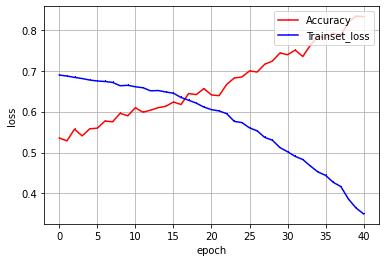

In [ ]:
# 모델 loss 그래프

y_test_loss = history.history['accuracy']
y_train_loss = history.history['loss']

x_len = np.arange(len(y_test_loss))
plt.plot(x_len, y_test_loss, marker=',', c='red', label='Accuracy')
plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

모델 예측

In [ ]:
# 모델 예측
pred = model.predict(test_feature)
pred

array([[9.9545044e-01, 4.5495285e-03],
       [6.2583411e-01, 3.7416586e-01],
       [1.7353191e-04, 9.9982649e-01],
       [6.8497282e-01, 3.1502715e-01],
       [8.8805500e-03, 9.9111944e-01],
       [2.4128047e-07, 9.9999976e-01],
       [3.6442846e-02, 9.6355712e-01],
       [5.3270739e-01, 4.6729264e-01],
       [3.2264988e-06, 9.9999678e-01],
       [3.8753033e-02, 9.6124697e-01],
       [9.9714714e-01, 2.8528406e-03],
       [9.9991894e-01, 8.1067534e-05],
       [8.7828588e-01, 1.2171404e-01],
       [9.9387121e-01, 6.1287908e-03],
       [9.9936682e-01, 6.3315162e-04],
       [9.9559528e-01, 4.4047297e-03],
       [9.9881709e-01, 1.1829096e-03],
       [6.9136280e-01, 3.0863723e-01],
       [9.9999380e-01, 6.1768283e-06],
       [9.9993157e-01, 6.8412039e-05],
       [4.9528044e-01, 5.0471956e-01],
       [9.8102140e-01, 1.8978564e-02],
       [7.6050885e-02, 9.2394912e-01],
       [1.0000000e+00, 4.7669002e-09],
       [9.8797333e-01, 1.2026603e-02],
       [6.9606667e-03, 9.

예측값을 원핫인코딩으로 전환

In [ ]:
# 위치를 숫자로 반환
preds = np.argmax(pred, axis=1)
preds

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
# 원핫인코딩
preds1 = pd.get_dummies(preds)
preds1

0  1
0   1  0
1   1  0
2   0  1
3   1  0
4   0  1
5   0  1
6   0  1
7   1  0
8   0  1
9   0  1
10  1  0
11  1  0
12  1  0
13  1  0
14  1  0
15  1  0
16  1  0
17  1  0
18  1  0
19  1  0
20  0  1
21  1  0
22  0  1
23  1  0
24  1  0
25  0  1
26  0  1
27  0  1
28  0  1
29  0  1

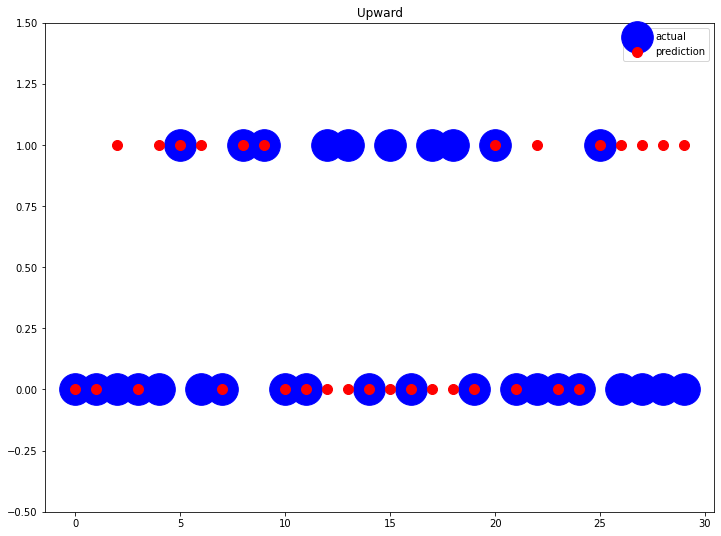

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(pd.DataFrame(test_label).index, test_label[:,1], label = 'actual', s = 1000, c = 'b')
plt.scatter(pd.DataFrame(test_label).index, preds1[1], label = 'prediction', s= 100, c = 'red')
plt.ylim([-0.5, 1.5])
plt.title("Upward") 
plt.legend()
plt.show()

성능지표

In [ ]:
test_label1 = np.array(test_label).argmax(axis=1)

# 성능평가: 하나로 묶어서
print('accuracy',mt.accuracy_score(test_label1,preds))
print(confusion_matrix(test_label1, preds))
print(classification_report(test_label1, preds, target_names=['하락', '상승']))

accuracy 0.5666666666666667
[[12  8]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.71      0.60      0.65        20
          상승       0.38      0.50      0.43        10

    accuracy                           0.57        30
   macro avg       0.55      0.55      0.54        30
weighted avg       0.60      0.57      0.58        30



In [ ]:
epoch = [20, 25, 30, 35, 40, 45, 50]

for i in epoch:

  print('\n', i)

  # 모델
  model = Sequential()

  model.add(GRU(32, 
               input_shape=(train_feature1.shape[1], train_feature1.shape[2]), 
               activation='tanh', return_sequences = True))

  model.add(GRU(64, 
               activation='tanh', return_sequences = True))

  model.add(GRU(128, 
               activation='tanh', return_sequences = True))

  model.add(GRU(256, 
               activation='tanh', return_sequences = True))
  
  model.add(GRU(512, 
               activation='tanh'))

  model.add(Dense(2, activation='softmax'))


  # 학습
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(x_train, y_train, batch_size=31, epochs=i, verbose=0)  

  # 그래프 그리기
  y_test_loss = history.history['accuracy']
  y_train_loss = history.history['loss']

  x_len = np.arange(len(y_test_loss))
  plt.plot(x_len, y_test_loss, marker=',', c='red', label='Accuracy')
  plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

  plt.legend(loc='upper right')
  plt.grid()
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  # 예측
  pred = model.predict(test_feature)

  preds = np.argmax(pred, axis=1)

  preds1 = pd.get_dummies(preds)

  plt.figure(figsize=(12, 9))
  plt.scatter(pd.DataFrame(test_label).index, test_label[:,1], label = 'actual', s = 1000, c = 'b')
  plt.scatter(pd.DataFrame(test_label).index, preds1[1], label = 'prediction', s= 100, c = 'red')
  plt.ylim([-0.5, 1.5])
  plt.title("Upward") 
  plt.legend()
  plt.show()

  test_label1 = np.array(test_label).argmax(axis=1)

  # 성능평가: 하나로 묶어서
  print('accuracy',mt.accuracy_score(test_label1,preds))
  print(confusion_matrix(test_label1, preds))
  print(classification_report(test_label1, preds, target_names=['하락', '상승']))


 20


KeyboardInterrupt: ignored


 38


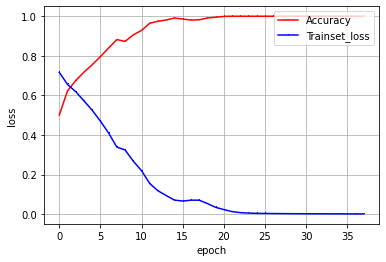

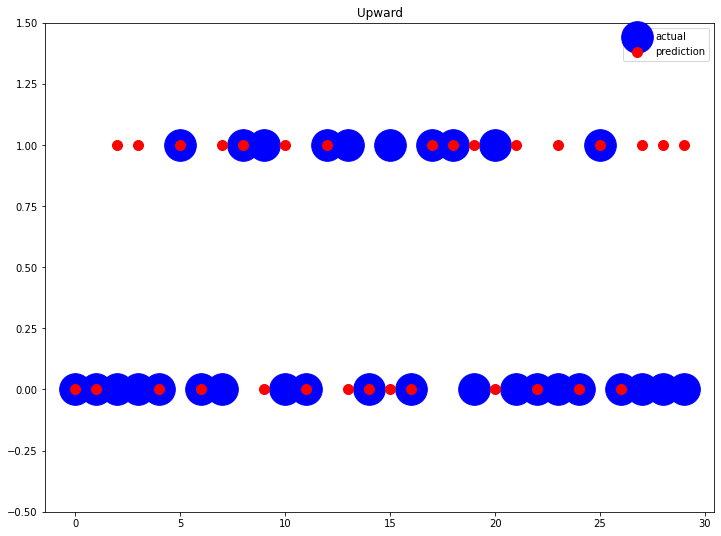

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 39


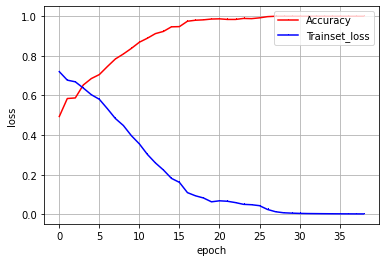

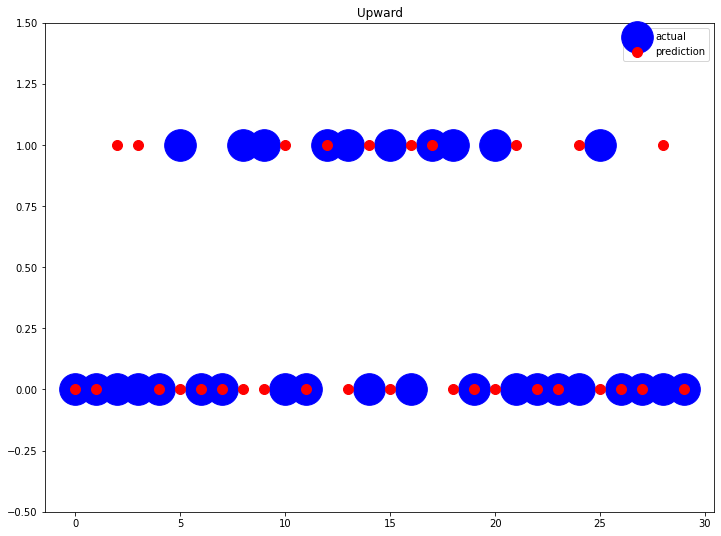

accuracy 0.4666666666666667
[[12  8]
 [ 8  2]]
              precision    recall  f1-score   support

          하락       0.60      0.60      0.60        20
          상승       0.20      0.20      0.20        10

    accuracy                           0.47        30
   macro avg       0.40      0.40      0.40        30
weighted avg       0.47      0.47      0.47        30


 40


KeyboardInterrupt: ignored

In [ ]:
epoch = [ 38, 39, 40, 41]

for i in epoch:

  print('\n', i)

  
  model = Sequential()
  
  model.add(SimpleRNN(8, 
               activation='tanh', return_sequences = True))
  
  model.add(SimpleRNN(16,
               activation='tanh', return_sequences = True))
  
  model.add(SimpleRNN(32,
               activation='tanh', return_sequences = True))
  
  model.add(SimpleRNN(64,
               activation='tanh', return_sequences = True))
  
  model.add(SimpleRNN(128,
               activation='tanh'))

  model.add(Dense(2, activation='softmax'))


  # 학습
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(x_train, y_train, batch_size=62, epochs=i, verbose=0)  

  # 그래프 그리기
  y_test_loss = history.history['accuracy']
  y_train_loss = history.history['loss']

  x_len = np.arange(len(y_test_loss))
  plt.plot(x_len, y_test_loss, marker=',', c='red', label='Accuracy')
  plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

  plt.legend(loc='upper right')
  plt.grid()
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  # 예측
  pred = model.predict(test_feature)

  preds = np.argmax(pred, axis=1)

  preds1 = pd.get_dummies(preds)

  plt.figure(figsize=(12, 9))
  plt.scatter(pd.DataFrame(test_label).index, test_label[:,1], label = 'actual', s = 1000, c = 'b')
  plt.scatter(pd.DataFrame(test_label).index, preds1[1], label = 'prediction', s= 100, c = 'red')
  plt.ylim([-0.5, 1.5])
  plt.title("Upward") 
  plt.legend()
  plt.show()

  test_label1 = np.array(test_label).argmax(axis=1)

  # 성능평가: 하나로 묶어서
  print('accuracy',mt.accuracy_score(test_label1,preds))
  print(confusion_matrix(test_label1, preds))
  print(classification_report(test_label1, preds, target_names=['하락', '상승']))

In [ ]:
x_train.shape

(1158, 7, 20)

In [ ]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-cp37-none-any.whl size=2657 sha256=a32aec1a77ab9286fe3e8171746c10a44aa60ddcd1186453dd91b573920aaff8
  Stored in directory: /root/.cache/pip/wheels/46/25/27/7707005c1cb27e1ffc8277b004ac295e34767b02b44d73d6be
Successfully built keras.utils


In [ ]:
import tensorflow as tf

categorical_labels = tf.keras.utils.to_categorical(y_train, num_classes=None)

In [ ]:
categorical_labels.shape

(1112, 2, 2)

In [ ]:
y_train.shape

(1158, 2)

# dd

In [ ]:
# 모델 생성
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, GRU, SimpleRNN
import tensorflow as tf


 37
몇 번 돌림 0


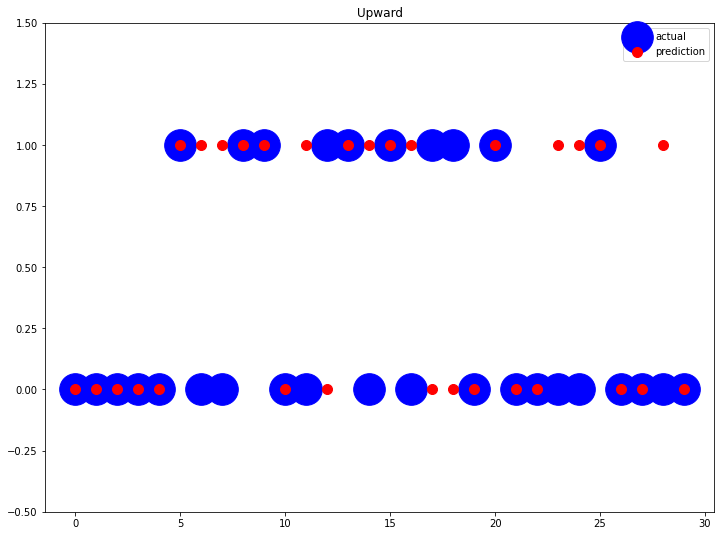

accuracy 0.6333333333333333
[[12  8]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.80      0.60      0.69        20
          상승       0.47      0.70      0.56        10

    accuracy                           0.63        30
   macro avg       0.63      0.65      0.62        30
weighted avg       0.69      0.63      0.64        30


 37
몇 번 돌림 1


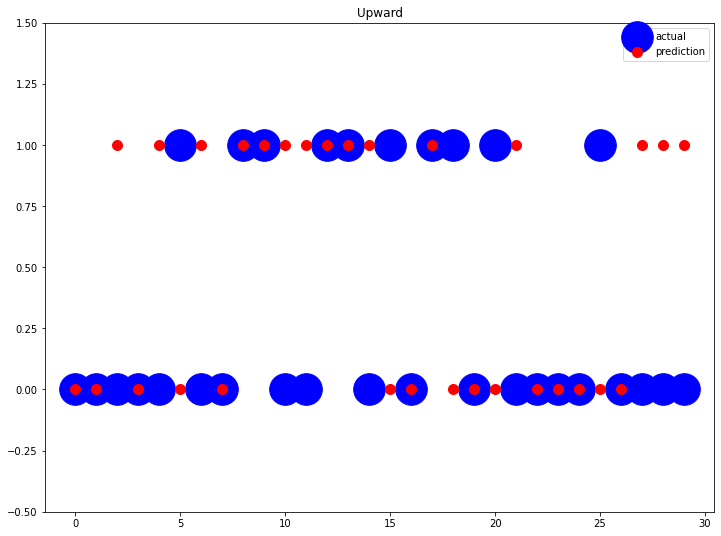

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 37
몇 번 돌림 2


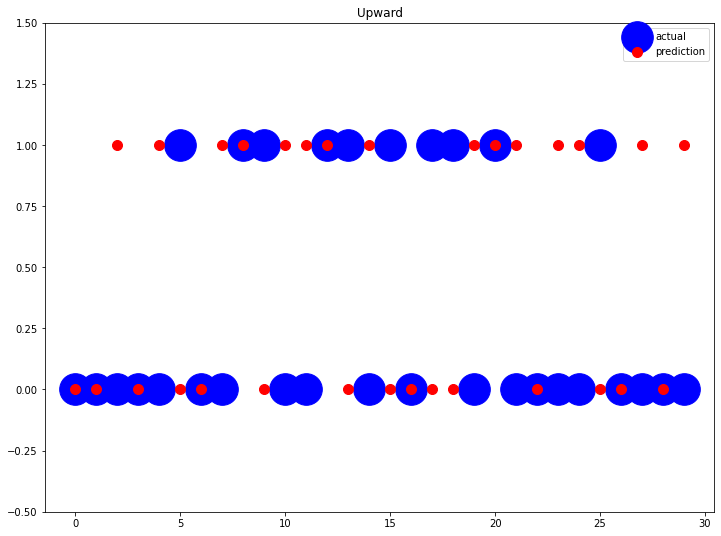

accuracy 0.36666666666666664
[[ 8 12]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.53      0.40      0.46        20
          상승       0.20      0.30      0.24        10

    accuracy                           0.37        30
   macro avg       0.37      0.35      0.35        30
weighted avg       0.42      0.37      0.38        30


 37
몇 번 돌림 3


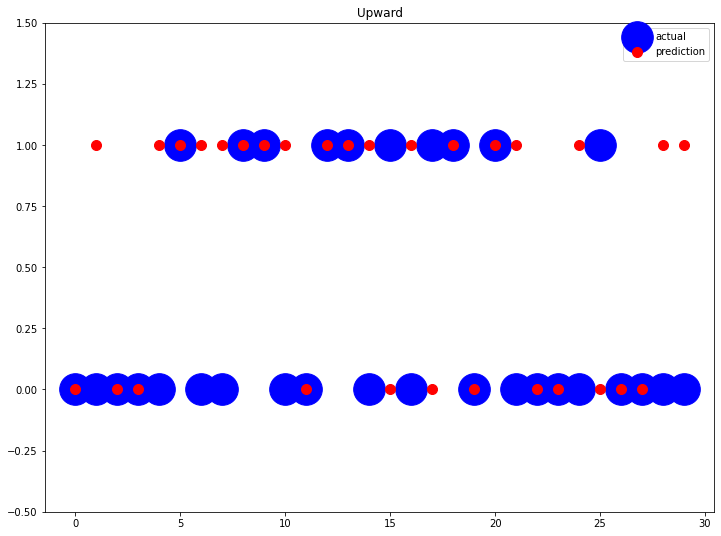

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 37
몇 번 돌림 4


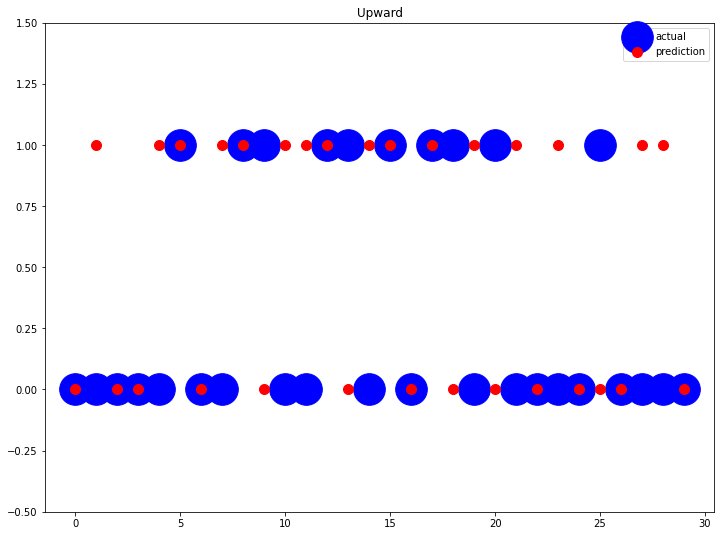

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 37
몇 번 돌림 5


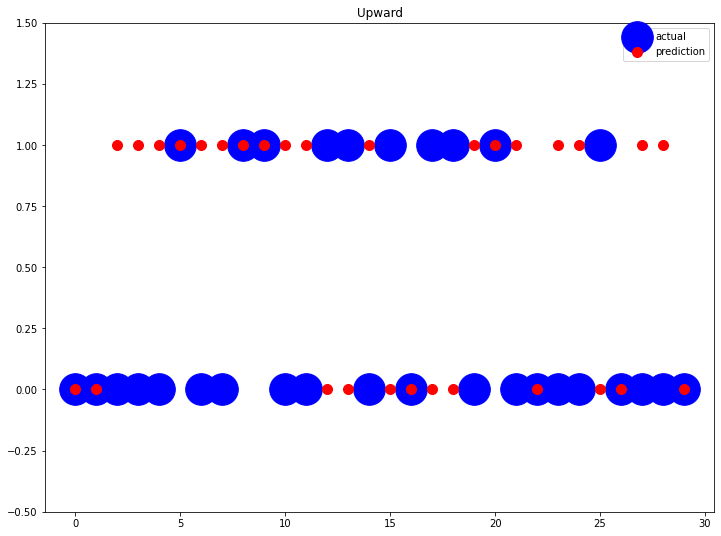

accuracy 0.3333333333333333
[[ 6 14]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.50      0.30      0.37        20
          상승       0.22      0.40      0.29        10

    accuracy                           0.33        30
   macro avg       0.36      0.35      0.33        30
weighted avg       0.41      0.33      0.35        30


 37
몇 번 돌림 6


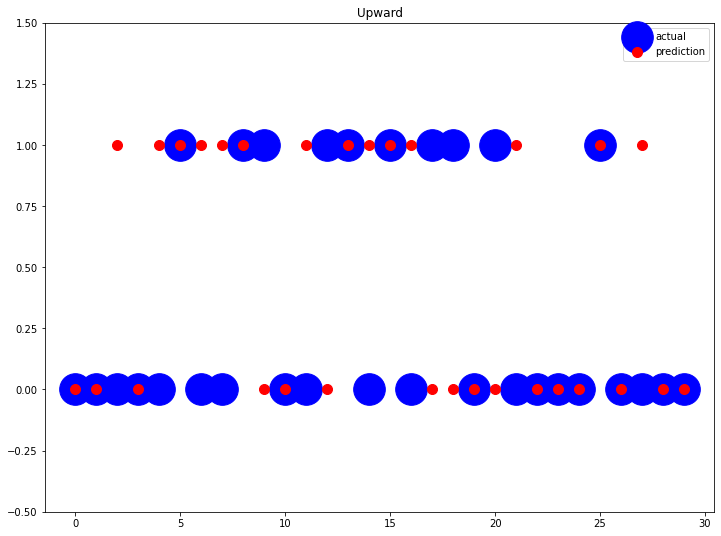

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 37
몇 번 돌림 7


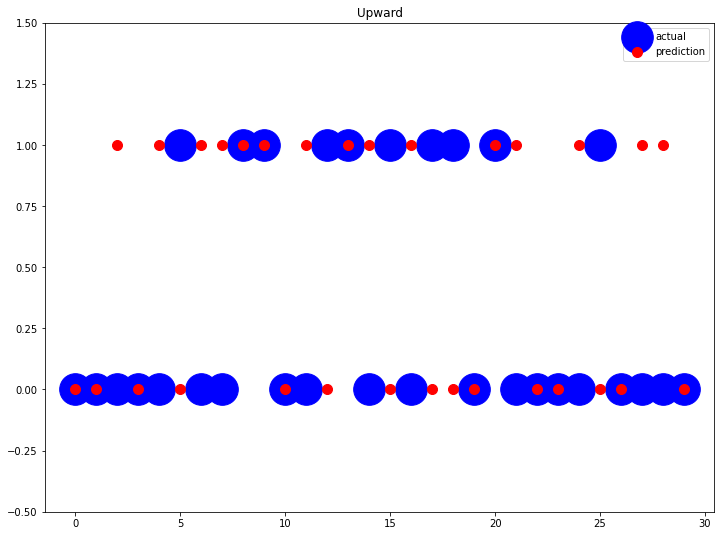

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 37
몇 번 돌림 8


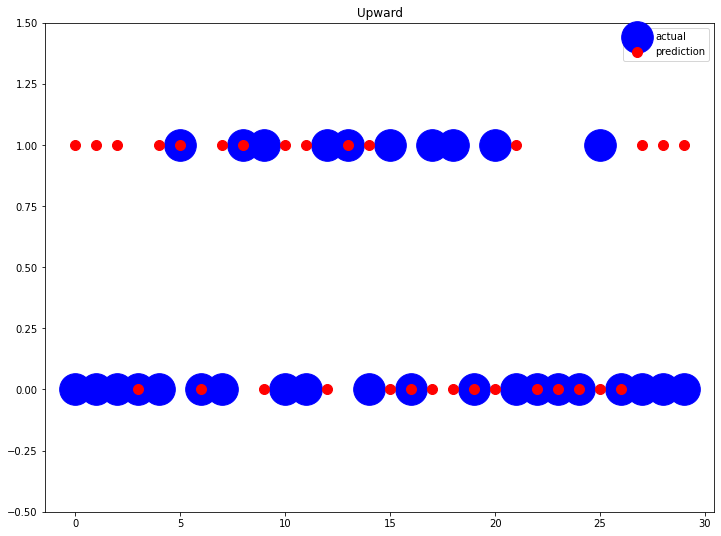

accuracy 0.36666666666666664
[[ 8 12]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.53      0.40      0.46        20
          상승       0.20      0.30      0.24        10

    accuracy                           0.37        30
   macro avg       0.37      0.35      0.35        30
weighted avg       0.42      0.37      0.38        30


 37
몇 번 돌림 9


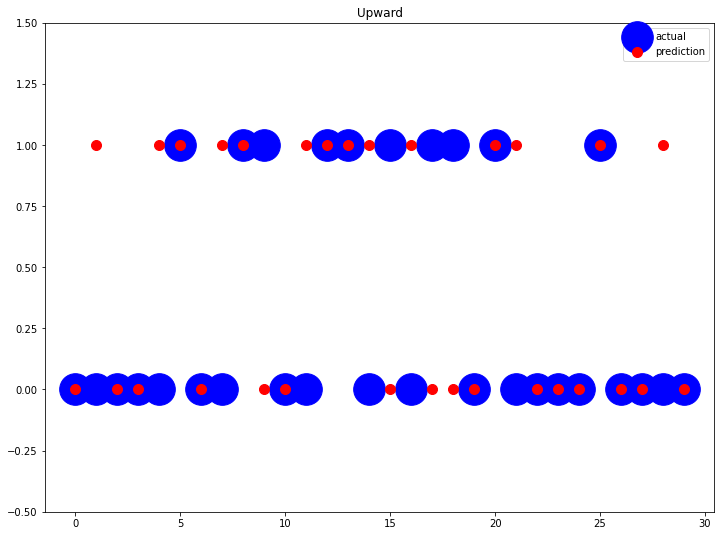

accuracy 0.6
[[12  8]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.75      0.60      0.67        20
          상승       0.43      0.60      0.50        10

    accuracy                           0.60        30
   macro avg       0.59      0.60      0.58        30
weighted avg       0.64      0.60      0.61        30


 37
몇 번 돌림 10


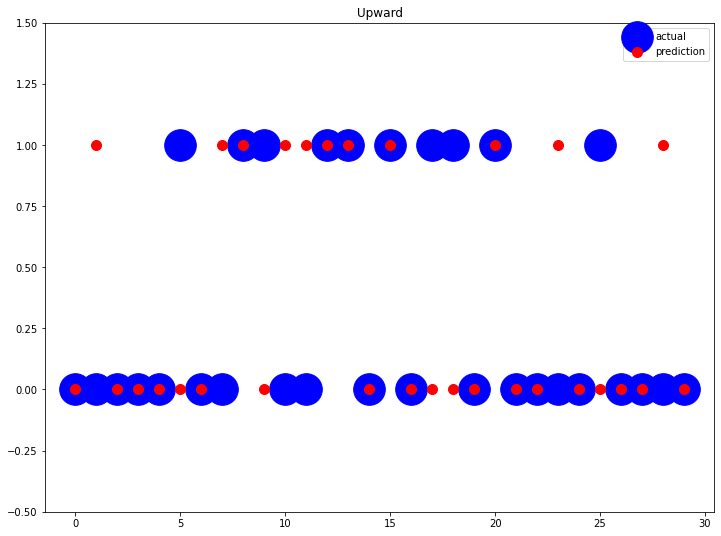

accuracy 0.6333333333333333
[[14  6]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.74      0.70      0.72        20
          상승       0.45      0.50      0.48        10

    accuracy                           0.63        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.64      0.63      0.64        30


 37
몇 번 돌림 11


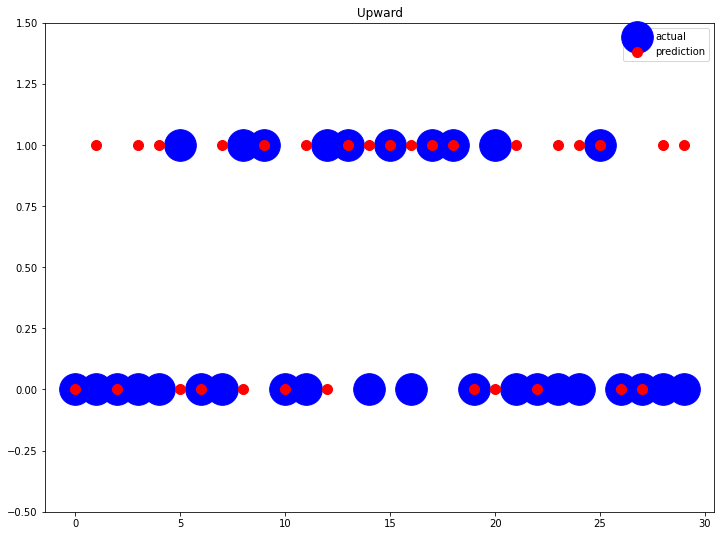

accuracy 0.4666666666666667
[[ 8 12]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.67      0.40      0.50        20
          상승       0.33      0.60      0.43        10

    accuracy                           0.47        30
   macro avg       0.50      0.50      0.46        30
weighted avg       0.56      0.47      0.48        30


 37
몇 번 돌림 12


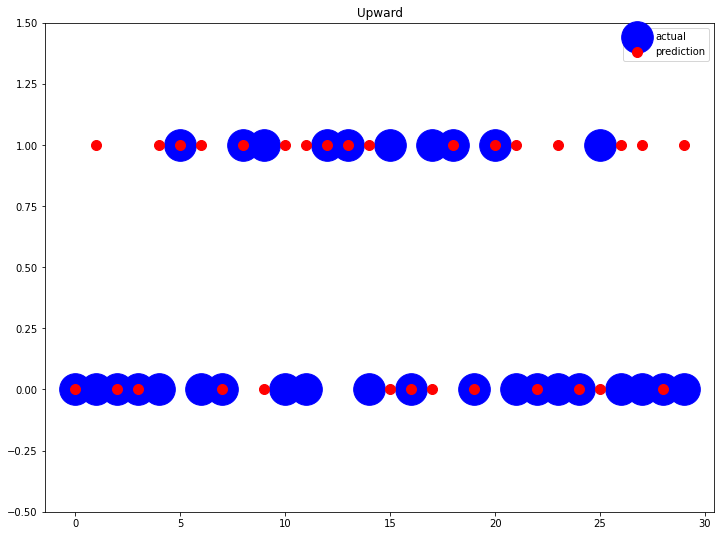

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 37
몇 번 돌림 13


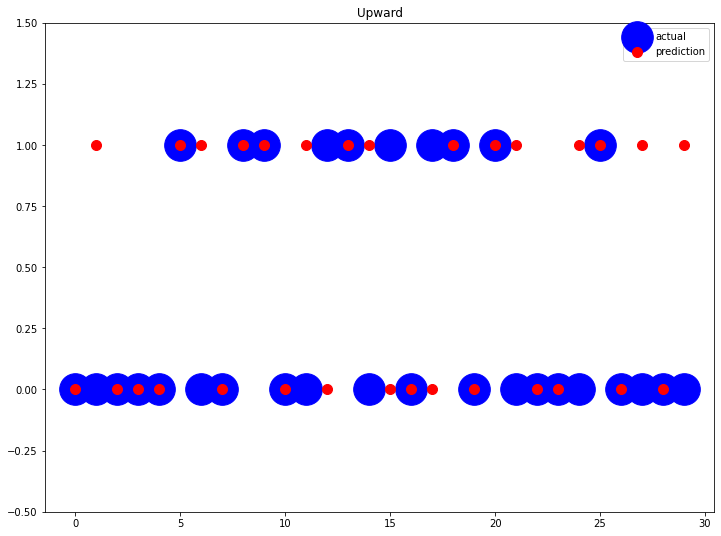

accuracy 0.6333333333333333
[[12  8]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.80      0.60      0.69        20
          상승       0.47      0.70      0.56        10

    accuracy                           0.63        30
   macro avg       0.63      0.65      0.62        30
weighted avg       0.69      0.63      0.64        30


 37
몇 번 돌림 14


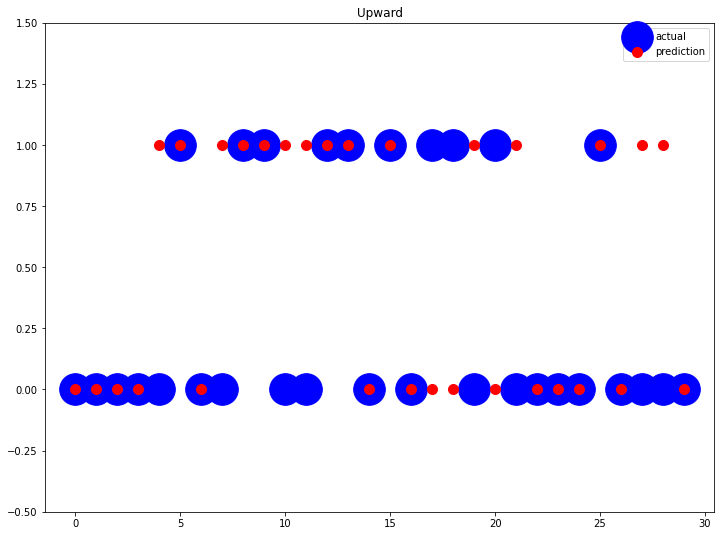

accuracy 0.6333333333333333
[[12  8]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.80      0.60      0.69        20
          상승       0.47      0.70      0.56        10

    accuracy                           0.63        30
   macro avg       0.63      0.65      0.62        30
weighted avg       0.69      0.63      0.64        30


 37
몇 번 돌림 15


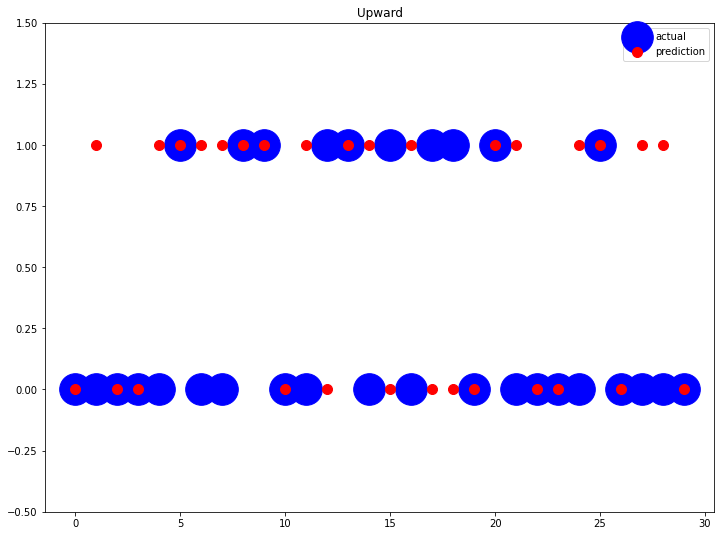

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 37
몇 번 돌림 16


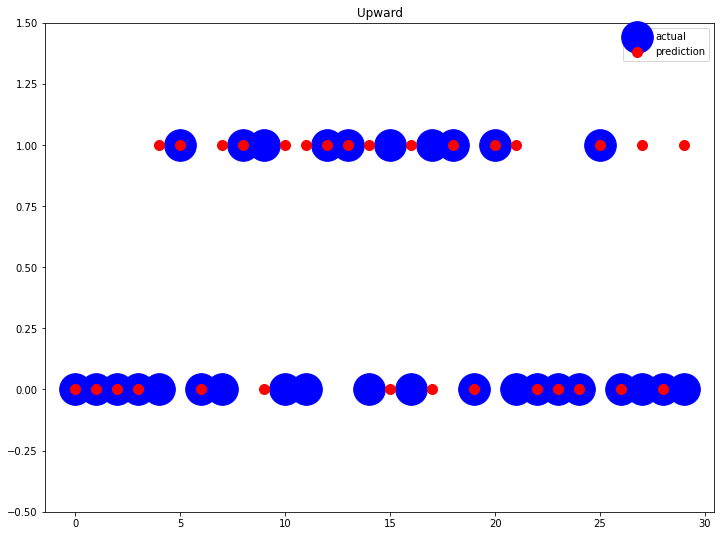

accuracy 0.6
[[11  9]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.79      0.55      0.65        20
          상승       0.44      0.70      0.54        10

    accuracy                           0.60        30
   macro avg       0.61      0.62      0.59        30
weighted avg       0.67      0.60      0.61        30


 37
몇 번 돌림 17


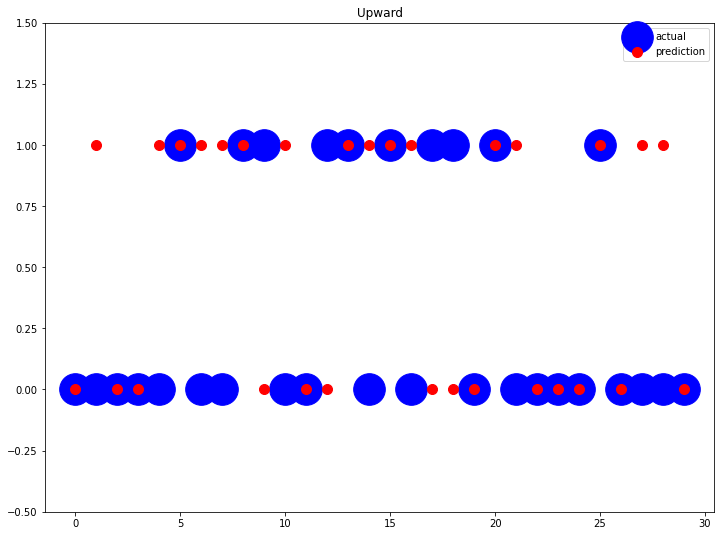

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 37
몇 번 돌림 18


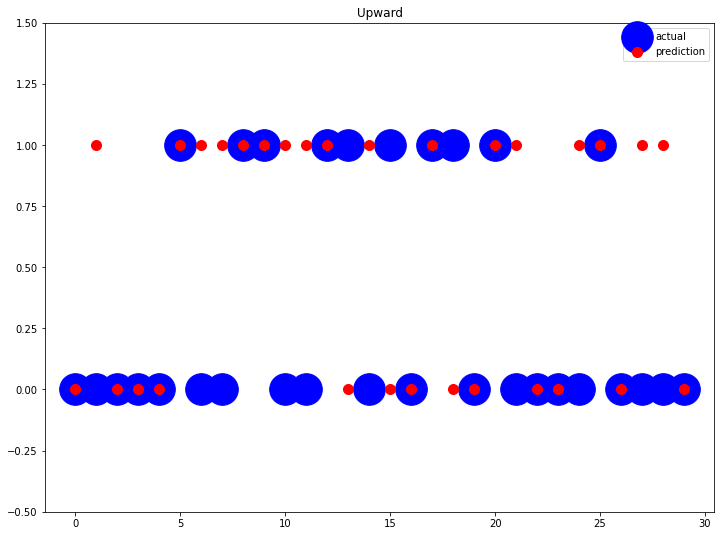

accuracy 0.5666666666666667
[[10 10]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.77      0.50      0.61        20
          상승       0.41      0.70      0.52        10

    accuracy                           0.57        30
   macro avg       0.59      0.60      0.56        30
weighted avg       0.65      0.57      0.58        30


 37
몇 번 돌림 19


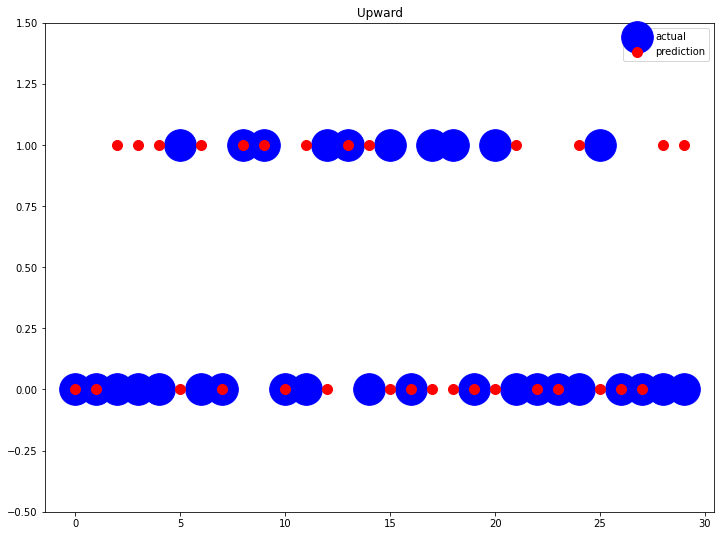

accuracy 0.43333333333333335
[[10 10]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.59      0.50      0.54        20
          상승       0.23      0.30      0.26        10

    accuracy                           0.43        30
   macro avg       0.41      0.40      0.40        30
weighted avg       0.47      0.43      0.45        30


 37
몇 번 돌림 20


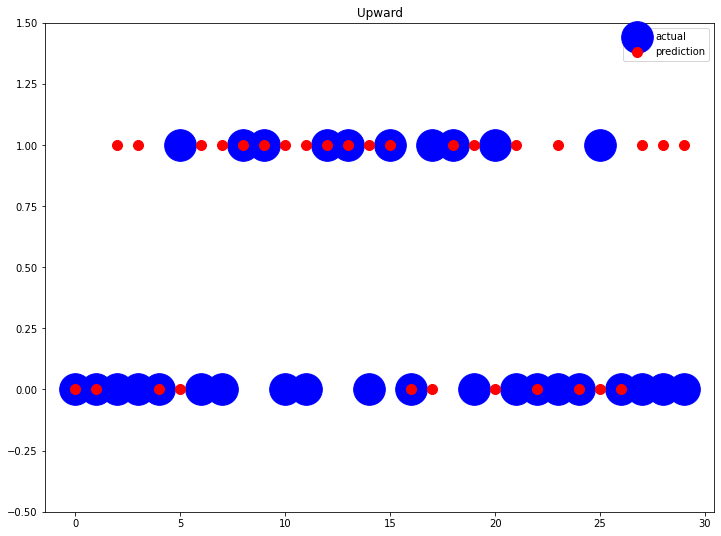

accuracy 0.43333333333333335
[[ 7 13]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.64      0.35      0.45        20
          상승       0.32      0.60      0.41        10

    accuracy                           0.43        30
   macro avg       0.48      0.47      0.43        30
weighted avg       0.53      0.43      0.44        30


 37
몇 번 돌림 21


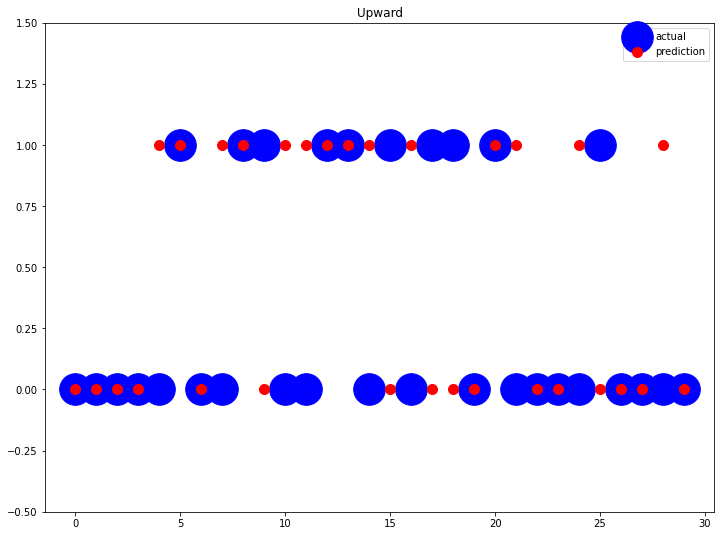

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 37
몇 번 돌림 22


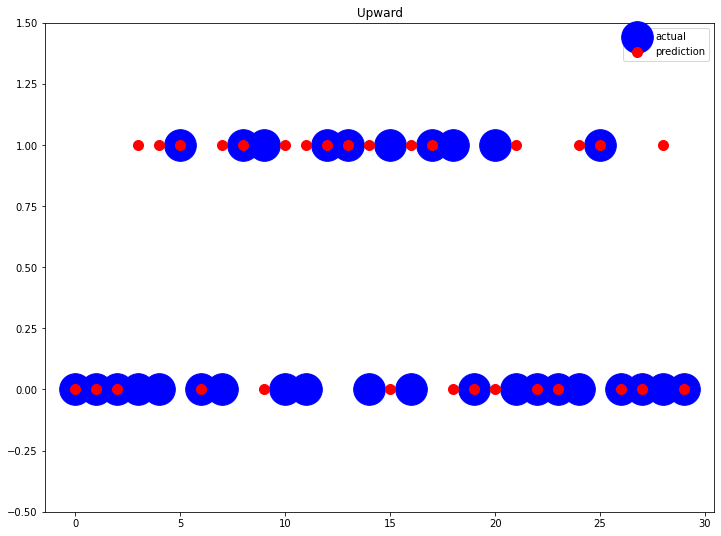

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 37
몇 번 돌림 23


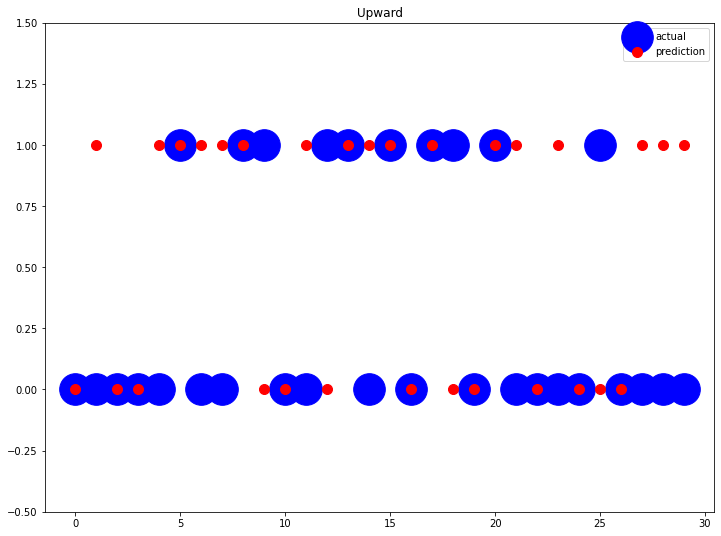

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 37
몇 번 돌림 24


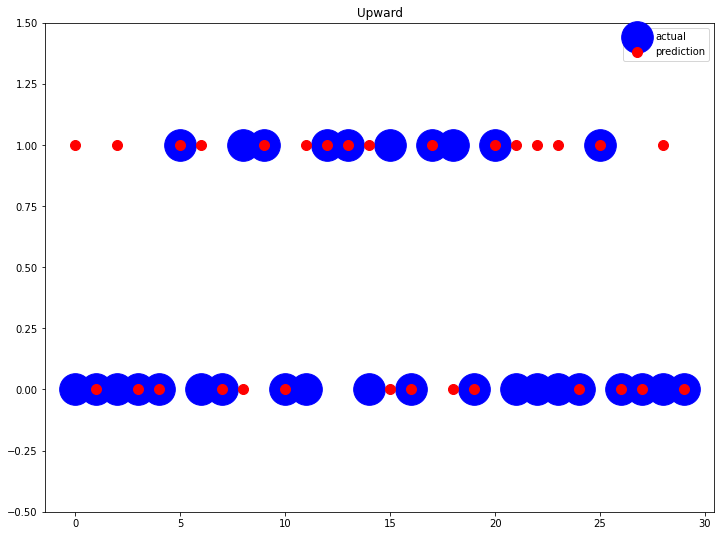

accuracy 0.6
[[11  9]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.79      0.55      0.65        20
          상승       0.44      0.70      0.54        10

    accuracy                           0.60        30
   macro avg       0.61      0.62      0.59        30
weighted avg       0.67      0.60      0.61        30


 37
몇 번 돌림 25


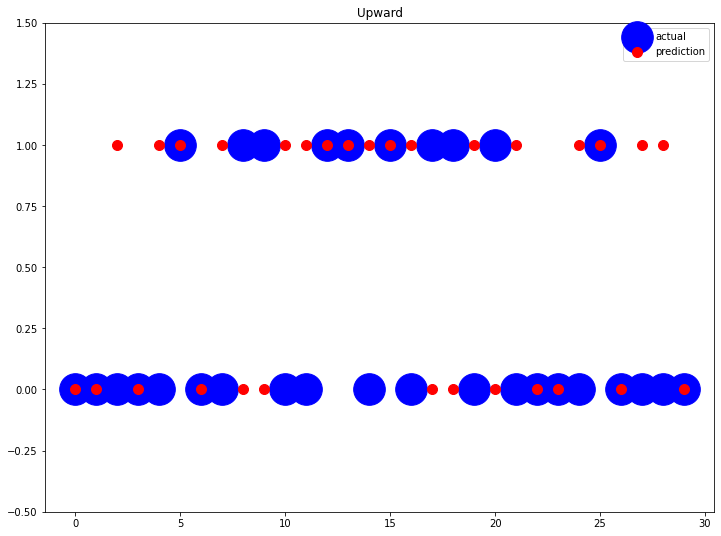

accuracy 0.43333333333333335
[[ 8 12]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.62      0.40      0.48        20
          상승       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30


 37
몇 번 돌림 26


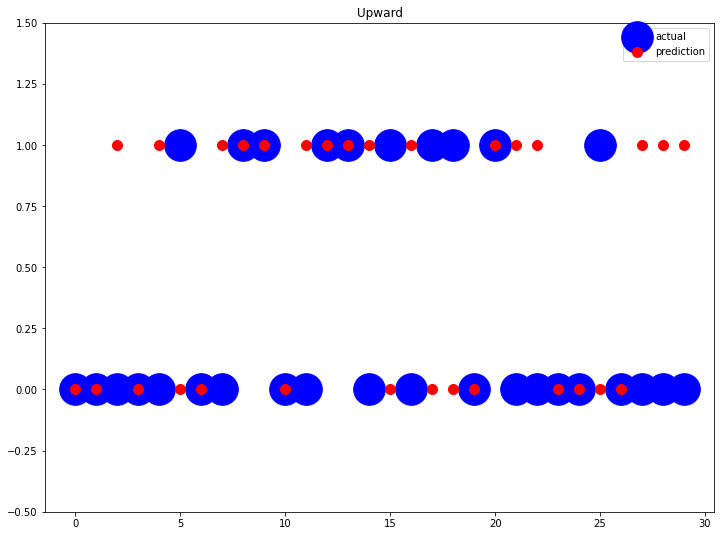

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 37
몇 번 돌림 27


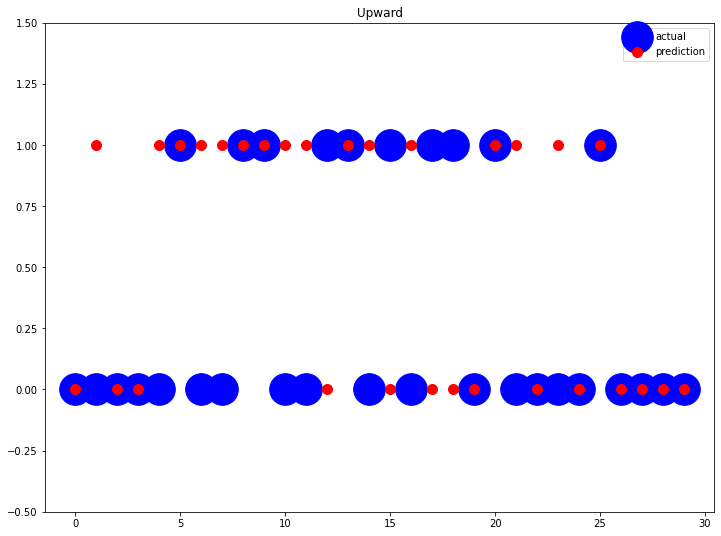

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 37
몇 번 돌림 28


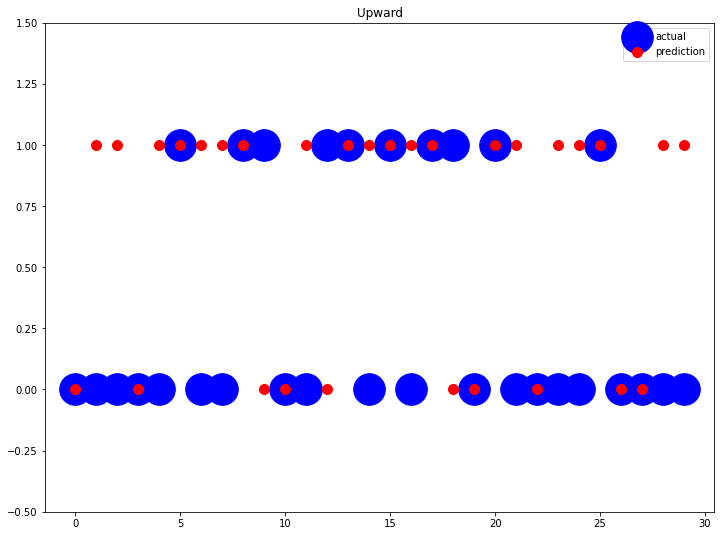

accuracy 0.4666666666666667
[[ 7 13]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.70      0.35      0.47        20
          상승       0.35      0.70      0.47        10

    accuracy                           0.47        30
   macro avg       0.52      0.52      0.47        30
weighted avg       0.58      0.47      0.47        30


 37
몇 번 돌림 29


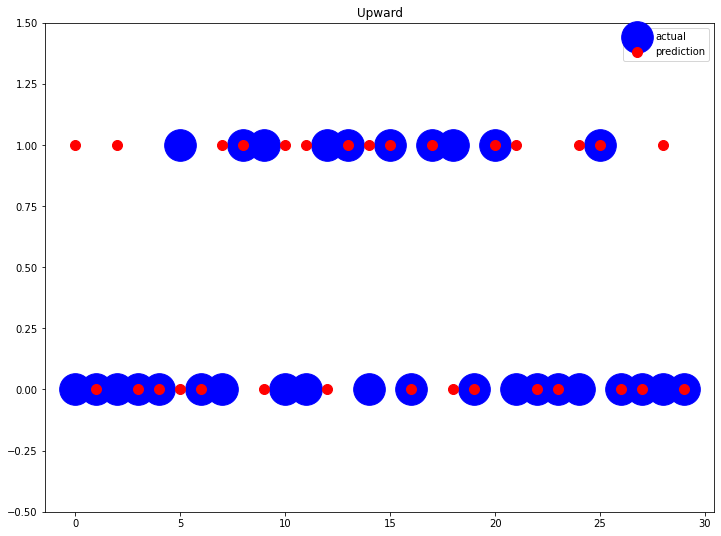

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 37
몇 번 돌림 30


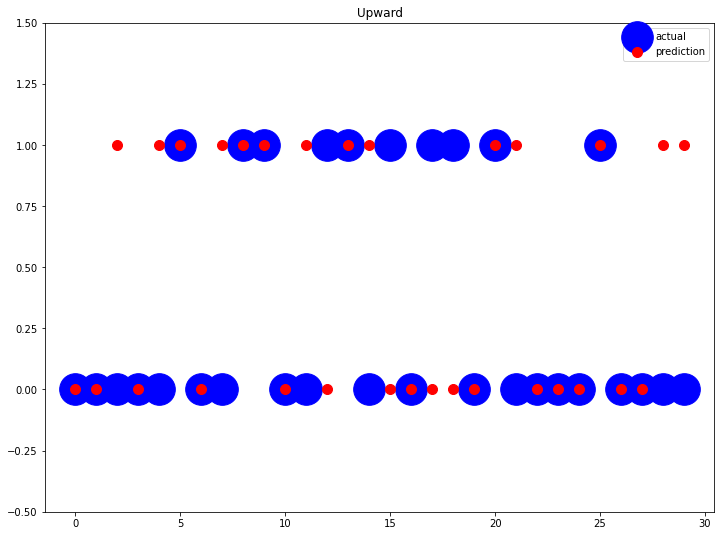

accuracy 0.6
[[12  8]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.75      0.60      0.67        20
          상승       0.43      0.60      0.50        10

    accuracy                           0.60        30
   macro avg       0.59      0.60      0.58        30
weighted avg       0.64      0.60      0.61        30


 37
몇 번 돌림 31


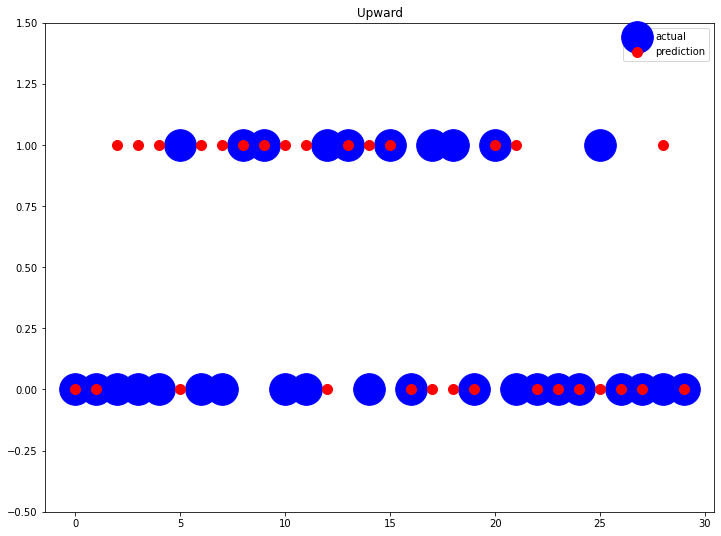

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 37
몇 번 돌림 32


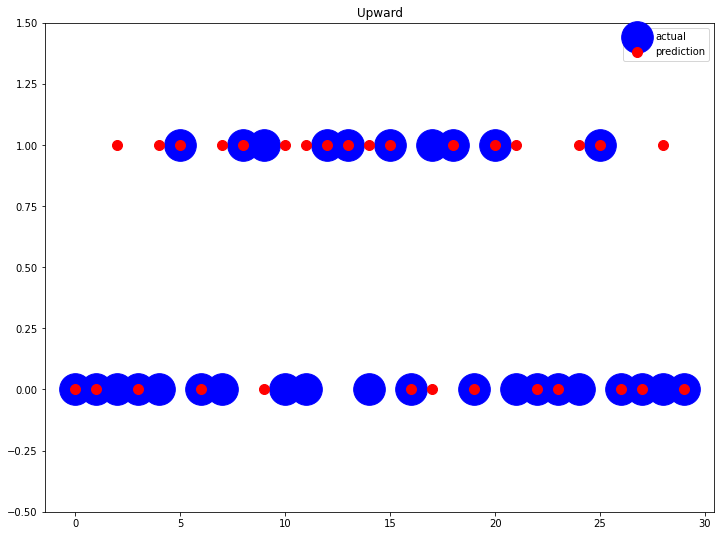

accuracy 0.6333333333333333
[[11  9]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.85      0.55      0.67        20
          상승       0.47      0.80      0.59        10

    accuracy                           0.63        30
   macro avg       0.66      0.68      0.63        30
weighted avg       0.72      0.63      0.64        30


 37
몇 번 돌림 33


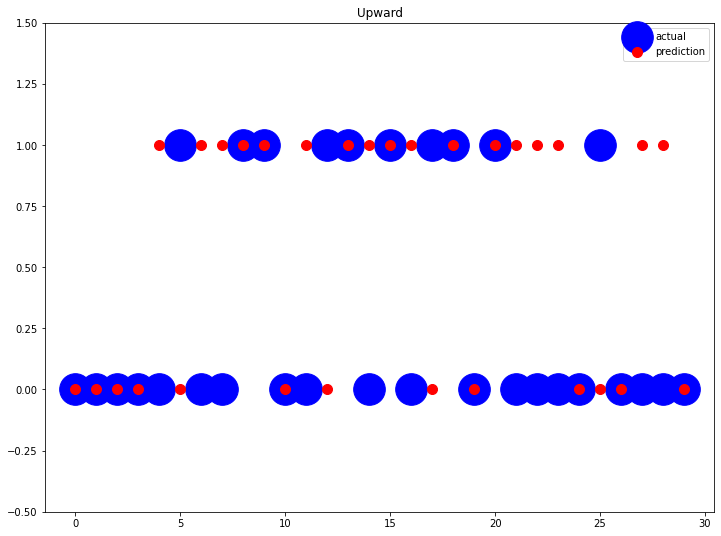

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 37
몇 번 돌림 34


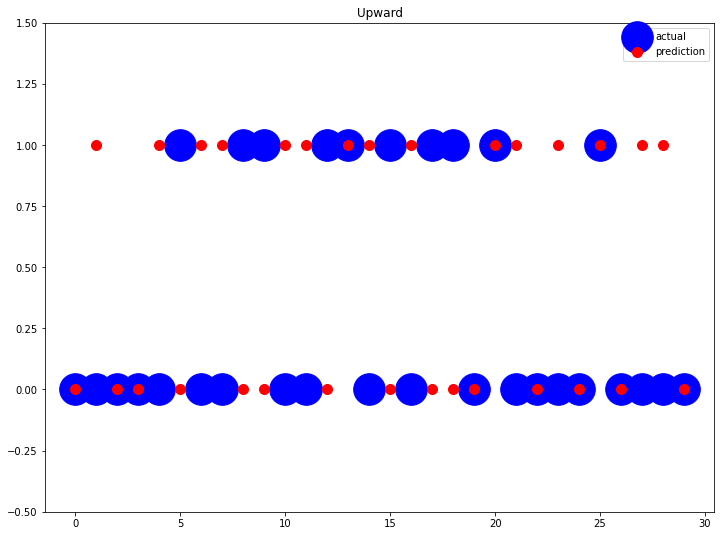

accuracy 0.36666666666666664
[[ 8 12]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.53      0.40      0.46        20
          상승       0.20      0.30      0.24        10

    accuracy                           0.37        30
   macro avg       0.37      0.35      0.35        30
weighted avg       0.42      0.37      0.38        30


 37
몇 번 돌림 35


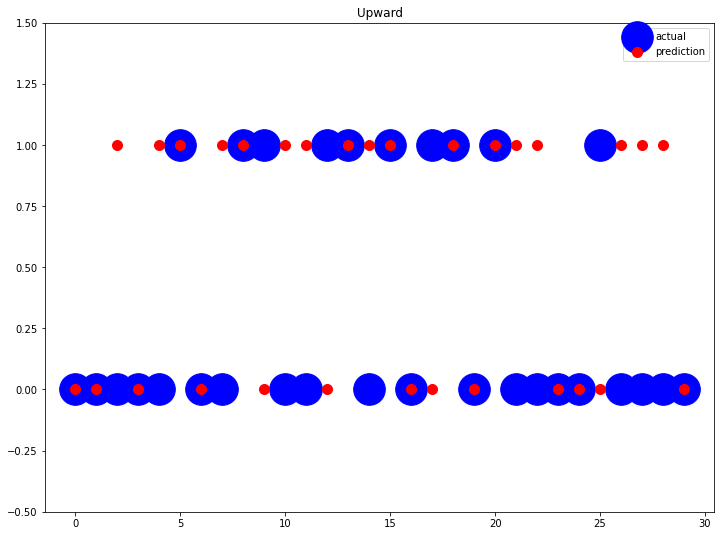

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 37
몇 번 돌림 36


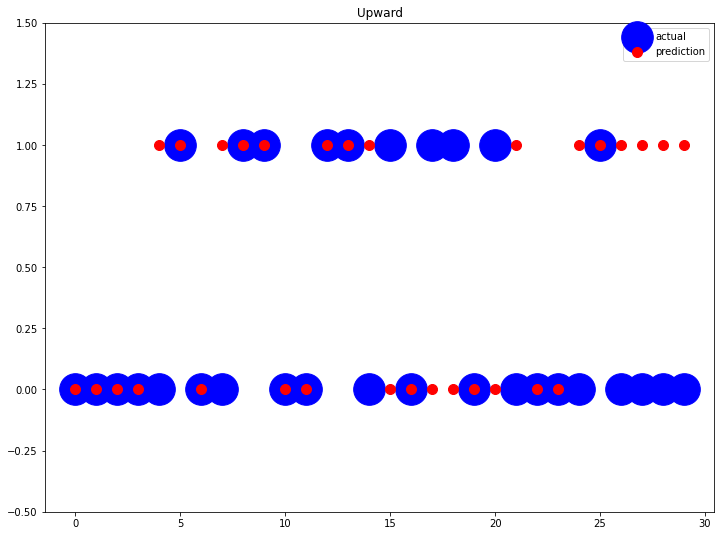

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 37
몇 번 돌림 37


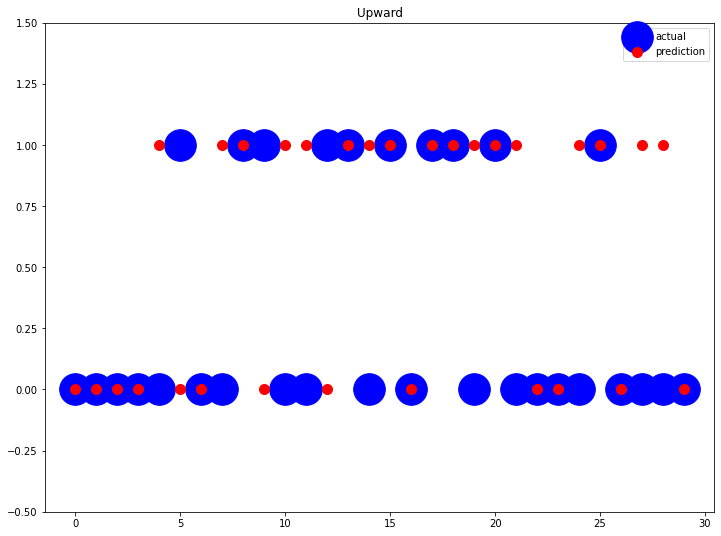

accuracy 0.5666666666666667
[[10 10]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.77      0.50      0.61        20
          상승       0.41      0.70      0.52        10

    accuracy                           0.57        30
   macro avg       0.59      0.60      0.56        30
weighted avg       0.65      0.57      0.58        30


 37
몇 번 돌림 38


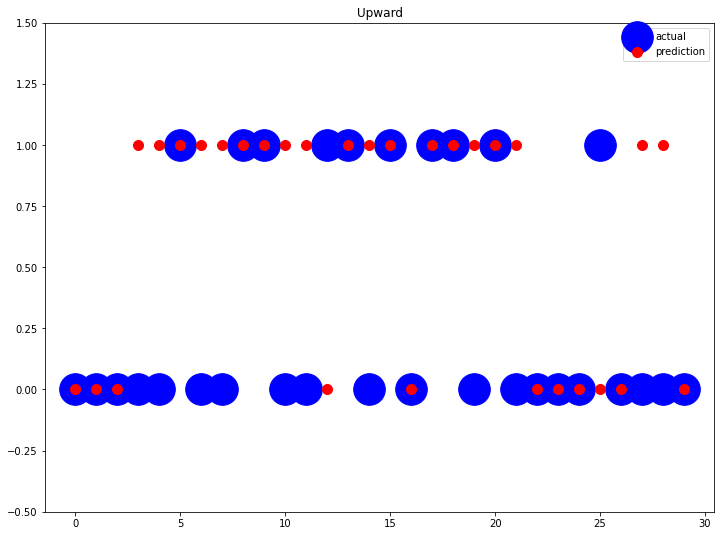

accuracy 0.5666666666666667
[[ 9 11]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.82      0.45      0.58        20
          상승       0.42      0.80      0.55        10

    accuracy                           0.57        30
   macro avg       0.62      0.62      0.57        30
weighted avg       0.69      0.57      0.57        30


 37
몇 번 돌림 39


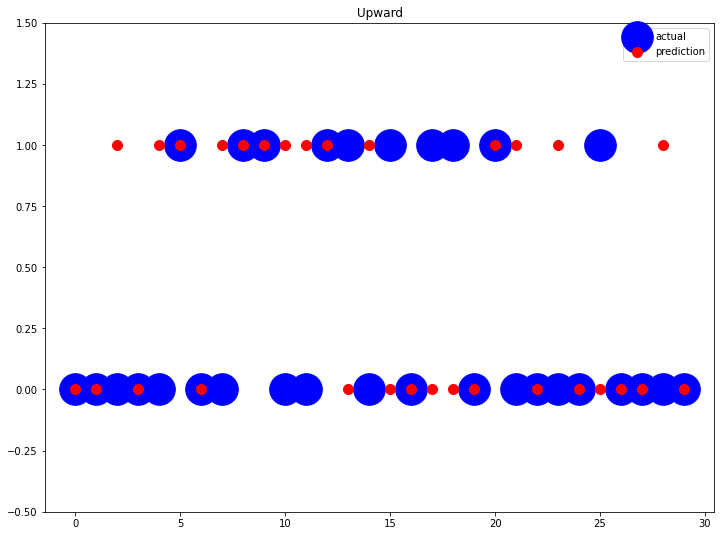

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 37
몇 번 돌림 40


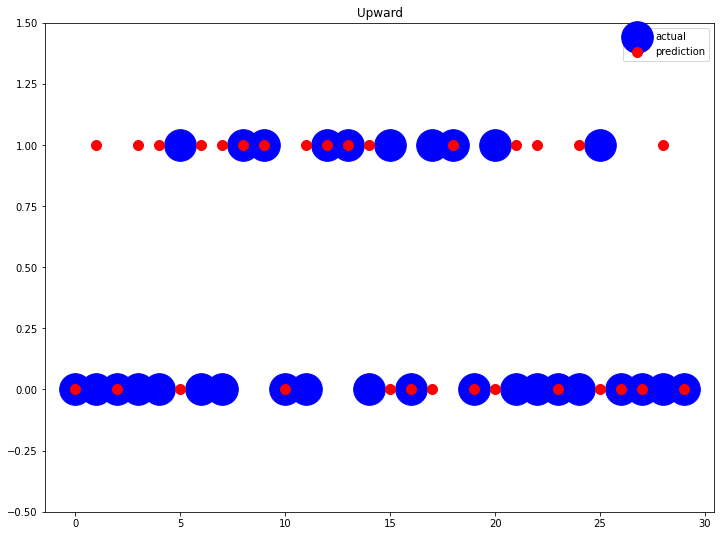

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 37
몇 번 돌림 41


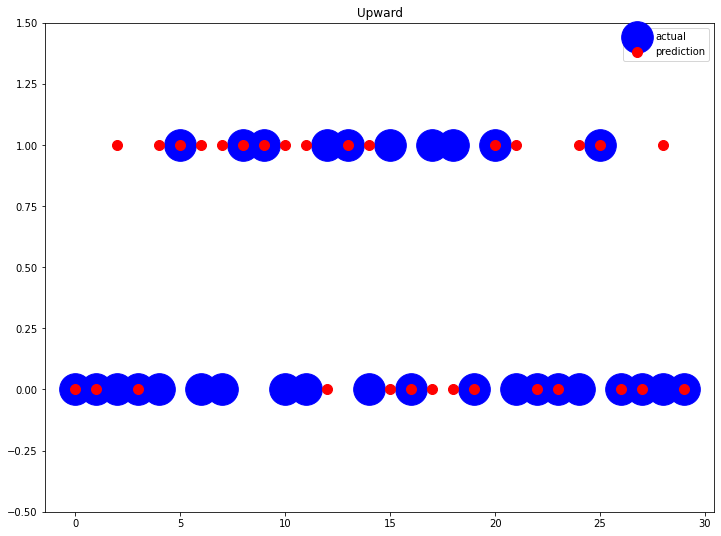

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 37
몇 번 돌림 42


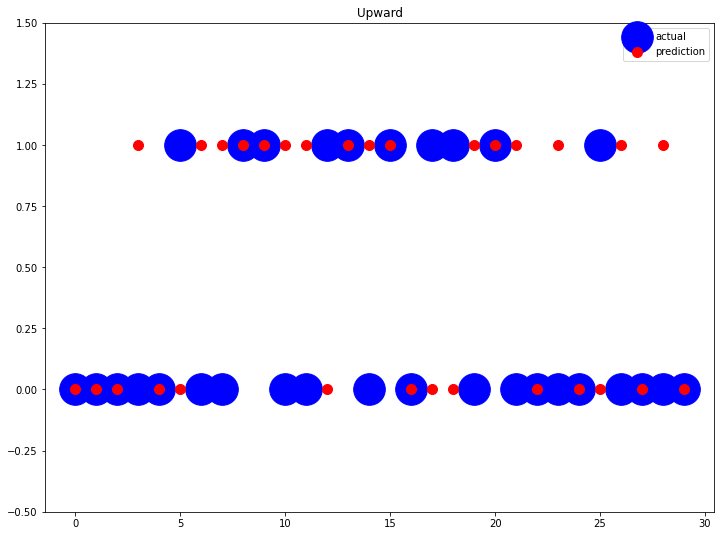

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 37
몇 번 돌림 43


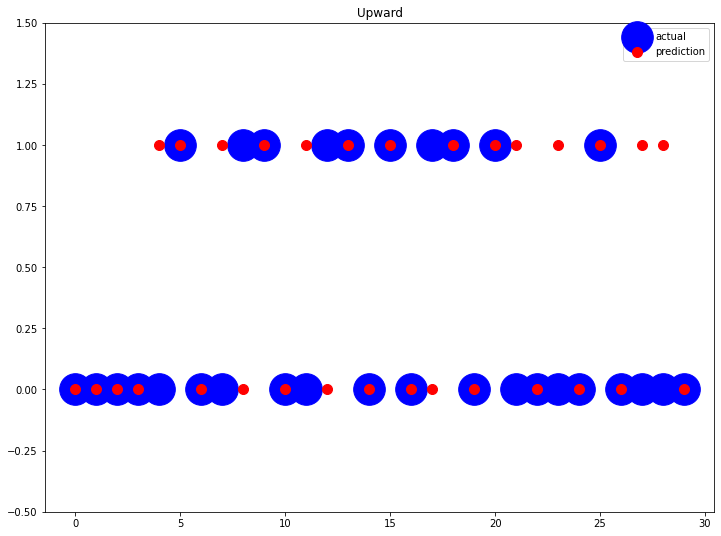

accuracy 0.6666666666666666
[[13  7]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.81      0.65      0.72        20
          상승       0.50      0.70      0.58        10

    accuracy                           0.67        30
   macro avg       0.66      0.68      0.65        30
weighted avg       0.71      0.67      0.68        30


 37
몇 번 돌림 44


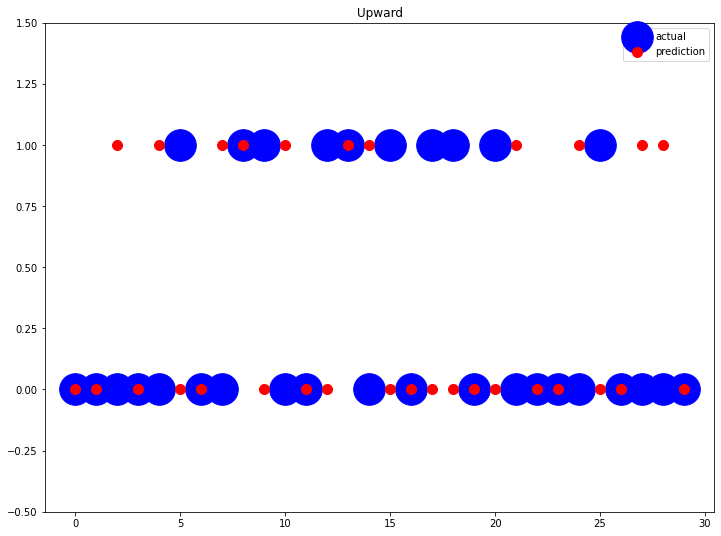

accuracy 0.43333333333333335
[[11  9]
 [ 8  2]]
              precision    recall  f1-score   support

          하락       0.58      0.55      0.56        20
          상승       0.18      0.20      0.19        10

    accuracy                           0.43        30
   macro avg       0.38      0.38      0.38        30
weighted avg       0.45      0.43      0.44        30


 37
몇 번 돌림 45


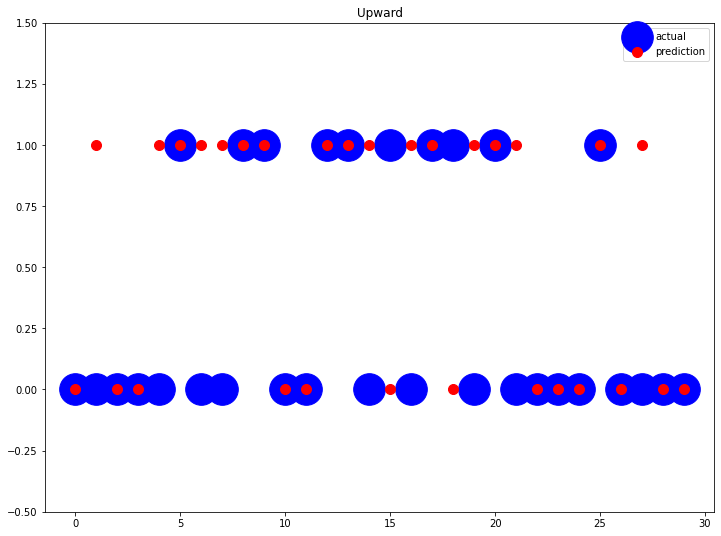

accuracy 0.6333333333333333
[[11  9]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.85      0.55      0.67        20
          상승       0.47      0.80      0.59        10

    accuracy                           0.63        30
   macro avg       0.66      0.68      0.63        30
weighted avg       0.72      0.63      0.64        30


 37
몇 번 돌림 46


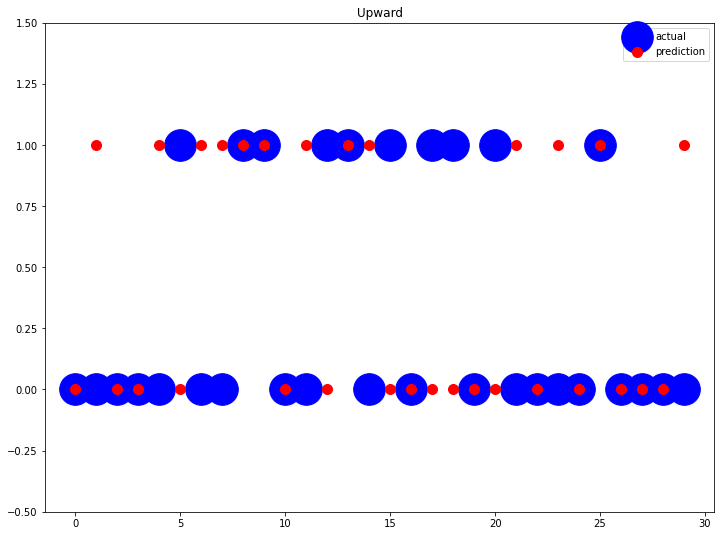

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 37
몇 번 돌림 47


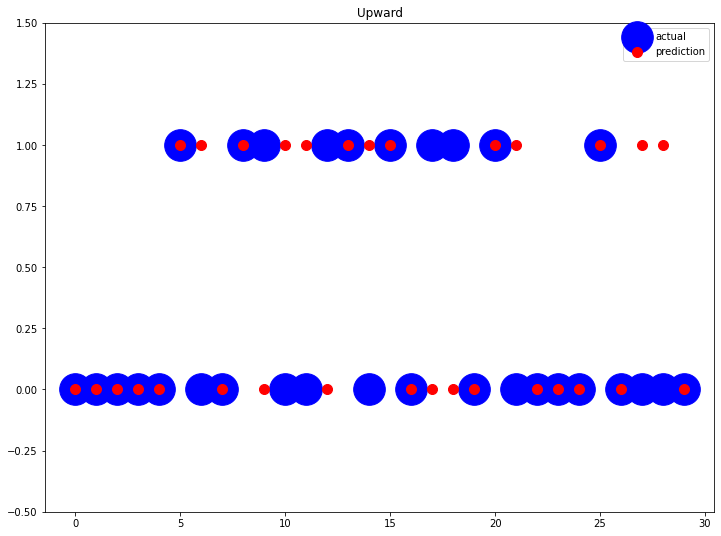

accuracy 0.6333333333333333
[[13  7]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.76      0.65      0.70        20
          상승       0.46      0.60      0.52        10

    accuracy                           0.63        30
   macro avg       0.61      0.62      0.61        30
weighted avg       0.66      0.63      0.64        30


 37
몇 번 돌림 48


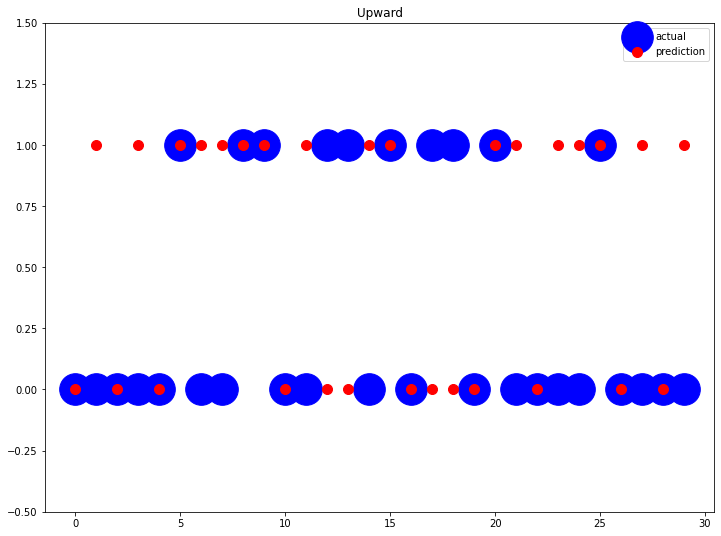

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 37
몇 번 돌림 49


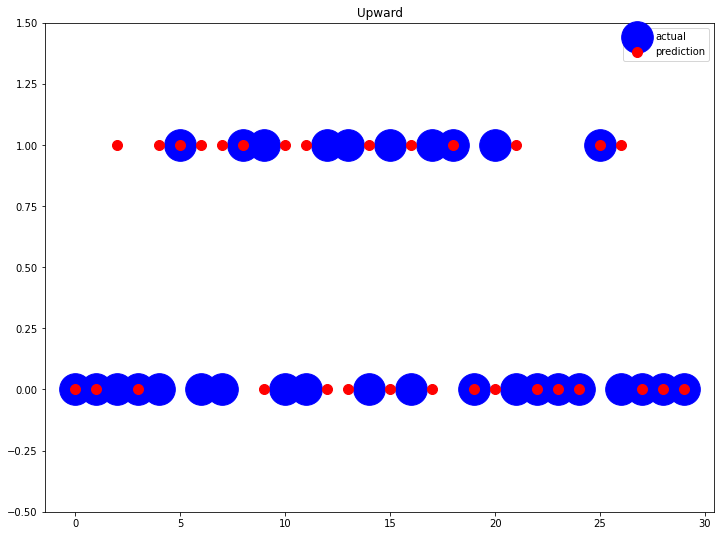

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 38
몇 번 돌림 0


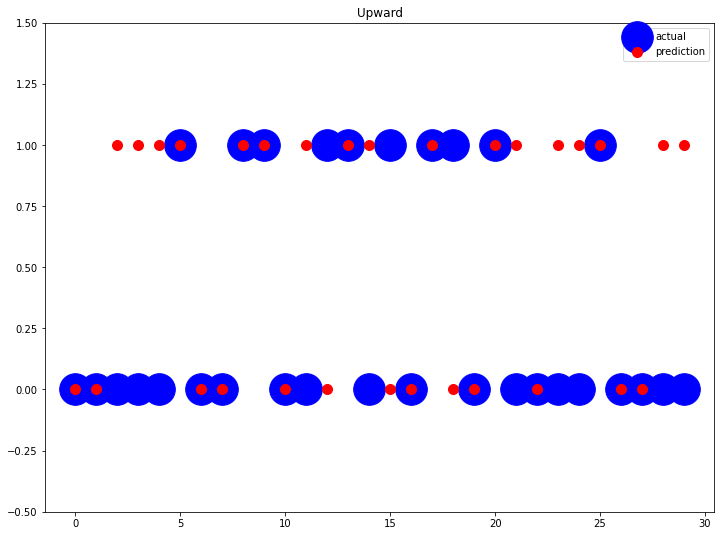

accuracy 0.5666666666666667
[[10 10]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.77      0.50      0.61        20
          상승       0.41      0.70      0.52        10

    accuracy                           0.57        30
   macro avg       0.59      0.60      0.56        30
weighted avg       0.65      0.57      0.58        30


 38
몇 번 돌림 1


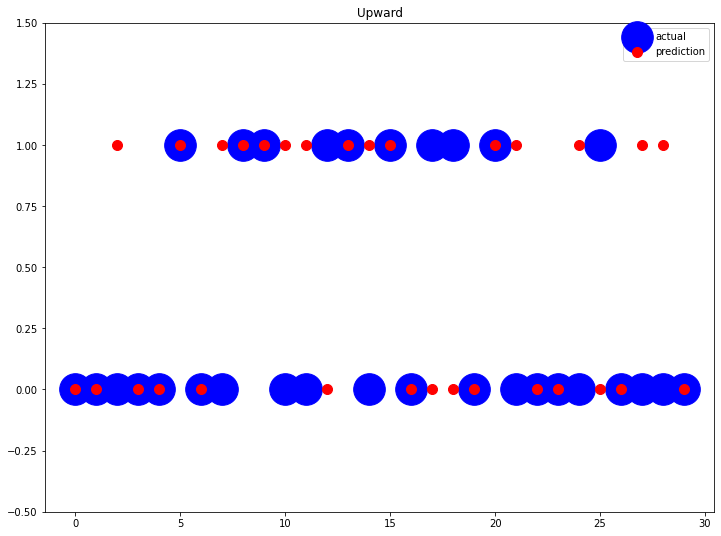

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 38
몇 번 돌림 2


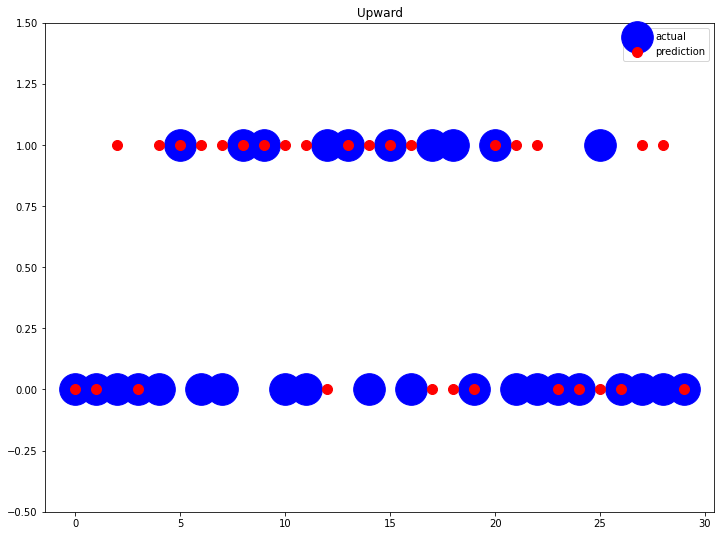

accuracy 0.4666666666666667
[[ 8 12]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.67      0.40      0.50        20
          상승       0.33      0.60      0.43        10

    accuracy                           0.47        30
   macro avg       0.50      0.50      0.46        30
weighted avg       0.56      0.47      0.48        30


 38
몇 번 돌림 3


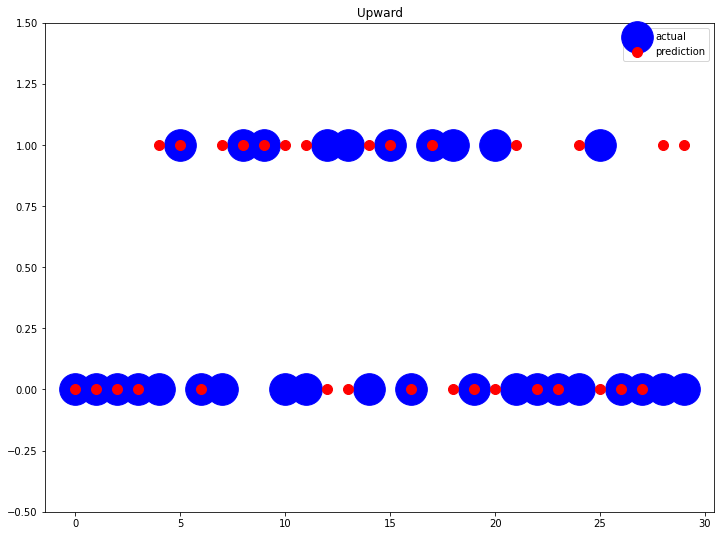

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 38
몇 번 돌림 4


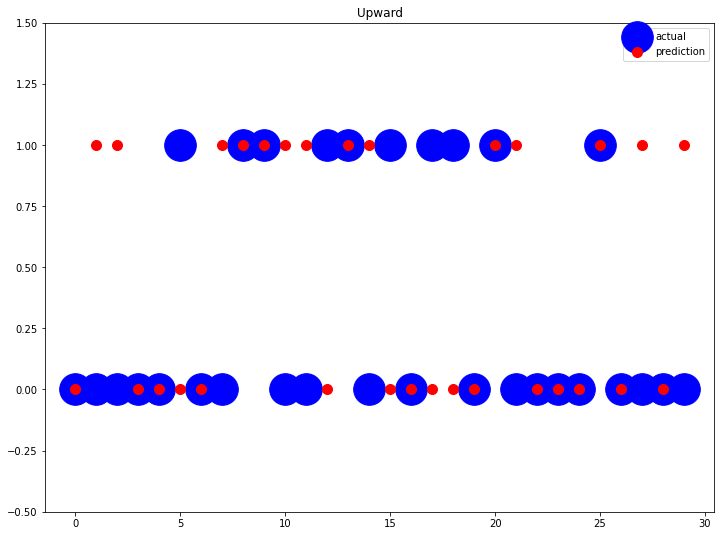

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 38
몇 번 돌림 5


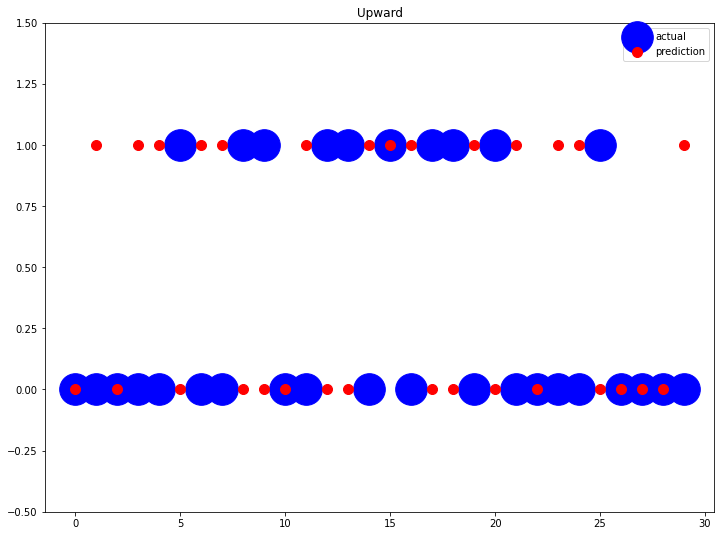

accuracy 0.26666666666666666
[[ 7 13]
 [ 9  1]]
              precision    recall  f1-score   support

          하락       0.44      0.35      0.39        20
          상승       0.07      0.10      0.08        10

    accuracy                           0.27        30
   macro avg       0.25      0.22      0.24        30
weighted avg       0.32      0.27      0.29        30


 38
몇 번 돌림 6


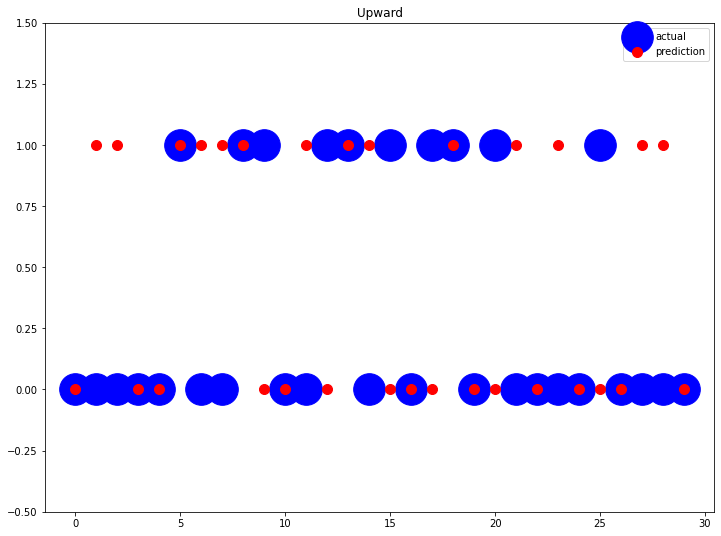

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 38
몇 번 돌림 7


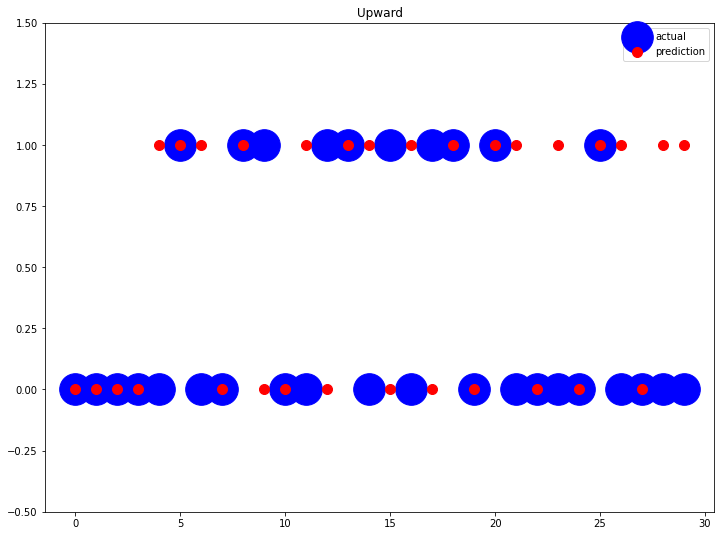

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 38
몇 번 돌림 8


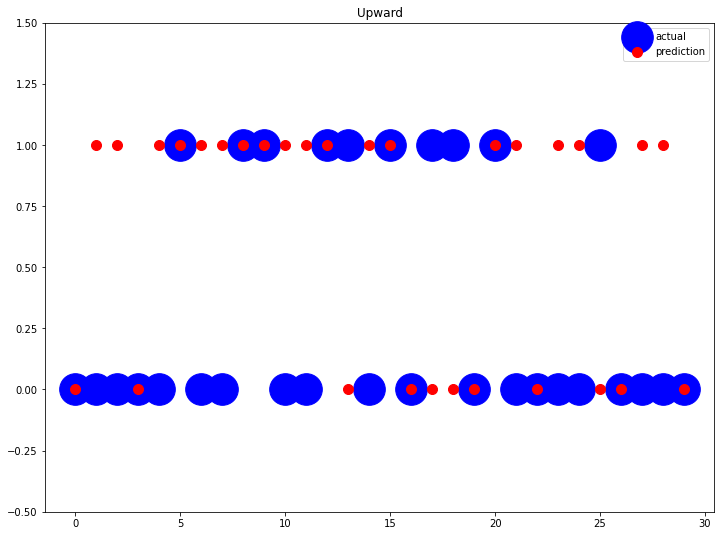

accuracy 0.43333333333333335
[[ 7 13]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.64      0.35      0.45        20
          상승       0.32      0.60      0.41        10

    accuracy                           0.43        30
   macro avg       0.48      0.47      0.43        30
weighted avg       0.53      0.43      0.44        30


 38
몇 번 돌림 9


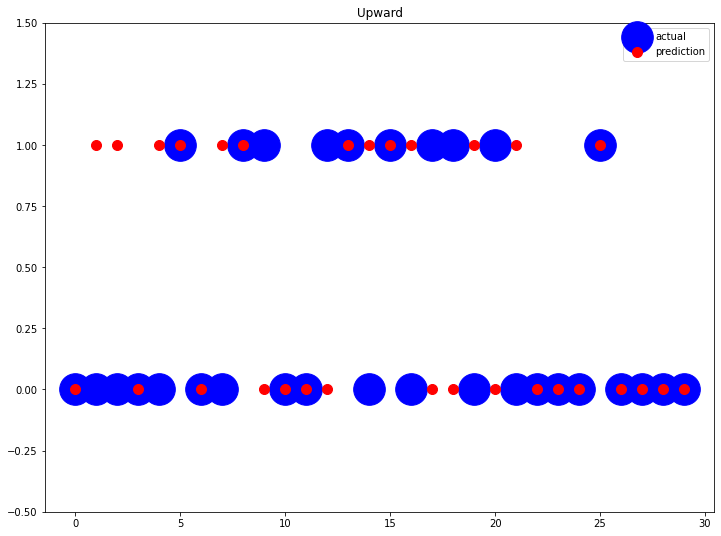

accuracy 0.5666666666666667
[[12  8]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.71      0.60      0.65        20
          상승       0.38      0.50      0.43        10

    accuracy                           0.57        30
   macro avg       0.55      0.55      0.54        30
weighted avg       0.60      0.57      0.58        30


 38
몇 번 돌림 10


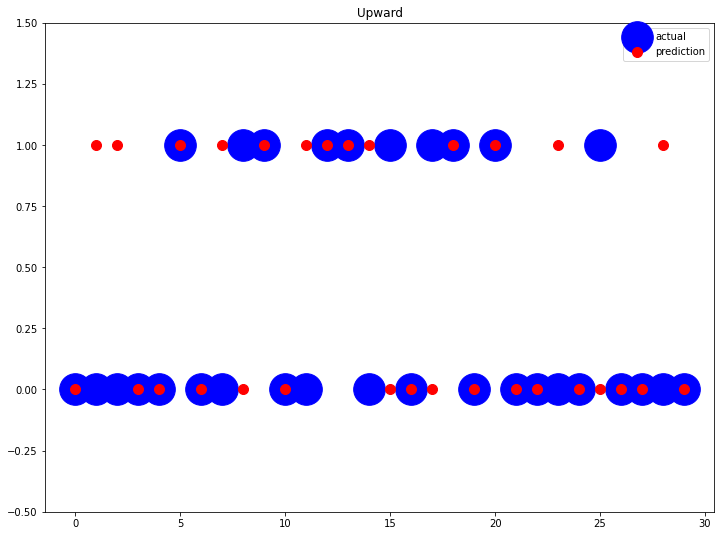

accuracy 0.6333333333333333
[[13  7]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.76      0.65      0.70        20
          상승       0.46      0.60      0.52        10

    accuracy                           0.63        30
   macro avg       0.61      0.62      0.61        30
weighted avg       0.66      0.63      0.64        30


 38
몇 번 돌림 11


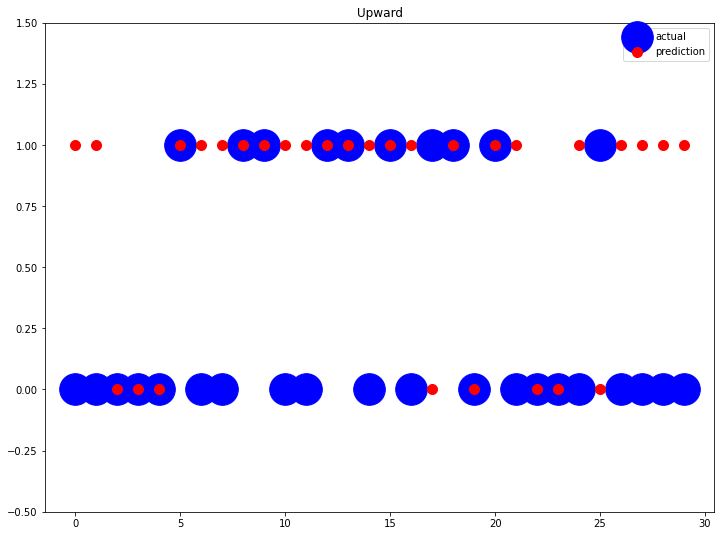

accuracy 0.4666666666666667
[[ 6 14]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.75      0.30      0.43        20
          상승       0.36      0.80      0.50        10

    accuracy                           0.47        30
   macro avg       0.56      0.55      0.46        30
weighted avg       0.62      0.47      0.45        30


 38
몇 번 돌림 12


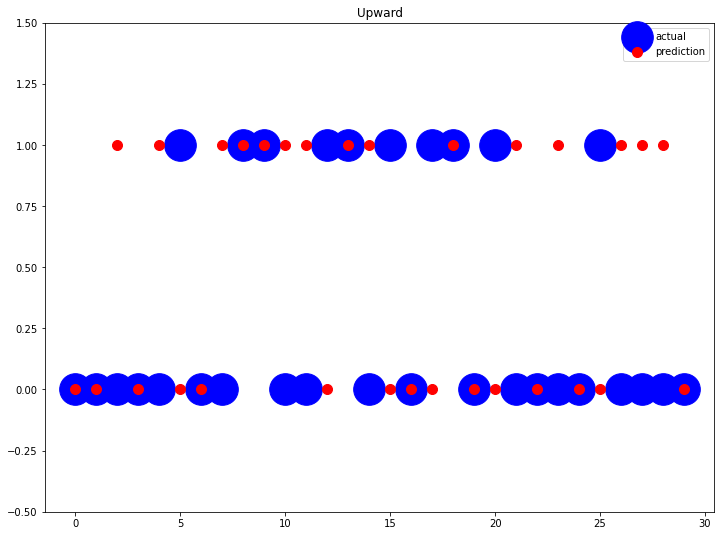

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 38
몇 번 돌림 13


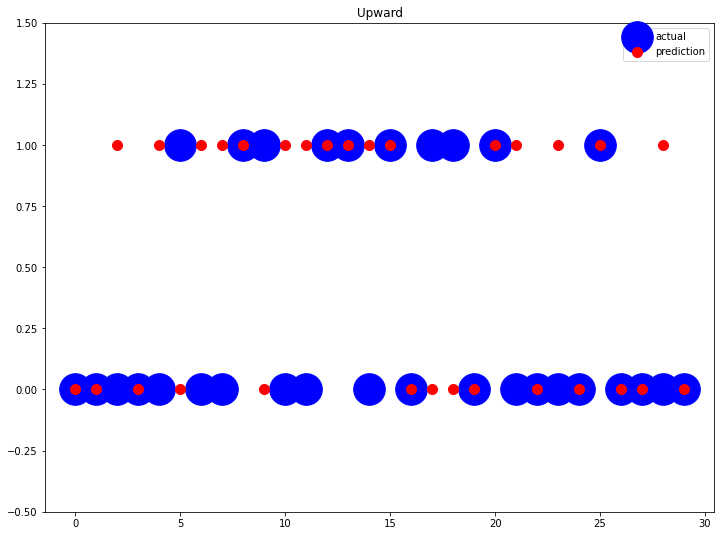

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 38
몇 번 돌림 14


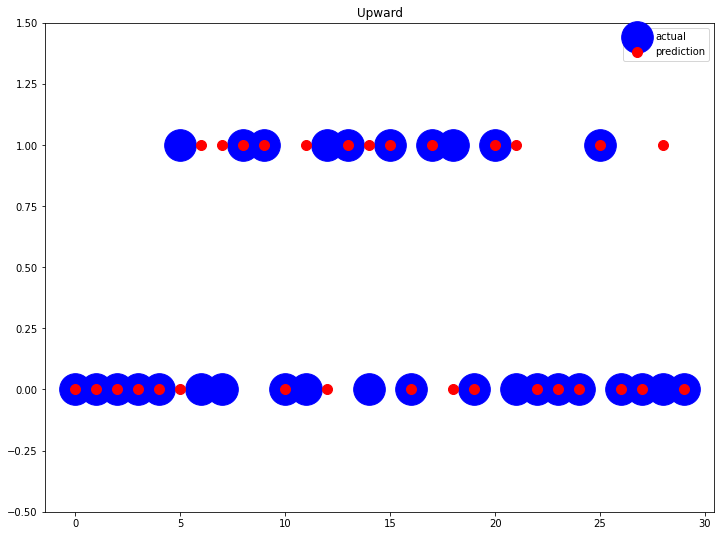

accuracy 0.7
[[14  6]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.82      0.70      0.76        20
          상승       0.54      0.70      0.61        10

    accuracy                           0.70        30
   macro avg       0.68      0.70      0.68        30
weighted avg       0.73      0.70      0.71        30


 38
몇 번 돌림 15


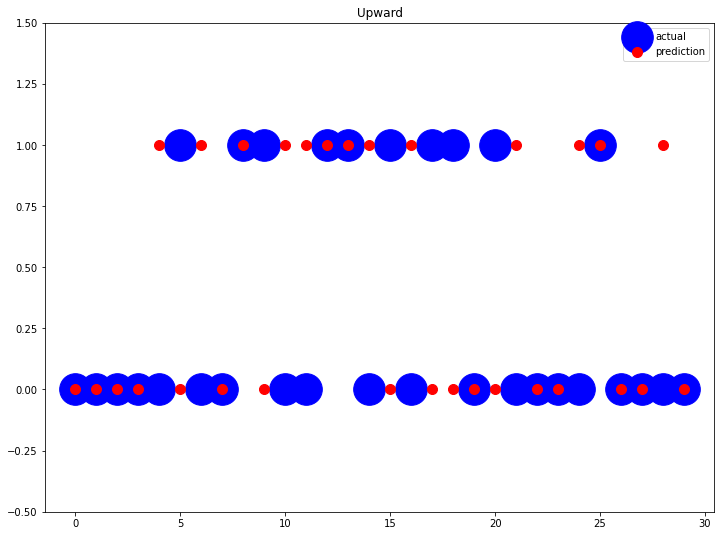

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 38
몇 번 돌림 16


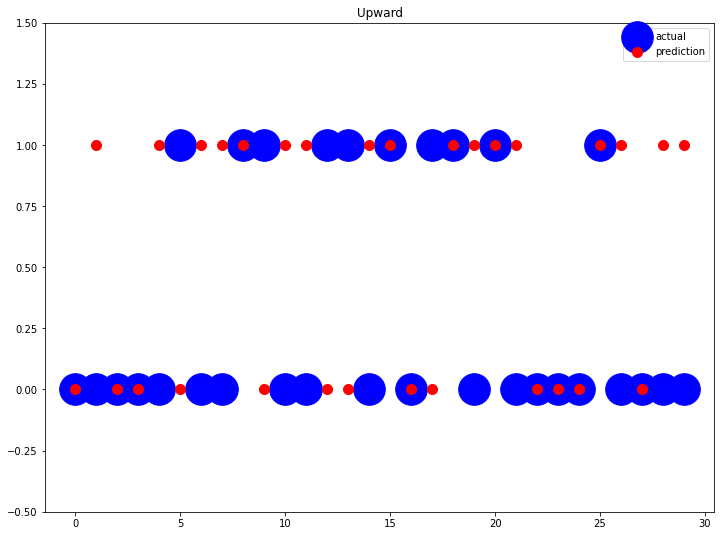

accuracy 0.43333333333333335
[[ 8 12]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.62      0.40      0.48        20
          상승       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30


 38
몇 번 돌림 17


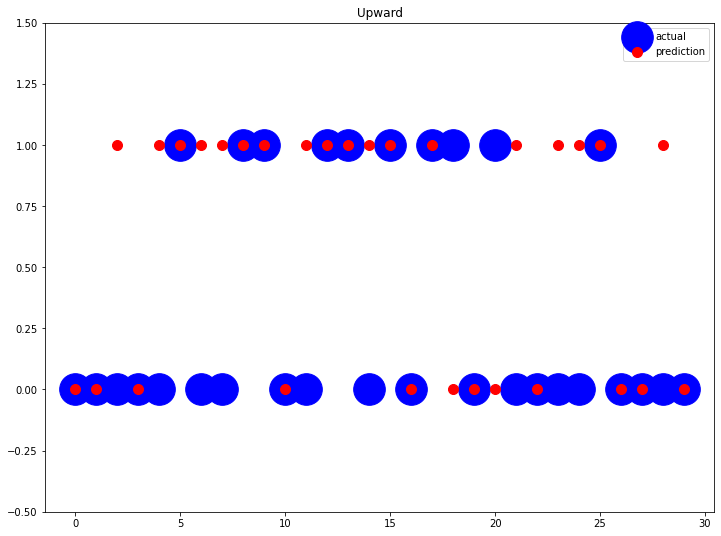

accuracy 0.6
[[10 10]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.83      0.50      0.62        20
          상승       0.44      0.80      0.57        10

    accuracy                           0.60        30
   macro avg       0.64      0.65      0.60        30
weighted avg       0.70      0.60      0.61        30


 38
몇 번 돌림 18


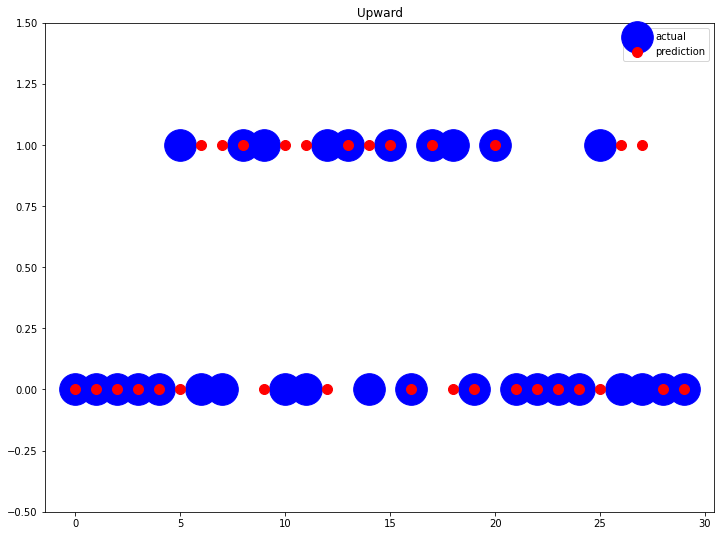

accuracy 0.6
[[13  7]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.72      0.65      0.68        20
          상승       0.42      0.50      0.45        10

    accuracy                           0.60        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.62      0.60      0.61        30


 38
몇 번 돌림 19


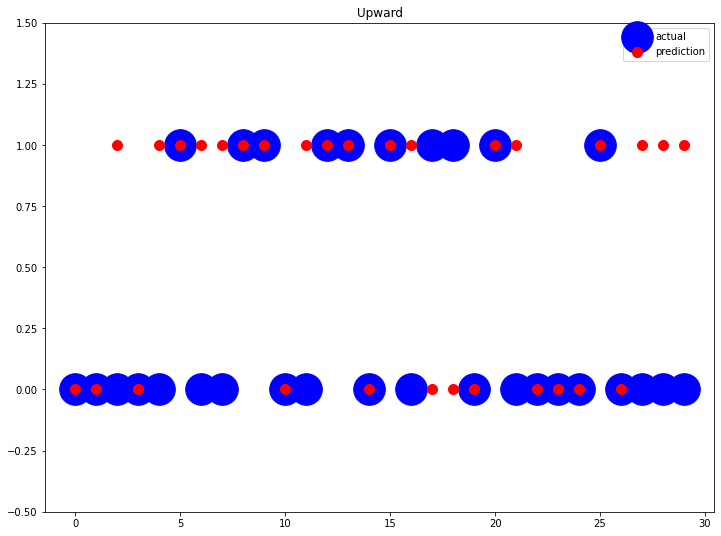

accuracy 0.6
[[10 10]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.83      0.50      0.62        20
          상승       0.44      0.80      0.57        10

    accuracy                           0.60        30
   macro avg       0.64      0.65      0.60        30
weighted avg       0.70      0.60      0.61        30


 38
몇 번 돌림 20


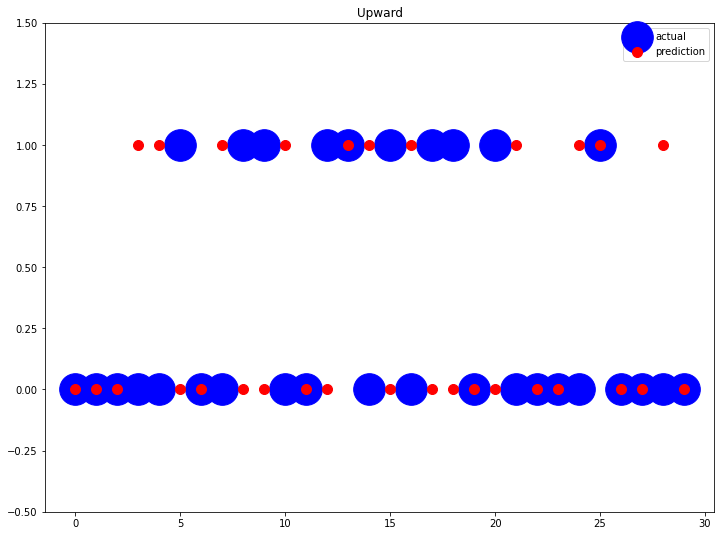

accuracy 0.43333333333333335
[[11  9]
 [ 8  2]]
              precision    recall  f1-score   support

          하락       0.58      0.55      0.56        20
          상승       0.18      0.20      0.19        10

    accuracy                           0.43        30
   macro avg       0.38      0.38      0.38        30
weighted avg       0.45      0.43      0.44        30


 38
몇 번 돌림 21


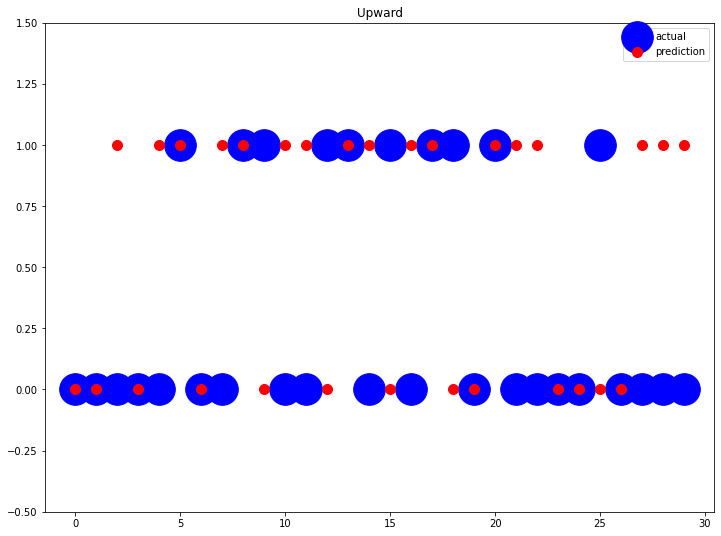

accuracy 0.43333333333333335
[[ 8 12]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.62      0.40      0.48        20
          상승       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30


 38
몇 번 돌림 22


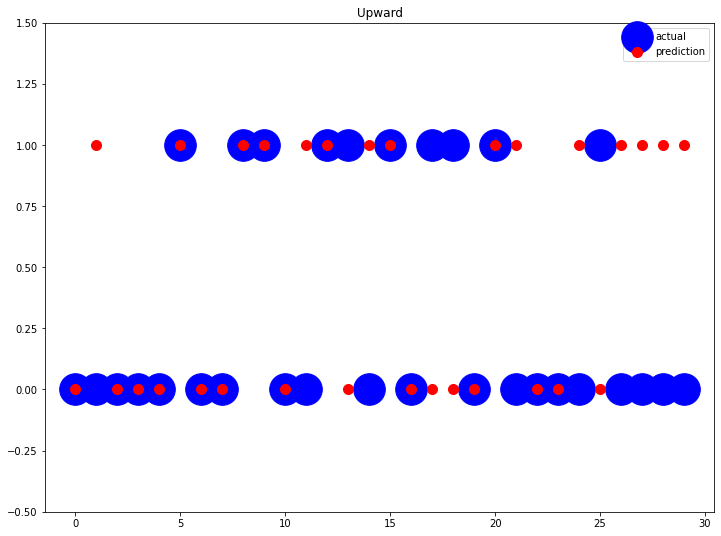

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 38
몇 번 돌림 23


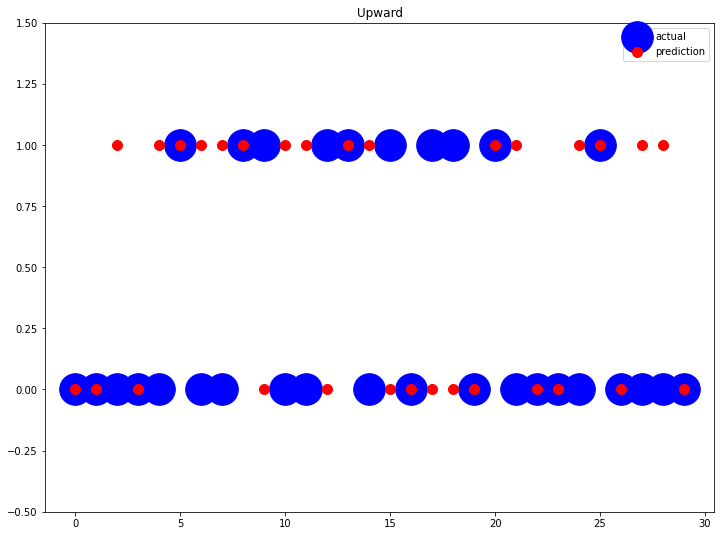

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 38
몇 번 돌림 24


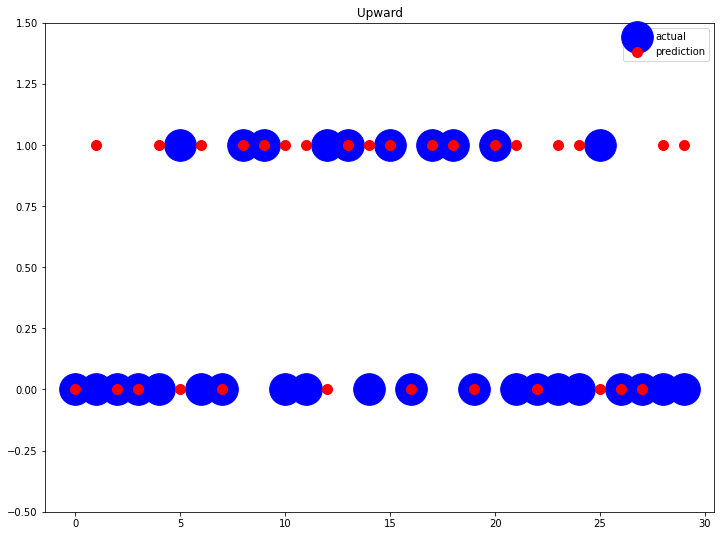

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 38
몇 번 돌림 25


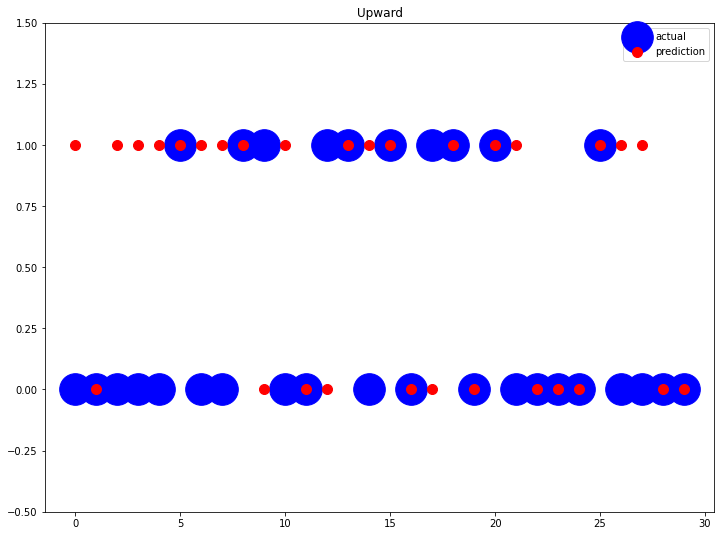

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 38
몇 번 돌림 26


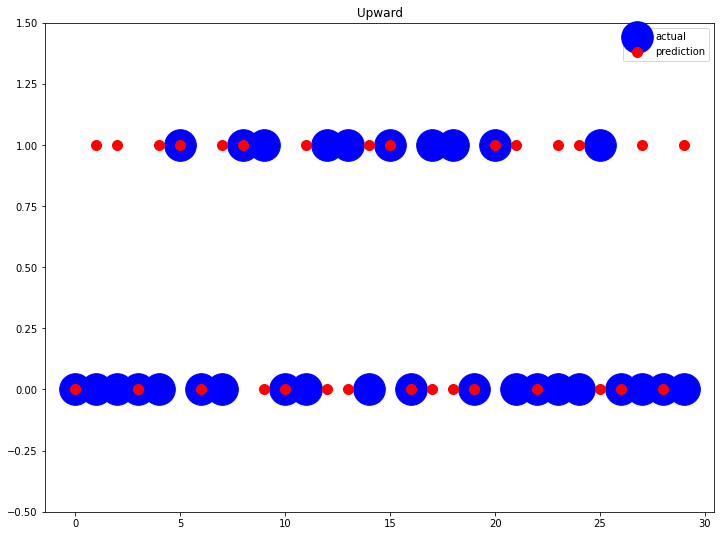

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 38
몇 번 돌림 27


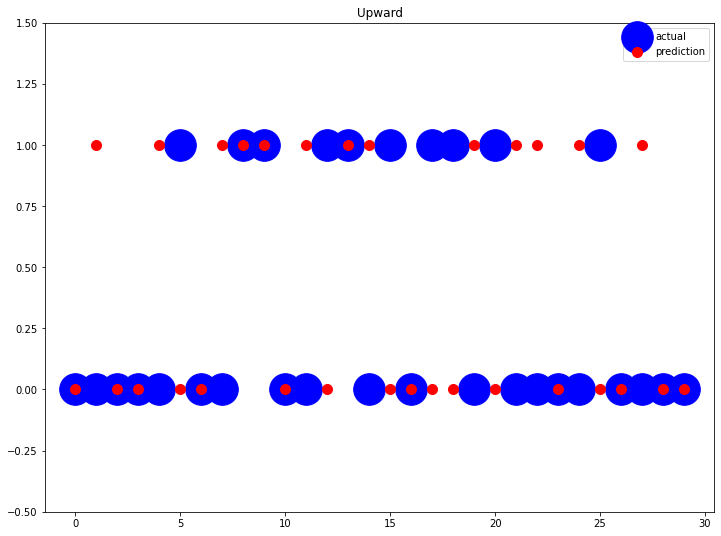

accuracy 0.43333333333333335
[[10 10]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.59      0.50      0.54        20
          상승       0.23      0.30      0.26        10

    accuracy                           0.43        30
   macro avg       0.41      0.40      0.40        30
weighted avg       0.47      0.43      0.45        30


 38
몇 번 돌림 28


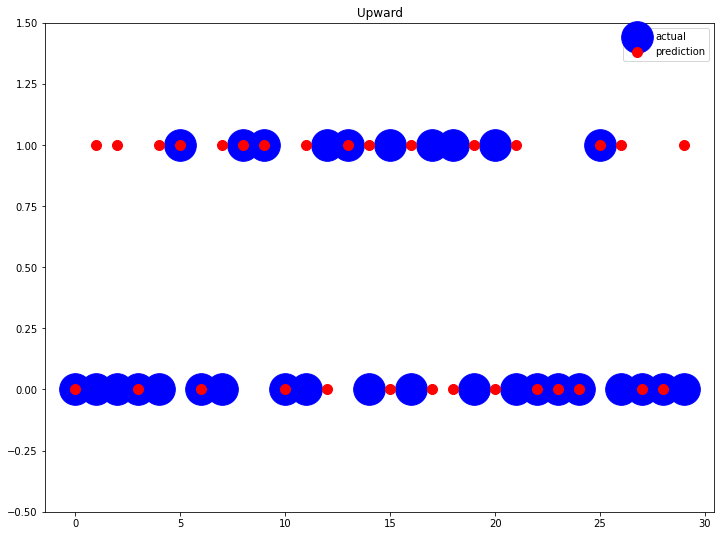

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 38
몇 번 돌림 29


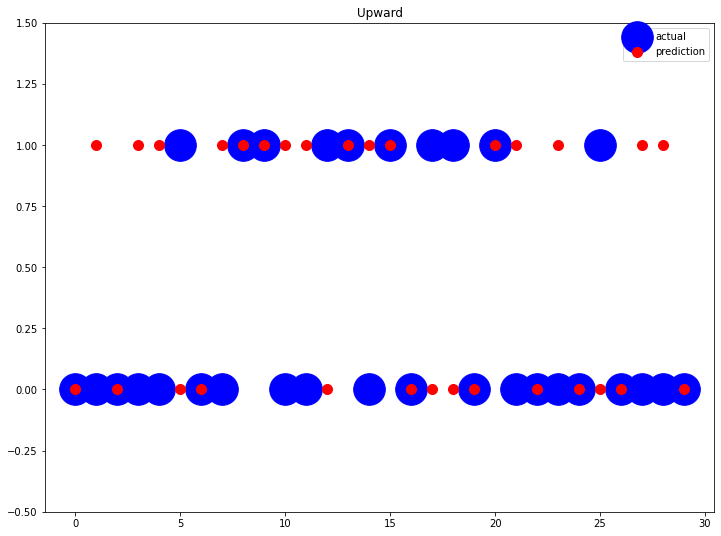

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 38
몇 번 돌림 30


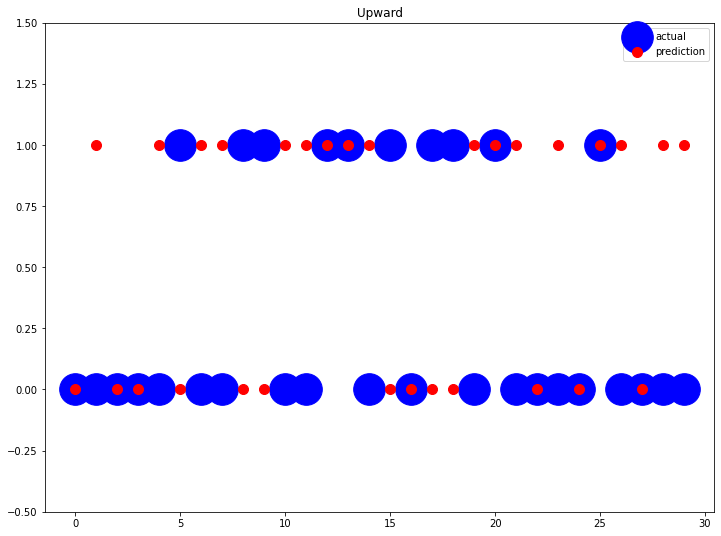

accuracy 0.36666666666666664
[[ 7 13]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.54      0.35      0.42        20
          상승       0.24      0.40      0.30        10

    accuracy                           0.37        30
   macro avg       0.39      0.38      0.36        30
weighted avg       0.44      0.37      0.38        30


 38
몇 번 돌림 31


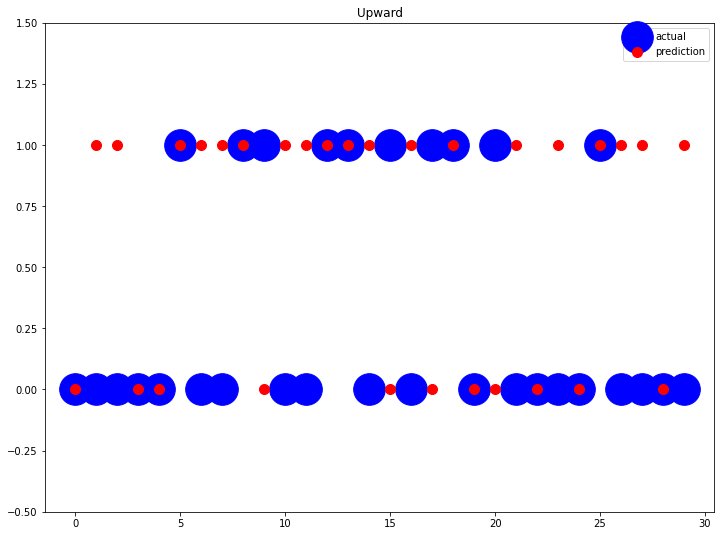

accuracy 0.43333333333333335
[[ 7 13]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.64      0.35      0.45        20
          상승       0.32      0.60      0.41        10

    accuracy                           0.43        30
   macro avg       0.48      0.47      0.43        30
weighted avg       0.53      0.43      0.44        30


 38
몇 번 돌림 32


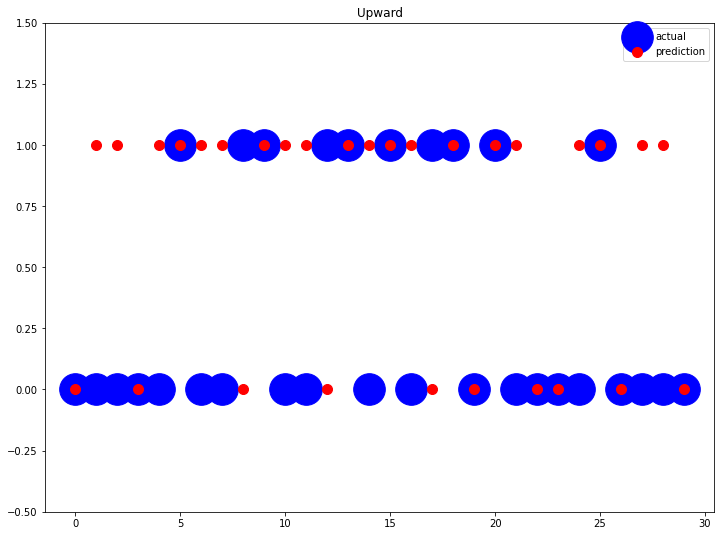

accuracy 0.4666666666666667
[[ 7 13]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.70      0.35      0.47        20
          상승       0.35      0.70      0.47        10

    accuracy                           0.47        30
   macro avg       0.52      0.52      0.47        30
weighted avg       0.58      0.47      0.47        30


 38
몇 번 돌림 33


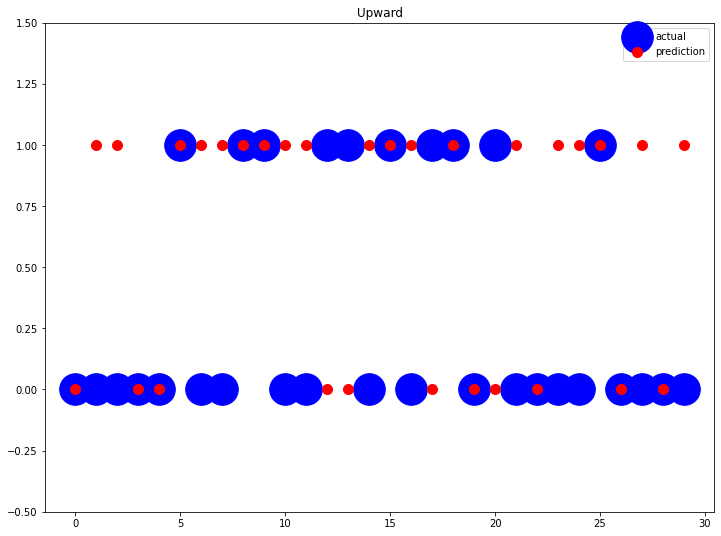

accuracy 0.43333333333333335
[[ 7 13]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.64      0.35      0.45        20
          상승       0.32      0.60      0.41        10

    accuracy                           0.43        30
   macro avg       0.48      0.47      0.43        30
weighted avg       0.53      0.43      0.44        30


 38
몇 번 돌림 34


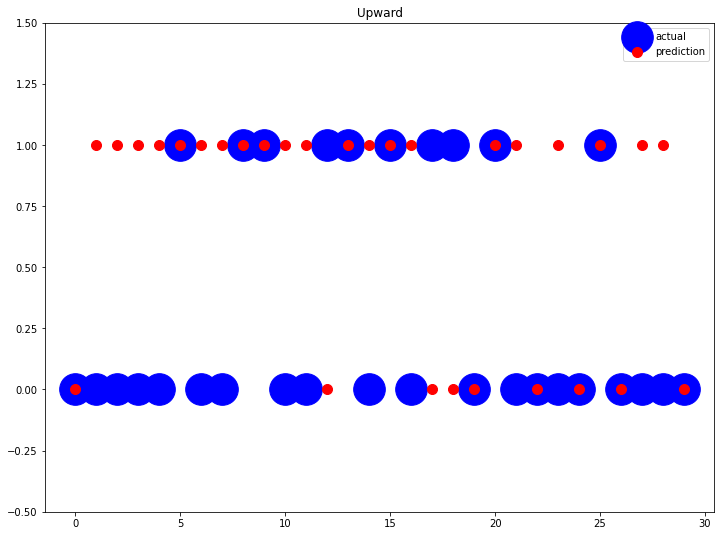

accuracy 0.43333333333333335
[[ 6 14]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.67      0.30      0.41        20
          상승       0.33      0.70      0.45        10

    accuracy                           0.43        30
   macro avg       0.50      0.50      0.43        30
weighted avg       0.56      0.43      0.43        30


 38
몇 번 돌림 35


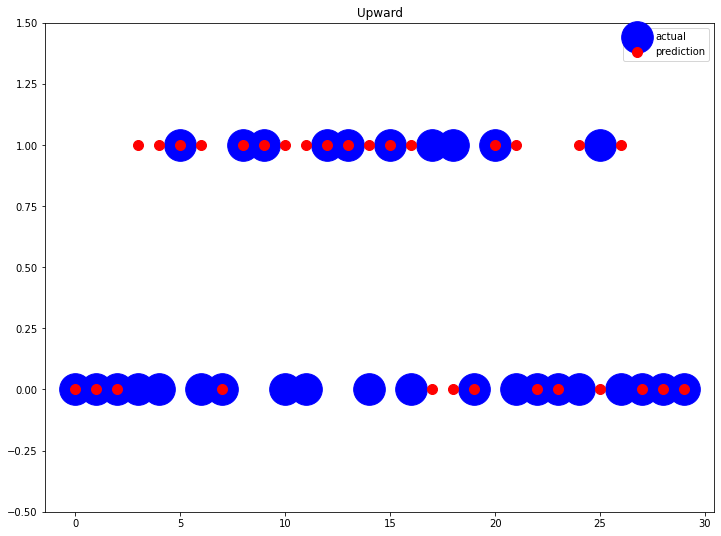

accuracy 0.5666666666666667
[[10 10]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.77      0.50      0.61        20
          상승       0.41      0.70      0.52        10

    accuracy                           0.57        30
   macro avg       0.59      0.60      0.56        30
weighted avg       0.65      0.57      0.58        30


 38
몇 번 돌림 36


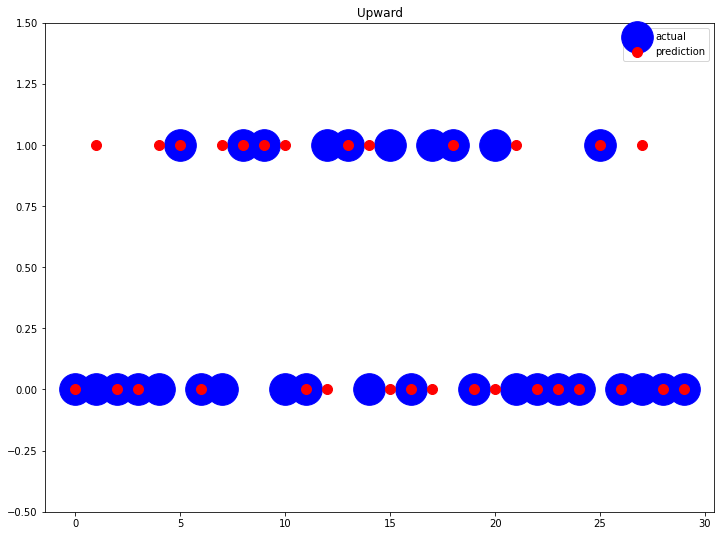

accuracy 0.6333333333333333
[[13  7]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.76      0.65      0.70        20
          상승       0.46      0.60      0.52        10

    accuracy                           0.63        30
   macro avg       0.61      0.62      0.61        30
weighted avg       0.66      0.63      0.64        30


 38
몇 번 돌림 37


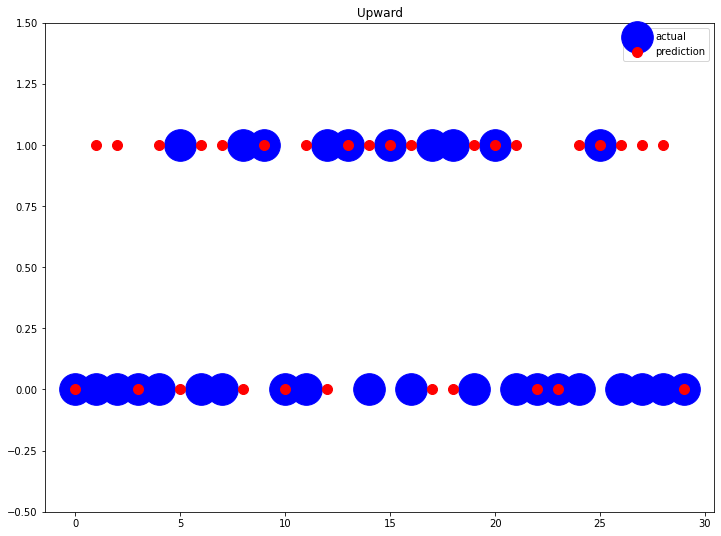

accuracy 0.36666666666666664
[[ 6 14]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.55      0.30      0.39        20
          상승       0.26      0.50      0.34        10

    accuracy                           0.37        30
   macro avg       0.40      0.40      0.37        30
weighted avg       0.45      0.37      0.37        30


 38
몇 번 돌림 38


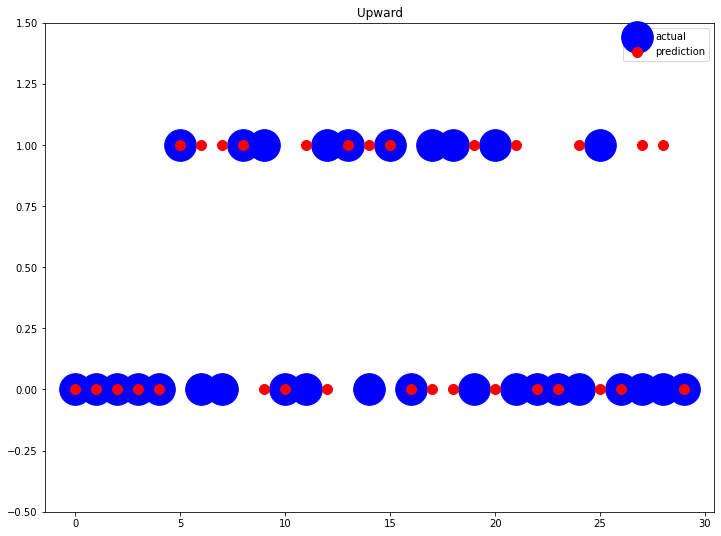

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 38
몇 번 돌림 39


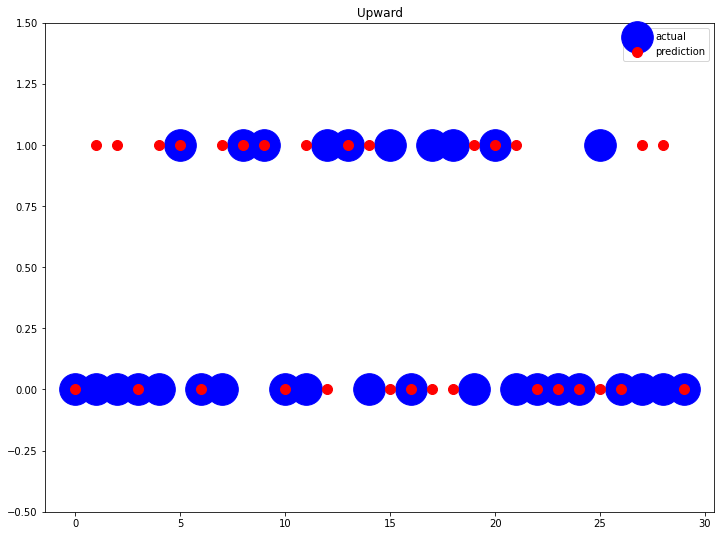

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 38
몇 번 돌림 40


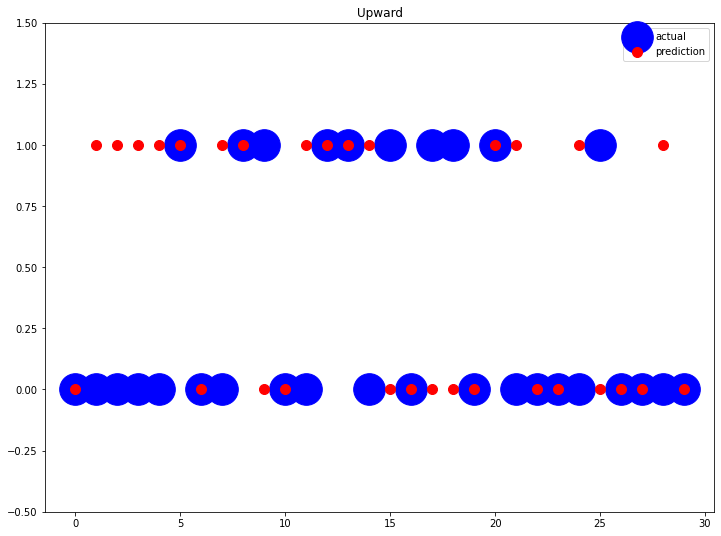

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 38
몇 번 돌림 41


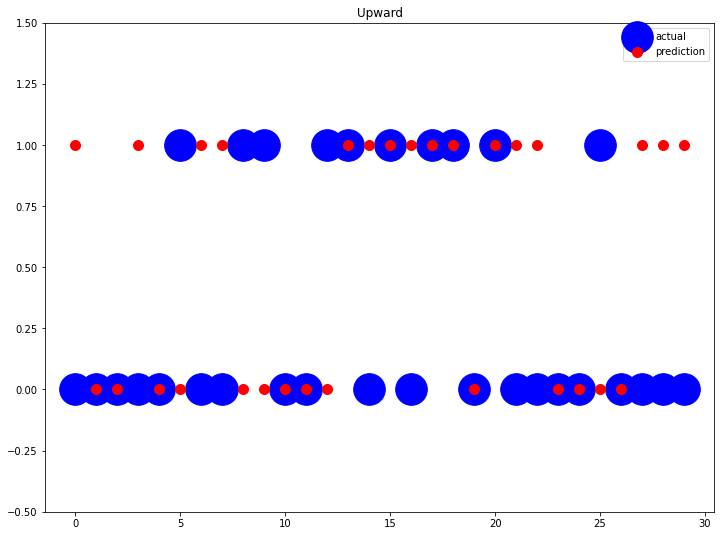

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 38
몇 번 돌림 42


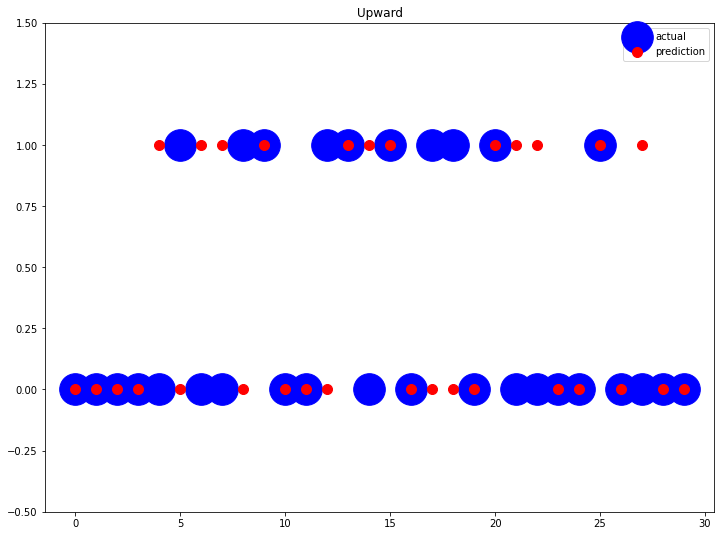

accuracy 0.6
[[13  7]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.72      0.65      0.68        20
          상승       0.42      0.50      0.45        10

    accuracy                           0.60        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.62      0.60      0.61        30


 38
몇 번 돌림 43


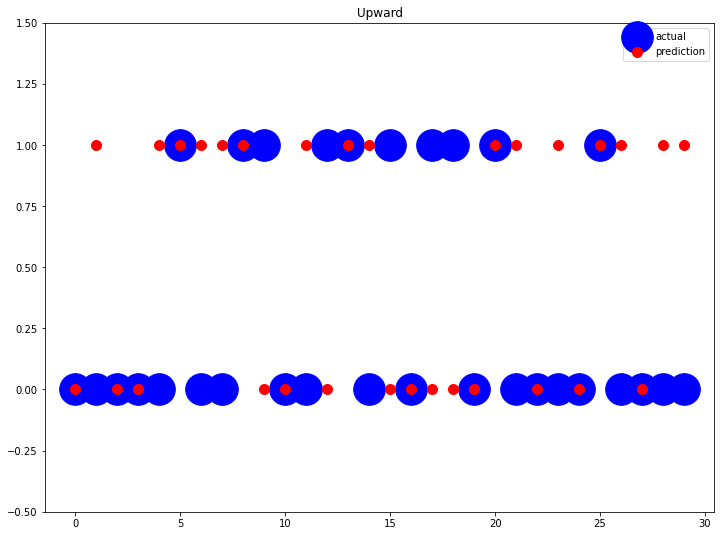

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 38
몇 번 돌림 44


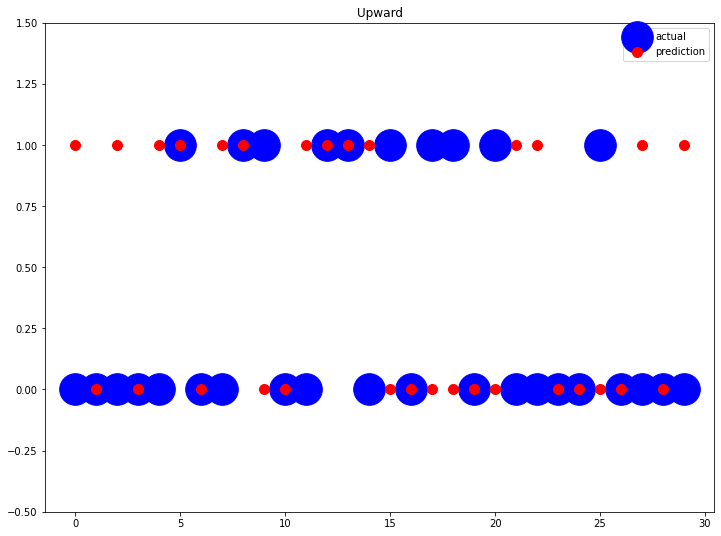

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 38
몇 번 돌림 45


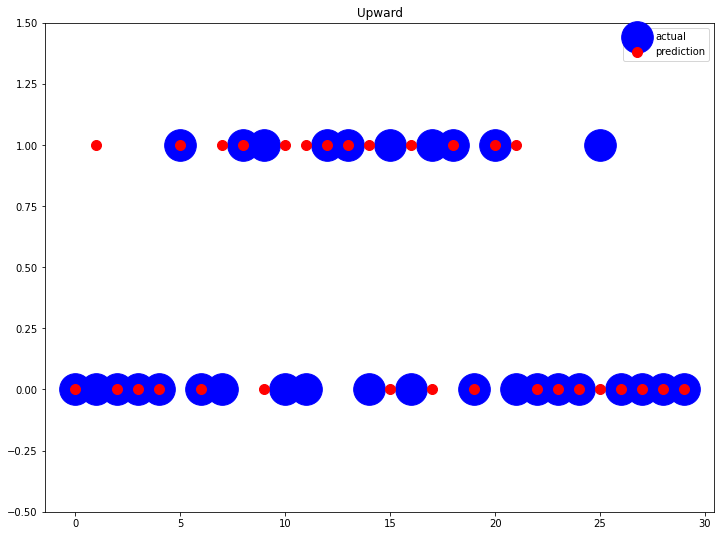

accuracy 0.6333333333333333
[[13  7]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.76      0.65      0.70        20
          상승       0.46      0.60      0.52        10

    accuracy                           0.63        30
   macro avg       0.61      0.62      0.61        30
weighted avg       0.66      0.63      0.64        30


 38
몇 번 돌림 46


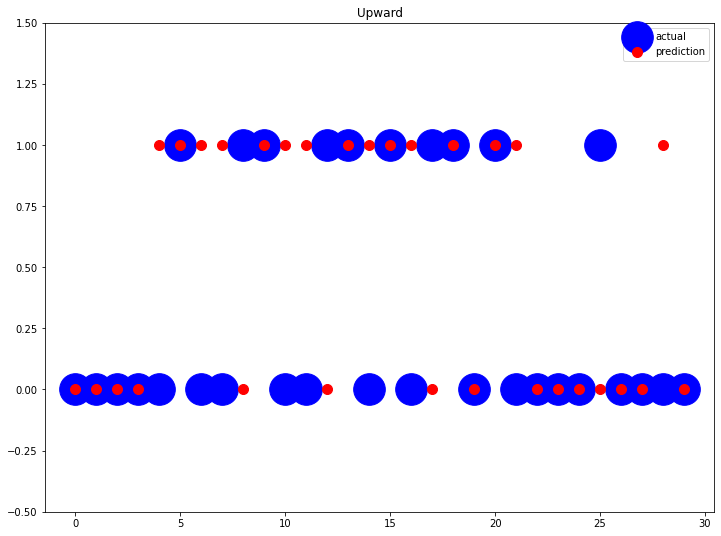

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 38
몇 번 돌림 47


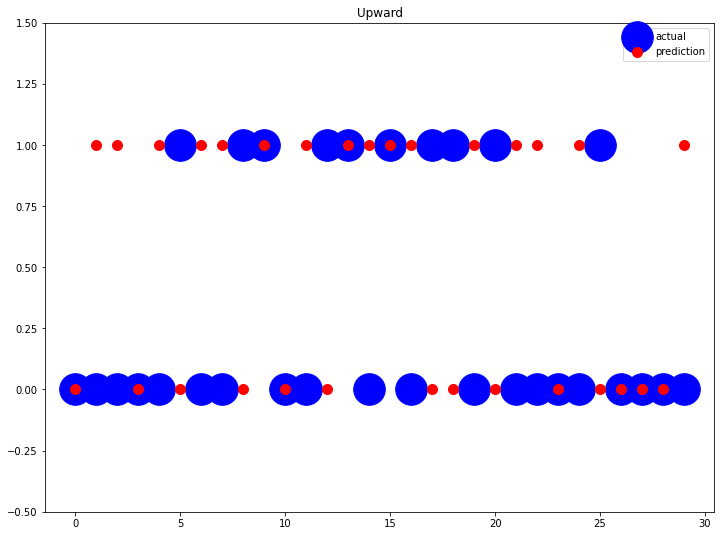

accuracy 0.3333333333333333
[[ 7 13]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.50      0.35      0.41        20
          상승       0.19      0.30      0.23        10

    accuracy                           0.33        30
   macro avg       0.34      0.32      0.32        30
weighted avg       0.40      0.33      0.35        30


 38
몇 번 돌림 48


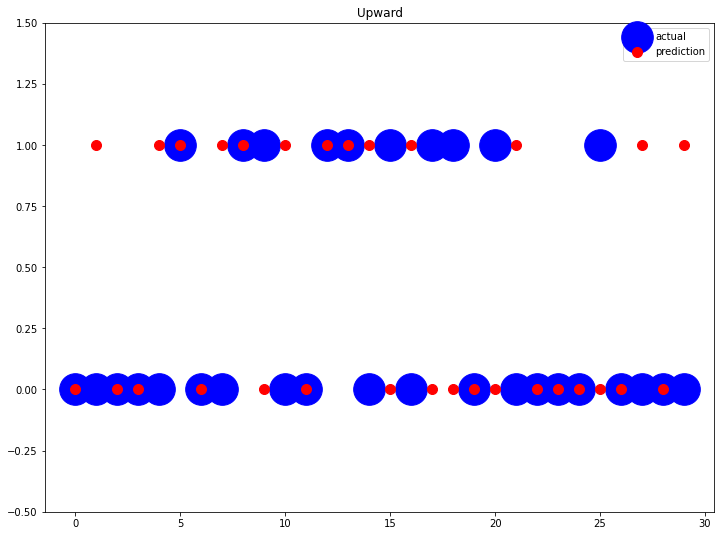

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 38
몇 번 돌림 49


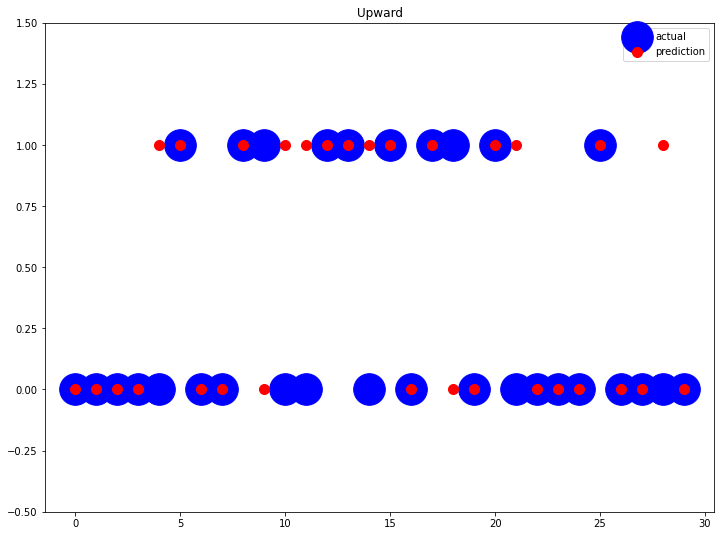

accuracy 0.7333333333333333
[[14  6]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.88      0.70      0.78        20
          상승       0.57      0.80      0.67        10

    accuracy                           0.73        30
   macro avg       0.72      0.75      0.72        30
weighted avg       0.77      0.73      0.74        30


 39
몇 번 돌림 0


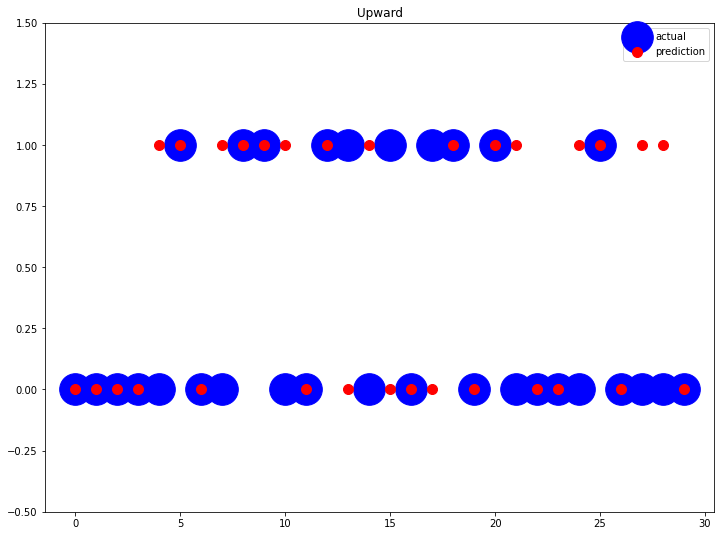

accuracy 0.6333333333333333
[[12  8]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.80      0.60      0.69        20
          상승       0.47      0.70      0.56        10

    accuracy                           0.63        30
   macro avg       0.63      0.65      0.62        30
weighted avg       0.69      0.63      0.64        30


 39
몇 번 돌림 1


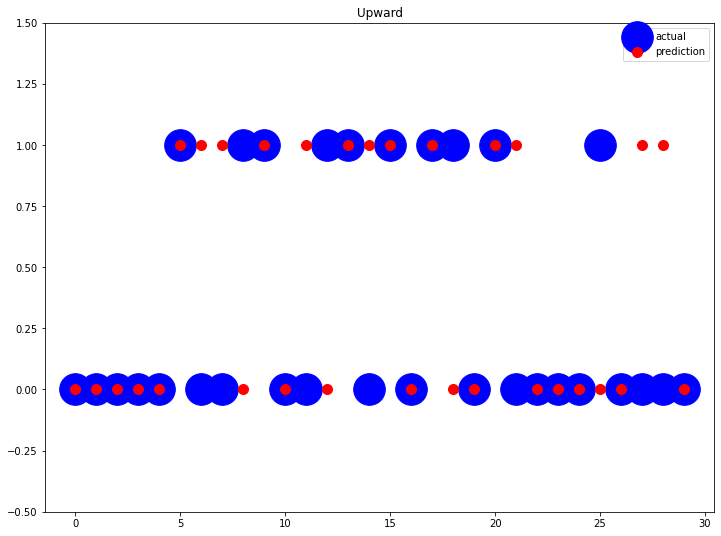

accuracy 0.6333333333333333
[[13  7]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.76      0.65      0.70        20
          상승       0.46      0.60      0.52        10

    accuracy                           0.63        30
   macro avg       0.61      0.62      0.61        30
weighted avg       0.66      0.63      0.64        30


 39
몇 번 돌림 2


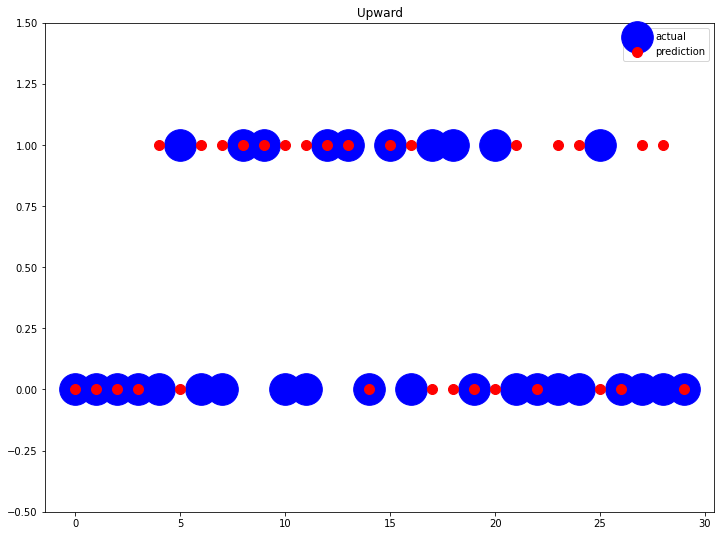

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 39
몇 번 돌림 3


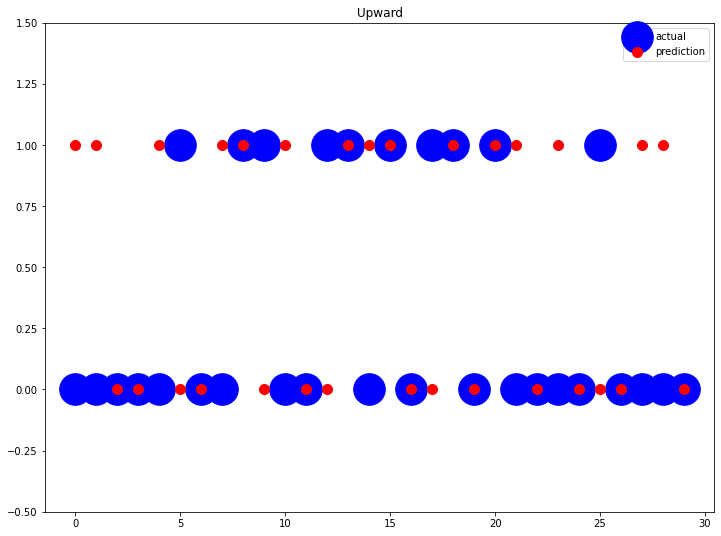

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 39
몇 번 돌림 4


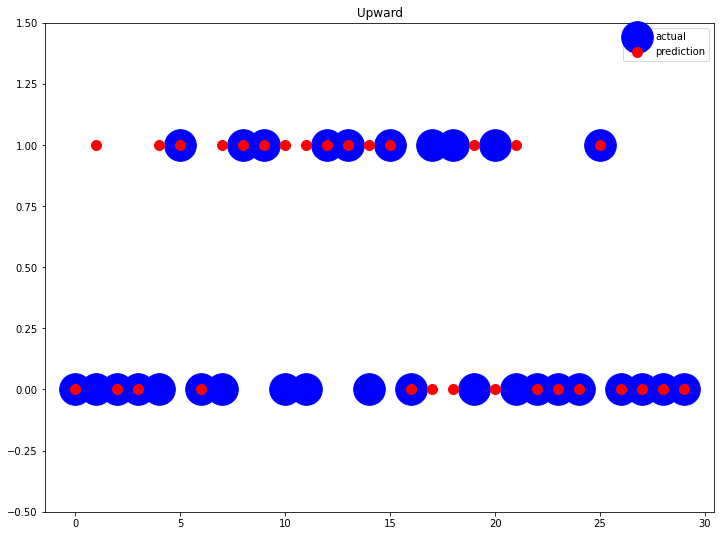

accuracy 0.6333333333333333
[[12  8]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.80      0.60      0.69        20
          상승       0.47      0.70      0.56        10

    accuracy                           0.63        30
   macro avg       0.63      0.65      0.62        30
weighted avg       0.69      0.63      0.64        30


 39
몇 번 돌림 5


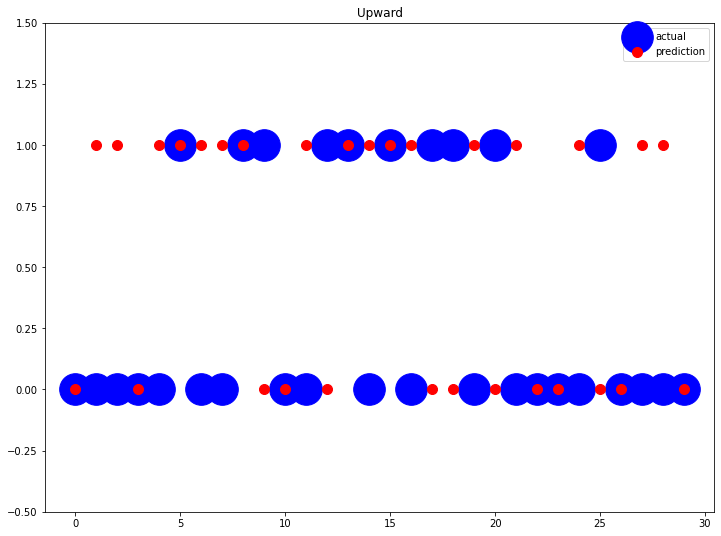

accuracy 0.36666666666666664
[[ 7 13]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.54      0.35      0.42        20
          상승       0.24      0.40      0.30        10

    accuracy                           0.37        30
   macro avg       0.39      0.38      0.36        30
weighted avg       0.44      0.37      0.38        30


 39
몇 번 돌림 6


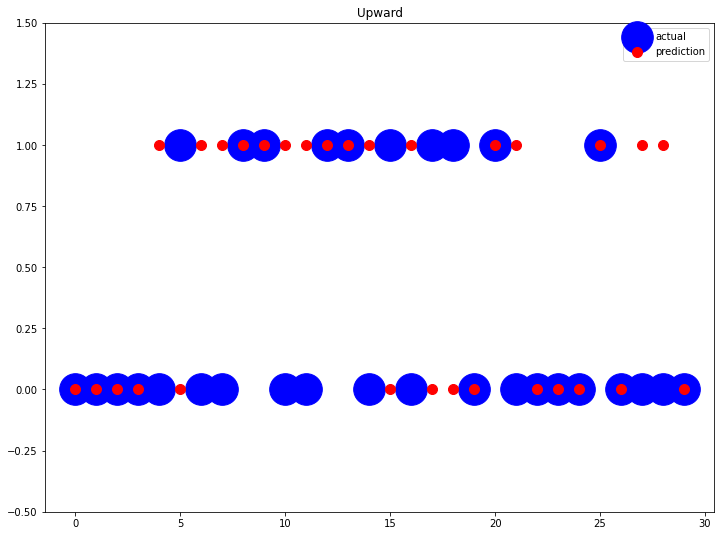

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 39
몇 번 돌림 7


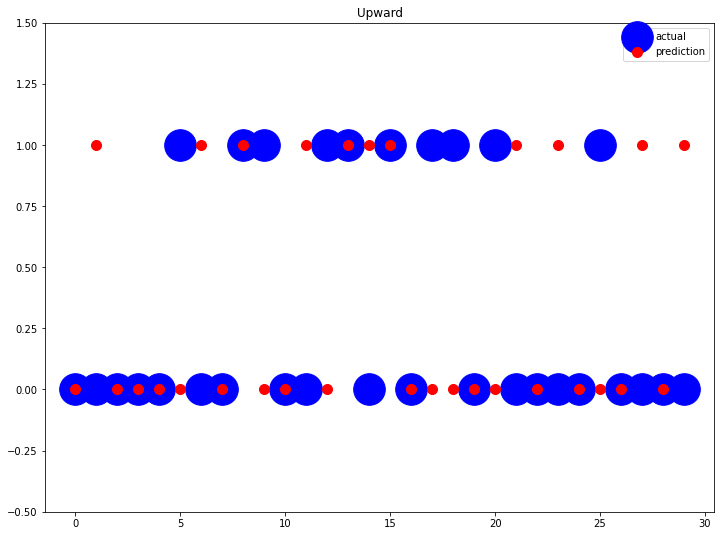

accuracy 0.5
[[12  8]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.63      0.60      0.62        20
          상승       0.27      0.30      0.29        10

    accuracy                           0.50        30
   macro avg       0.45      0.45      0.45        30
weighted avg       0.51      0.50      0.51        30


 39
몇 번 돌림 8


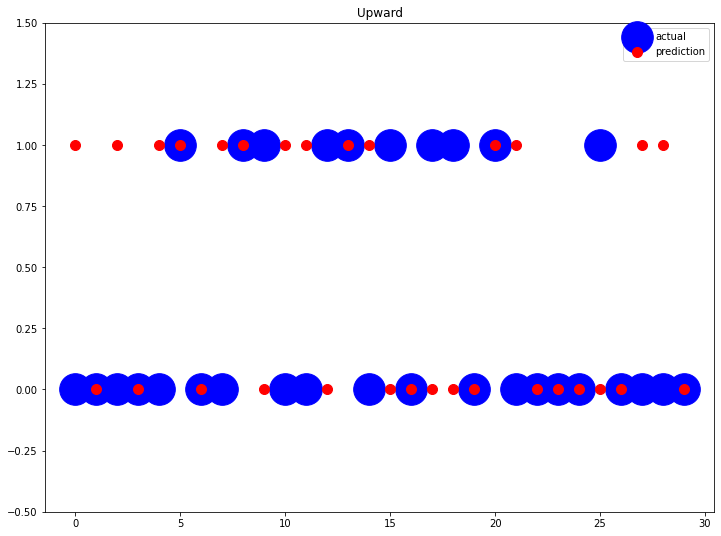

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 39
몇 번 돌림 9


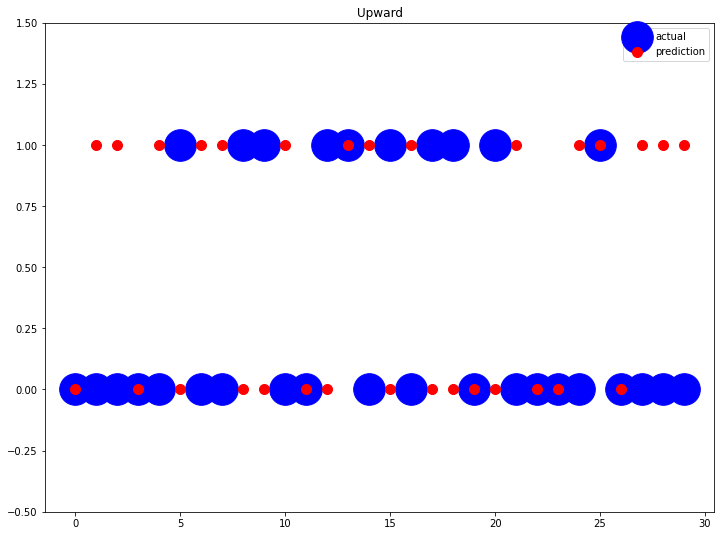

accuracy 0.3
[[ 7 13]
 [ 8  2]]
              precision    recall  f1-score   support

          하락       0.47      0.35      0.40        20
          상승       0.13      0.20      0.16        10

    accuracy                           0.30        30
   macro avg       0.30      0.28      0.28        30
weighted avg       0.36      0.30      0.32        30


 39
몇 번 돌림 10


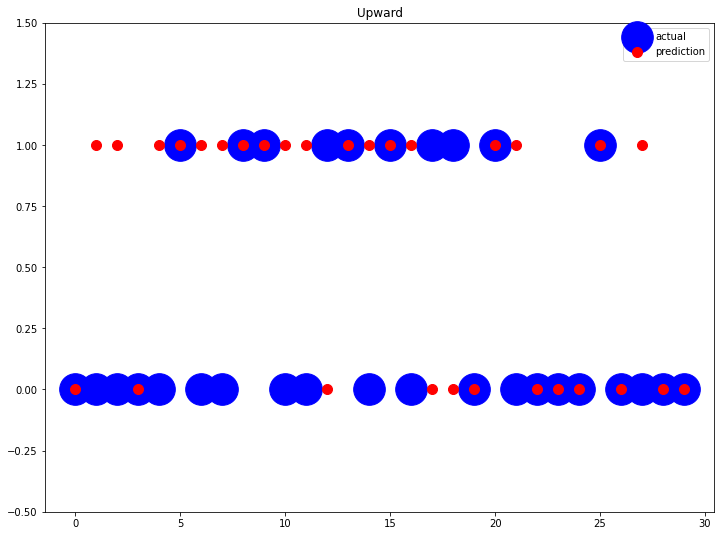

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 39
몇 번 돌림 11


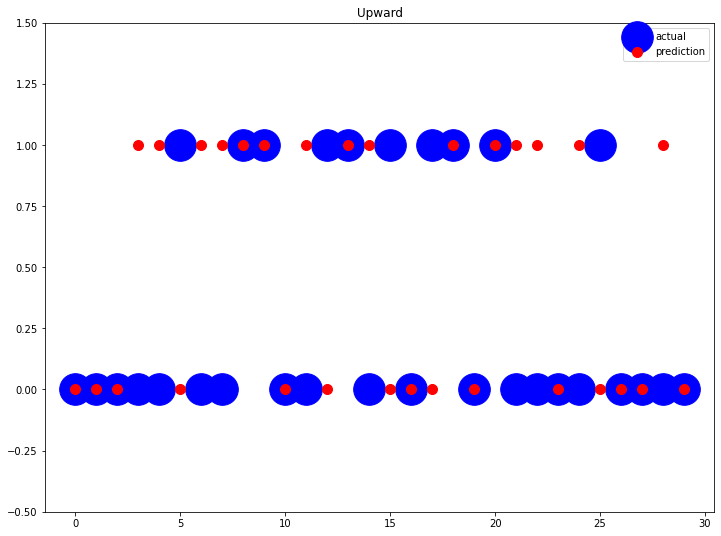

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 39
몇 번 돌림 12


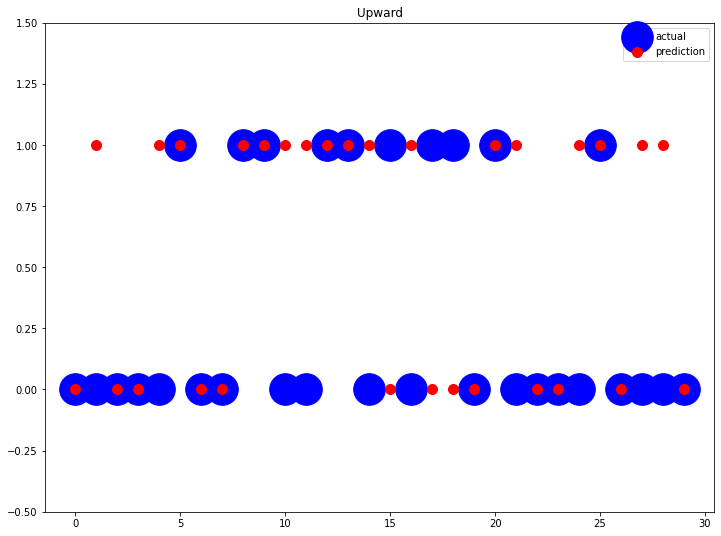

accuracy 0.5666666666666667
[[10 10]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.77      0.50      0.61        20
          상승       0.41      0.70      0.52        10

    accuracy                           0.57        30
   macro avg       0.59      0.60      0.56        30
weighted avg       0.65      0.57      0.58        30


 39
몇 번 돌림 13


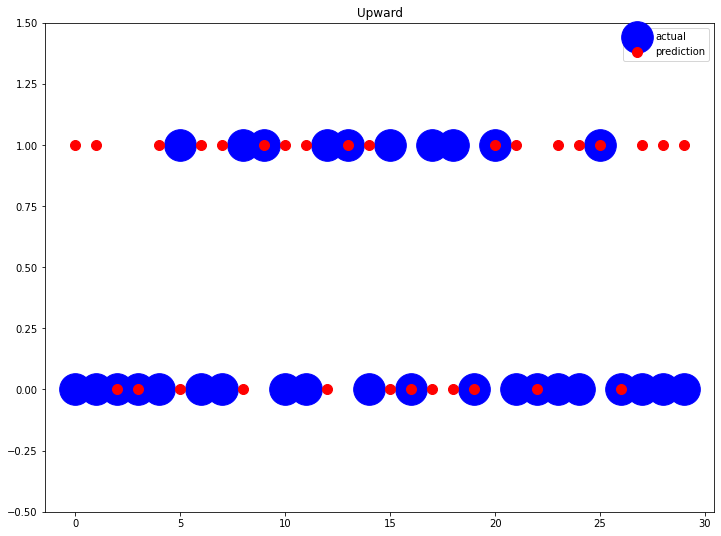

accuracy 0.3333333333333333
[[ 6 14]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.50      0.30      0.37        20
          상승       0.22      0.40      0.29        10

    accuracy                           0.33        30
   macro avg       0.36      0.35      0.33        30
weighted avg       0.41      0.33      0.35        30


 39
몇 번 돌림 14


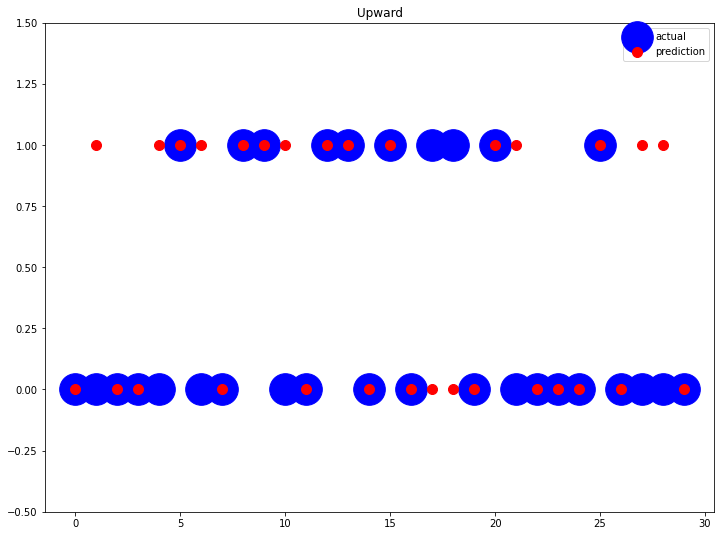

accuracy 0.7
[[13  7]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.87      0.65      0.74        20
          상승       0.53      0.80      0.64        10

    accuracy                           0.70        30
   macro avg       0.70      0.73      0.69        30
weighted avg       0.76      0.70      0.71        30


 39
몇 번 돌림 15


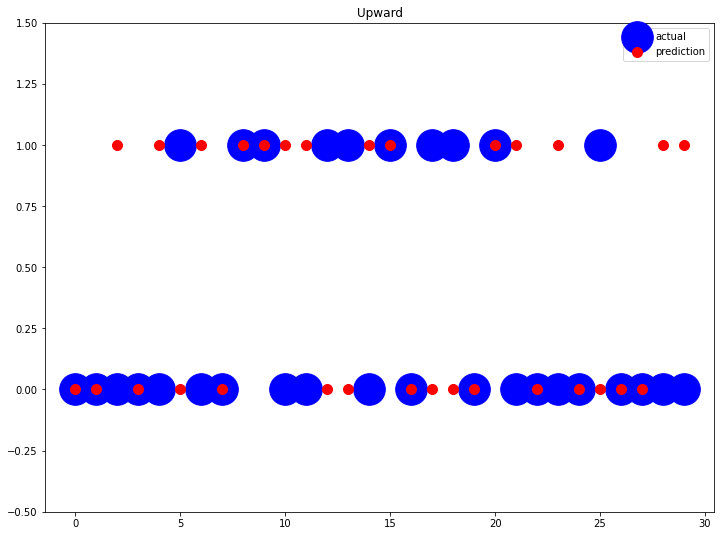

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 39
몇 번 돌림 16


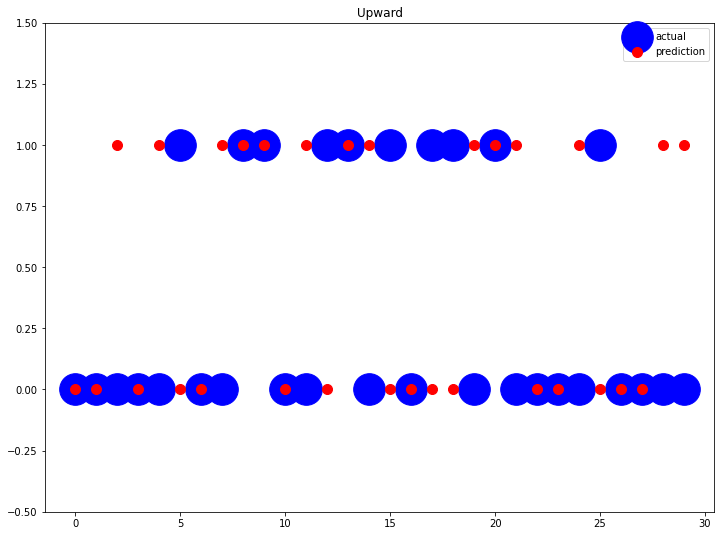

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 39
몇 번 돌림 17


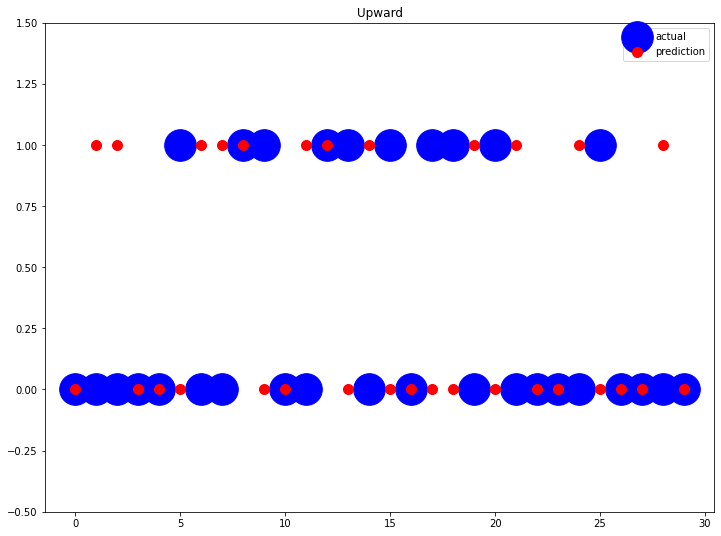

accuracy 0.4
[[10 10]
 [ 8  2]]
              precision    recall  f1-score   support

          하락       0.56      0.50      0.53        20
          상승       0.17      0.20      0.18        10

    accuracy                           0.40        30
   macro avg       0.36      0.35      0.35        30
weighted avg       0.43      0.40      0.41        30


 39
몇 번 돌림 18


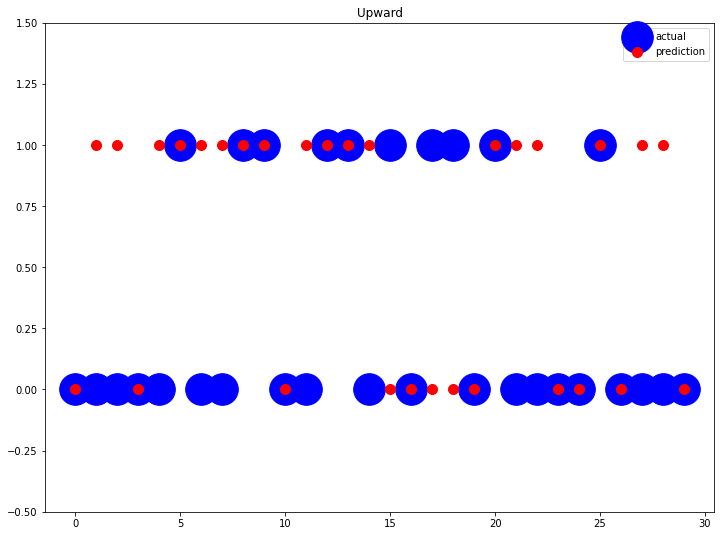

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 39
몇 번 돌림 19


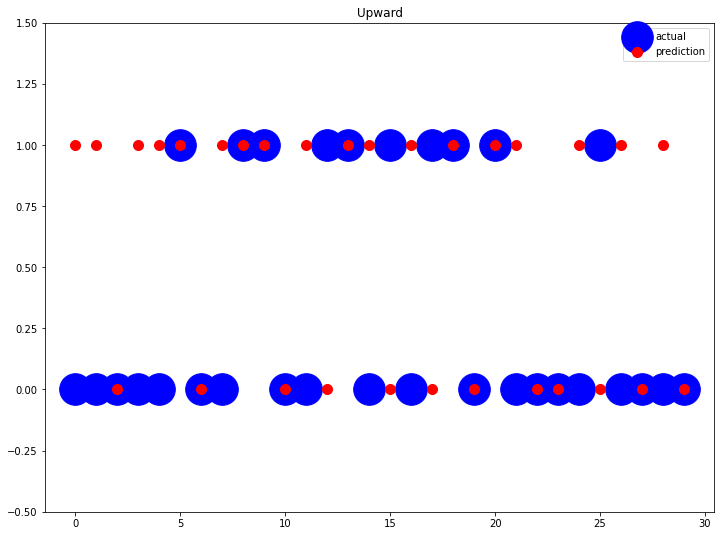

accuracy 0.4666666666666667
[[ 8 12]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.67      0.40      0.50        20
          상승       0.33      0.60      0.43        10

    accuracy                           0.47        30
   macro avg       0.50      0.50      0.46        30
weighted avg       0.56      0.47      0.48        30


 39
몇 번 돌림 20


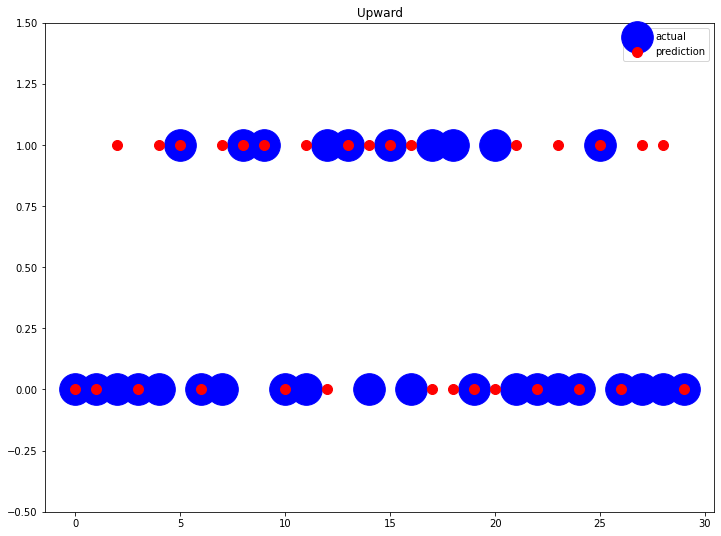

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 39
몇 번 돌림 21


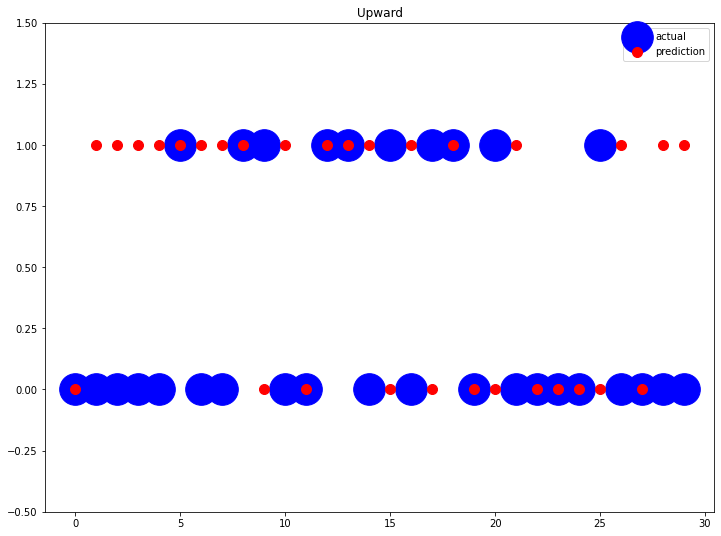

accuracy 0.4
[[ 7 13]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.58      0.35      0.44        20
          상승       0.28      0.50      0.36        10

    accuracy                           0.40        30
   macro avg       0.43      0.42      0.40        30
weighted avg       0.48      0.40      0.41        30


 39
몇 번 돌림 22


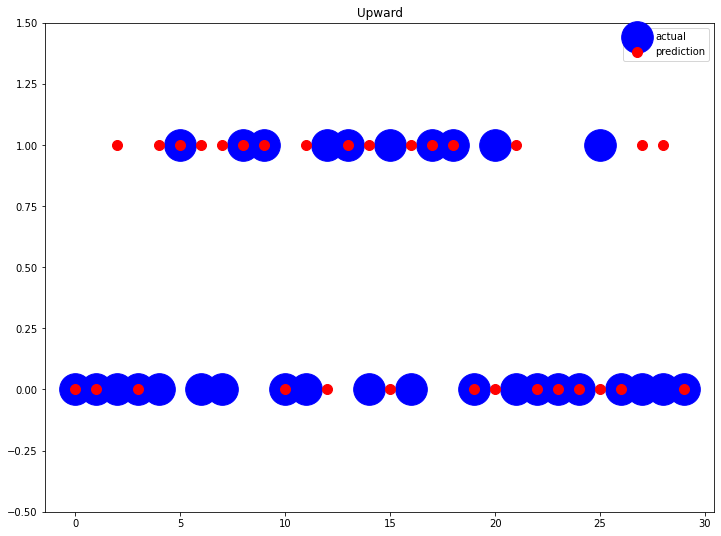

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 39
몇 번 돌림 23


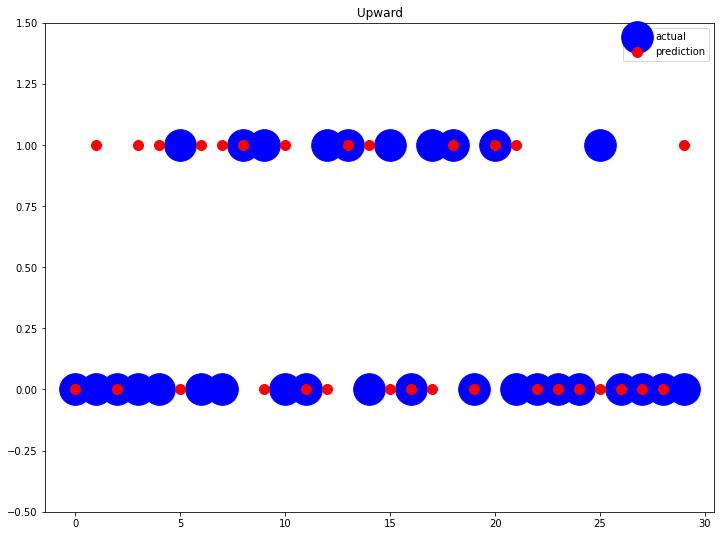

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 39
몇 번 돌림 24


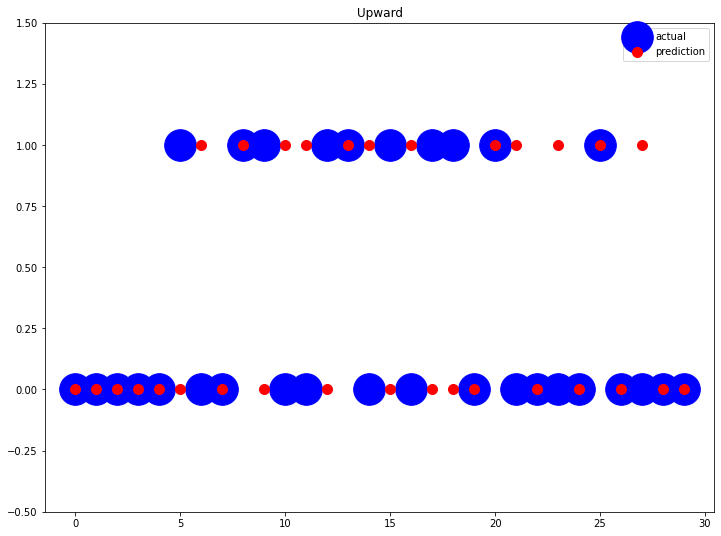

accuracy 0.5333333333333333
[[12  8]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.67      0.60      0.63        20
          상승       0.33      0.40      0.36        10

    accuracy                           0.53        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.56      0.53      0.54        30


 39
몇 번 돌림 25


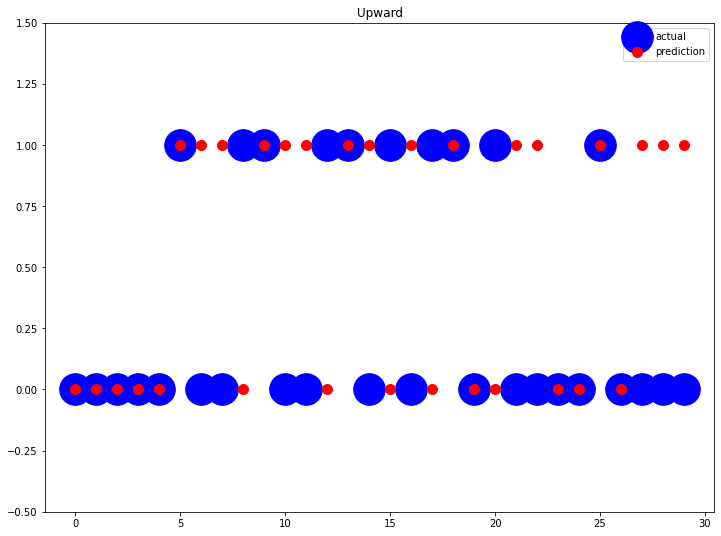

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 39
몇 번 돌림 26


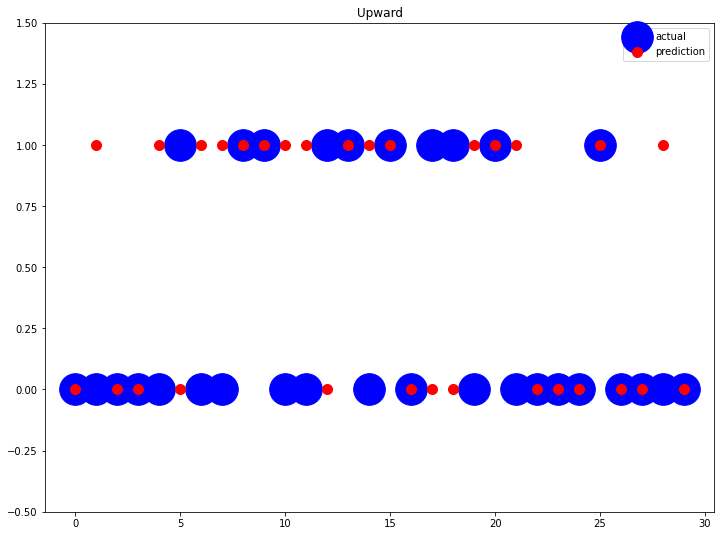

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 39
몇 번 돌림 27


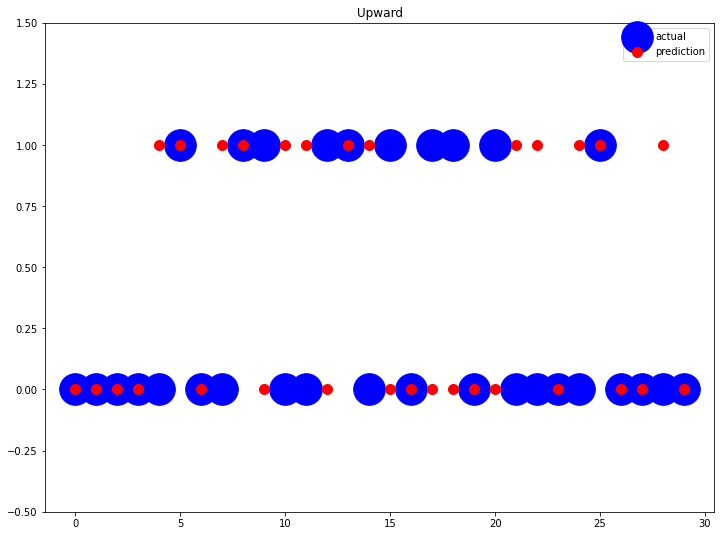

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 39
몇 번 돌림 28


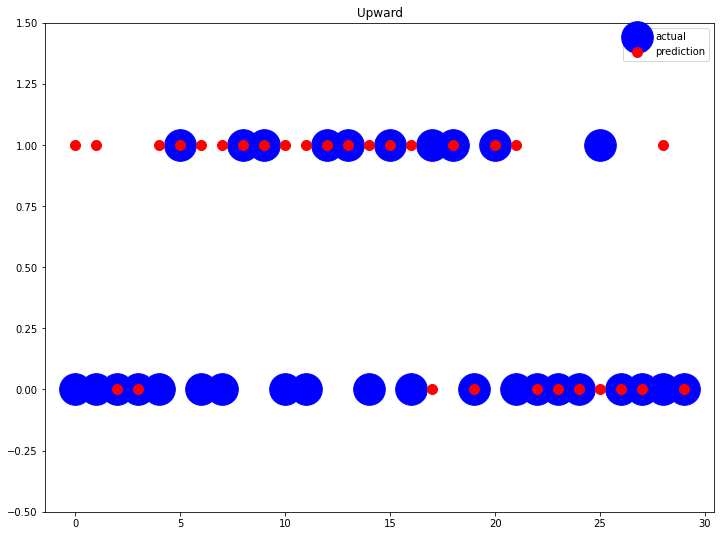

accuracy 0.5666666666666667
[[ 9 11]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.82      0.45      0.58        20
          상승       0.42      0.80      0.55        10

    accuracy                           0.57        30
   macro avg       0.62      0.62      0.57        30
weighted avg       0.69      0.57      0.57        30


 39
몇 번 돌림 29


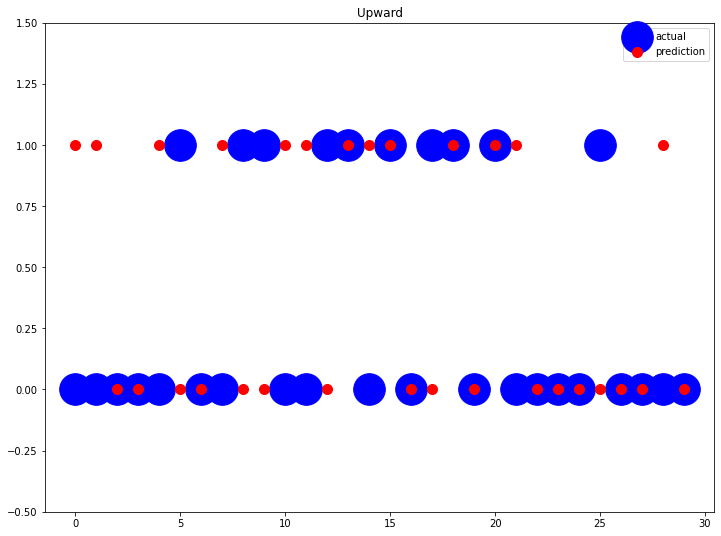

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 39
몇 번 돌림 30


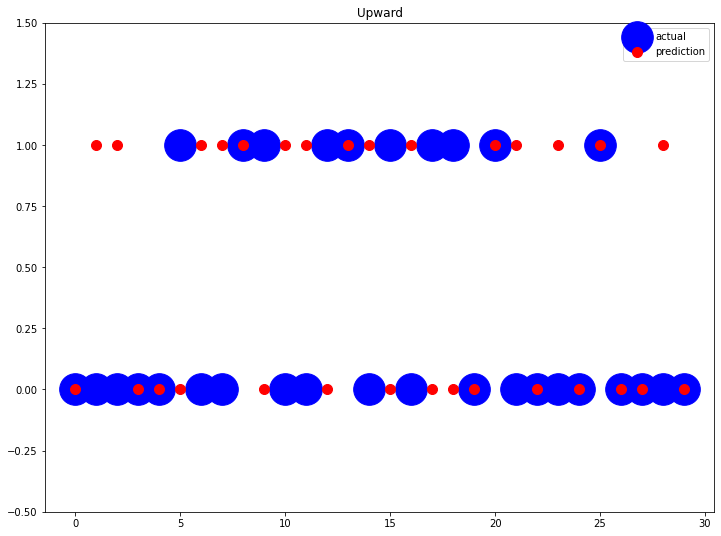

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 39
몇 번 돌림 31


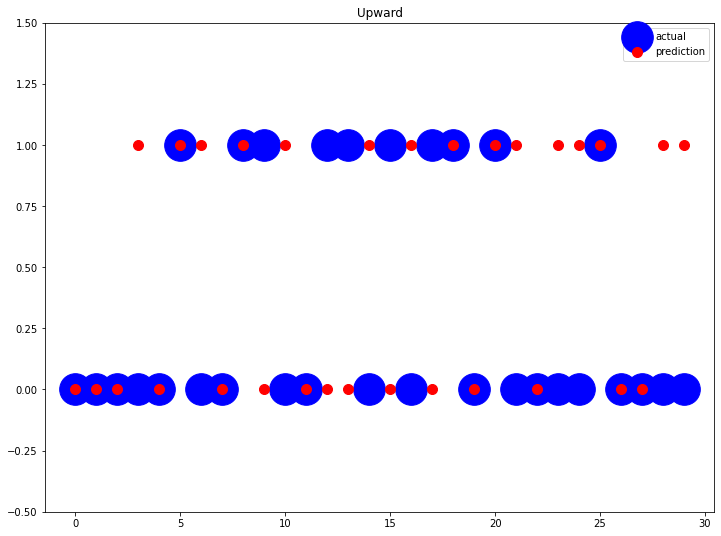

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 39
몇 번 돌림 32


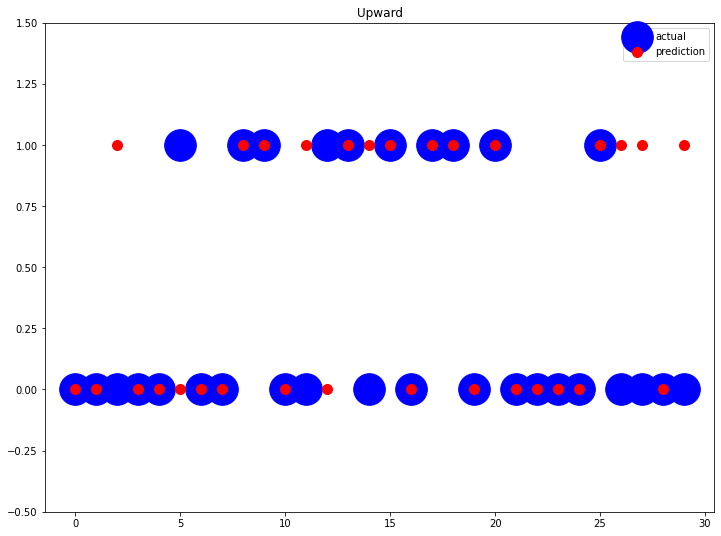

accuracy 0.7333333333333333
[[14  6]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.88      0.70      0.78        20
          상승       0.57      0.80      0.67        10

    accuracy                           0.73        30
   macro avg       0.72      0.75      0.72        30
weighted avg       0.77      0.73      0.74        30


 39
몇 번 돌림 33


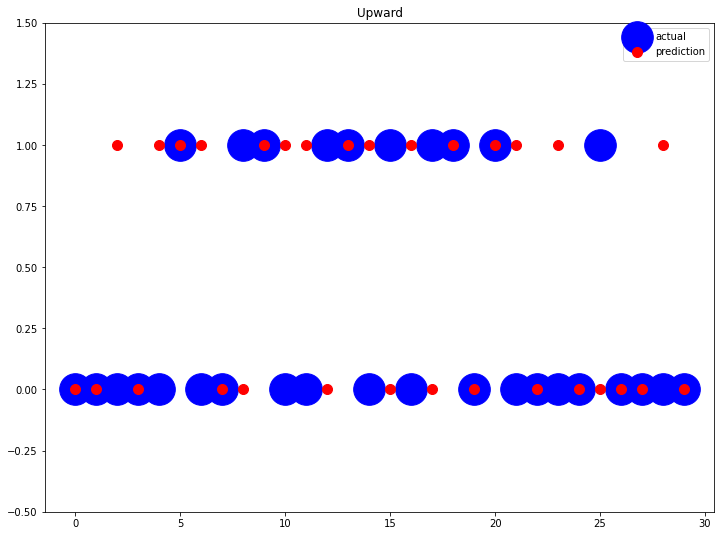

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 39
몇 번 돌림 34


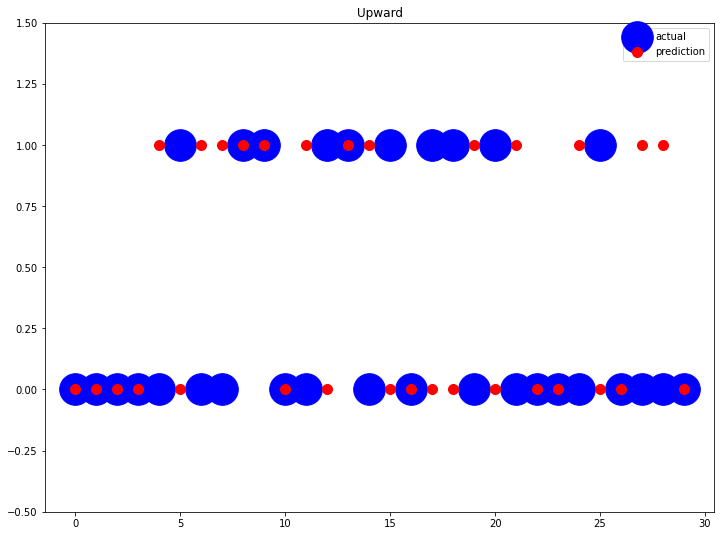

accuracy 0.43333333333333335
[[10 10]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.59      0.50      0.54        20
          상승       0.23      0.30      0.26        10

    accuracy                           0.43        30
   macro avg       0.41      0.40      0.40        30
weighted avg       0.47      0.43      0.45        30


 39
몇 번 돌림 35


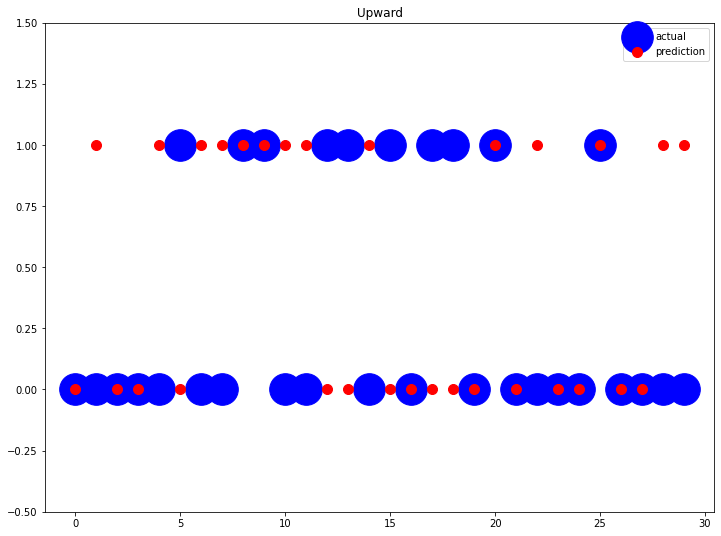

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 39
몇 번 돌림 36


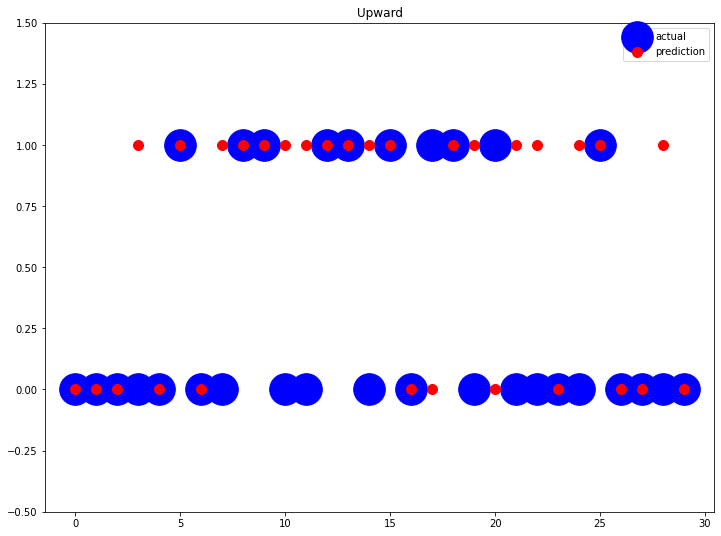

accuracy 0.6
[[10 10]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.83      0.50      0.62        20
          상승       0.44      0.80      0.57        10

    accuracy                           0.60        30
   macro avg       0.64      0.65      0.60        30
weighted avg       0.70      0.60      0.61        30


 39
몇 번 돌림 37


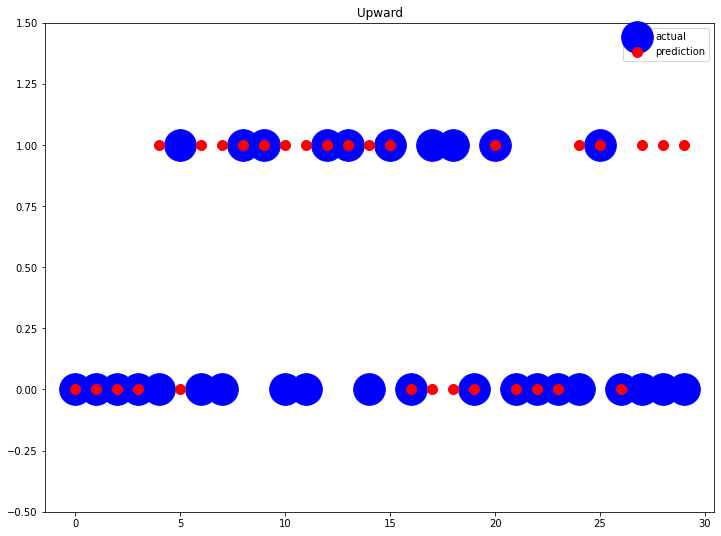

accuracy 0.5666666666666667
[[10 10]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.77      0.50      0.61        20
          상승       0.41      0.70      0.52        10

    accuracy                           0.57        30
   macro avg       0.59      0.60      0.56        30
weighted avg       0.65      0.57      0.58        30


 39
몇 번 돌림 38


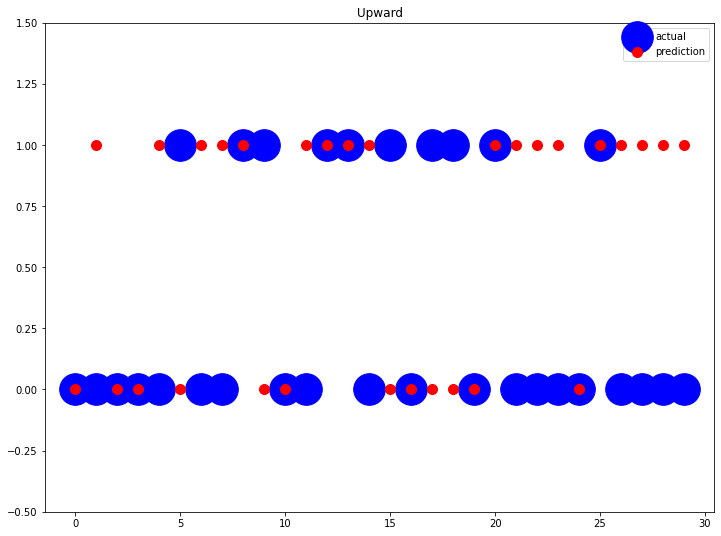

accuracy 0.4
[[ 7 13]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.58      0.35      0.44        20
          상승       0.28      0.50      0.36        10

    accuracy                           0.40        30
   macro avg       0.43      0.42      0.40        30
weighted avg       0.48      0.40      0.41        30


 39
몇 번 돌림 39


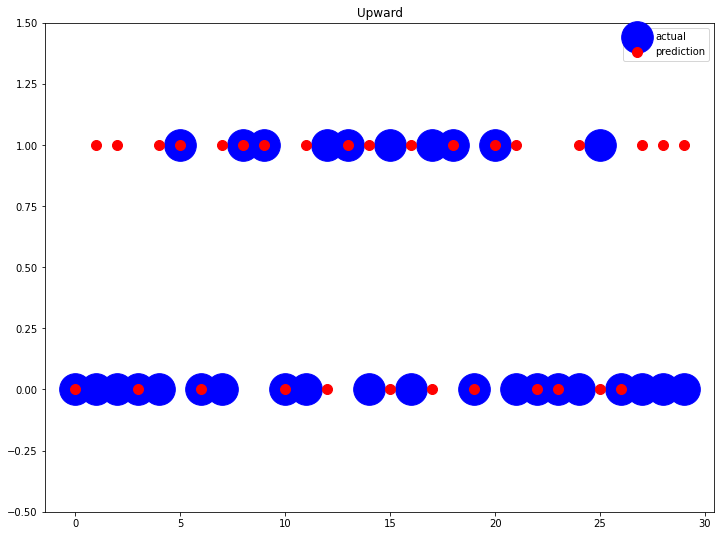

accuracy 0.4666666666666667
[[ 8 12]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.67      0.40      0.50        20
          상승       0.33      0.60      0.43        10

    accuracy                           0.47        30
   macro avg       0.50      0.50      0.46        30
weighted avg       0.56      0.47      0.48        30


 39
몇 번 돌림 40


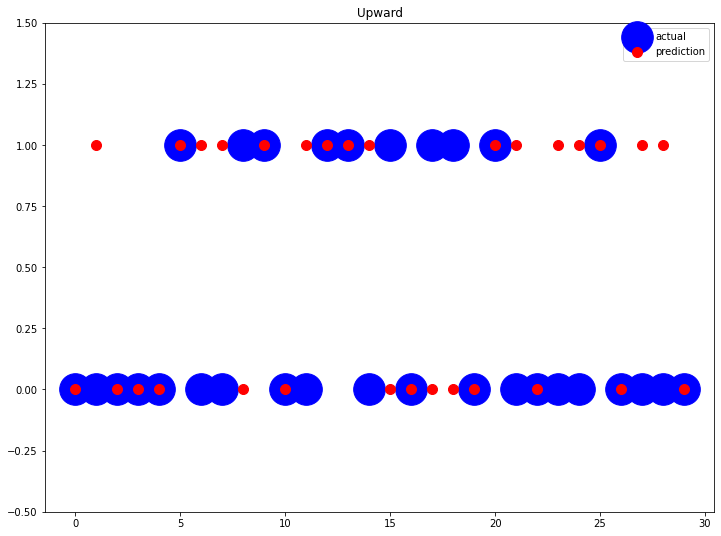

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 39
몇 번 돌림 41


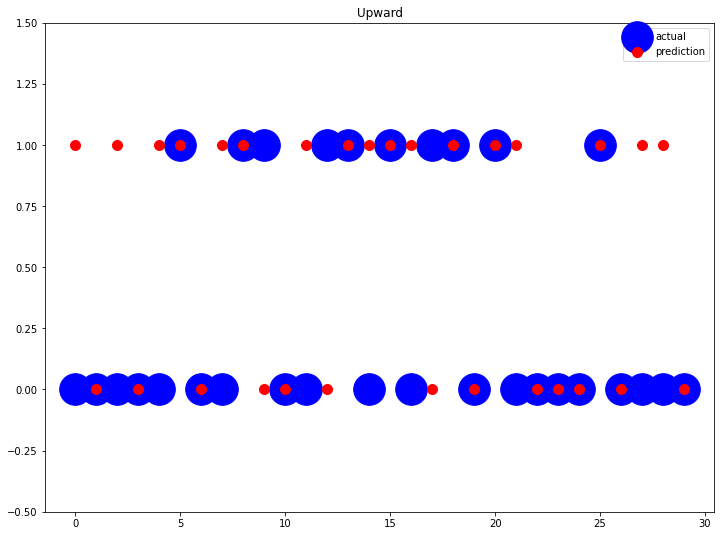

accuracy 0.5666666666666667
[[10 10]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.77      0.50      0.61        20
          상승       0.41      0.70      0.52        10

    accuracy                           0.57        30
   macro avg       0.59      0.60      0.56        30
weighted avg       0.65      0.57      0.58        30


 39
몇 번 돌림 42


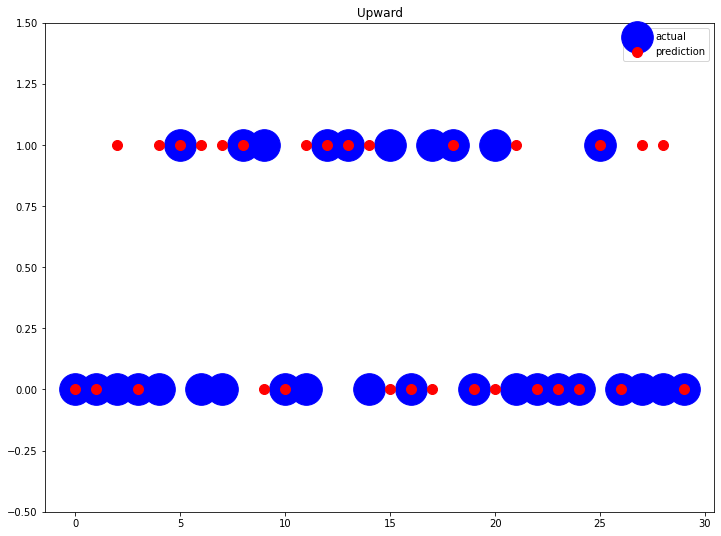

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 39
몇 번 돌림 43


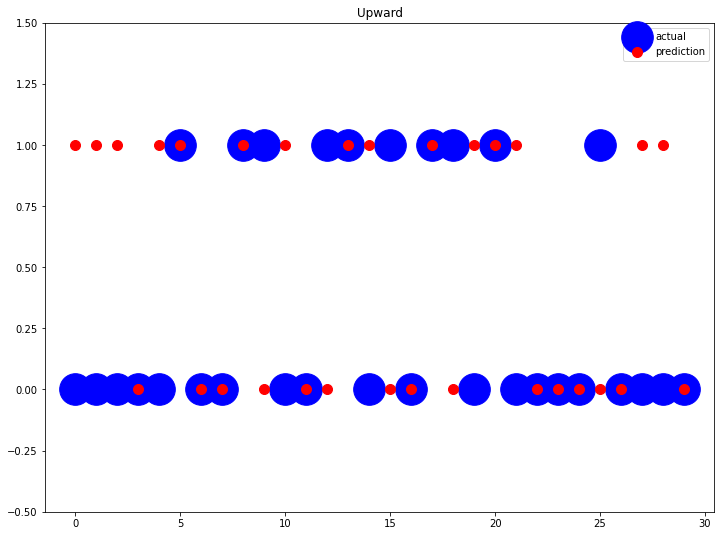

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 39
몇 번 돌림 44


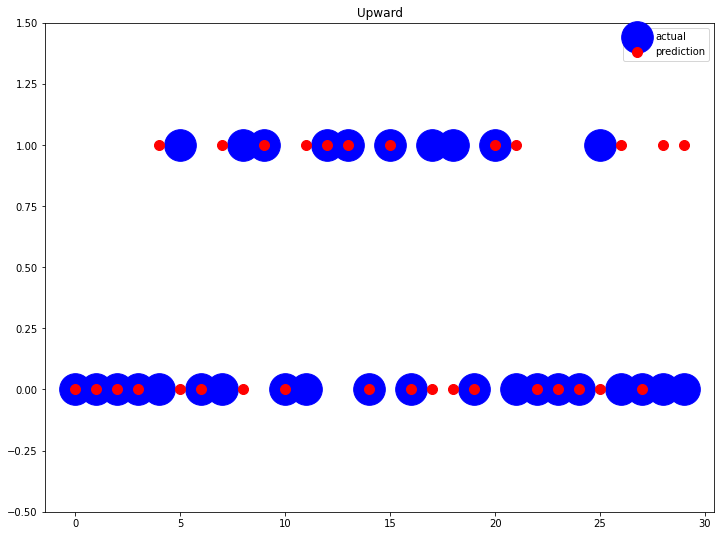

accuracy 0.6
[[13  7]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.72      0.65      0.68        20
          상승       0.42      0.50      0.45        10

    accuracy                           0.60        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.62      0.60      0.61        30


 39
몇 번 돌림 45


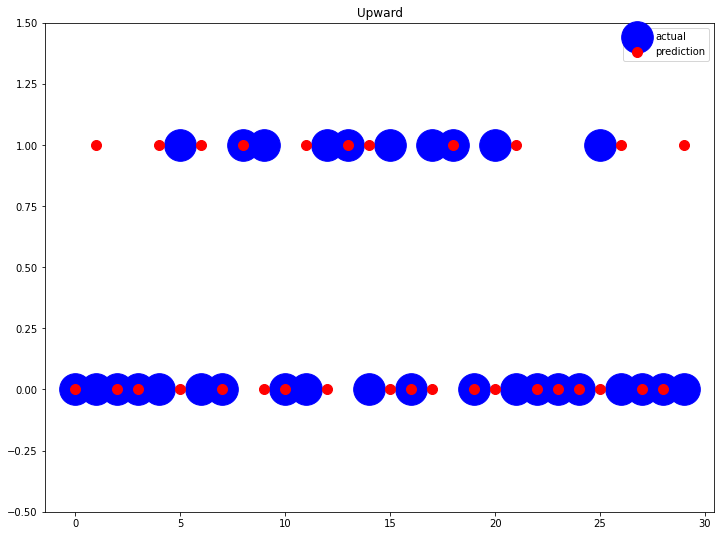

accuracy 0.5
[[12  8]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.63      0.60      0.62        20
          상승       0.27      0.30      0.29        10

    accuracy                           0.50        30
   macro avg       0.45      0.45      0.45        30
weighted avg       0.51      0.50      0.51        30


 39
몇 번 돌림 46


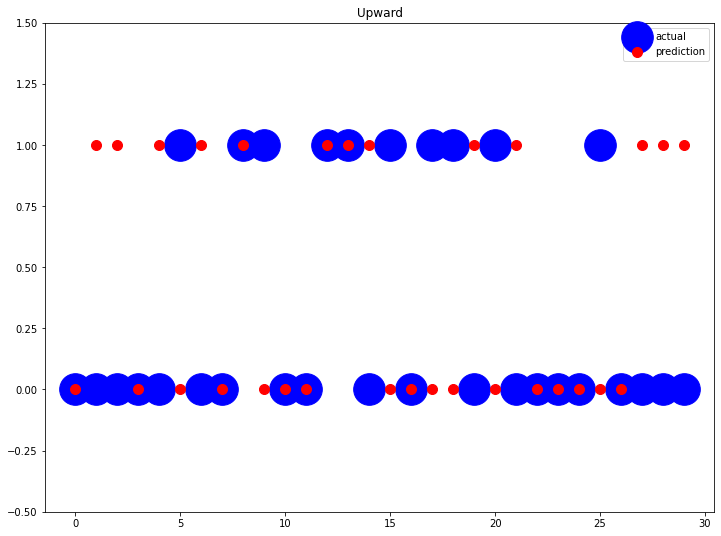

accuracy 0.43333333333333335
[[10 10]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.59      0.50      0.54        20
          상승       0.23      0.30      0.26        10

    accuracy                           0.43        30
   macro avg       0.41      0.40      0.40        30
weighted avg       0.47      0.43      0.45        30


 39
몇 번 돌림 47


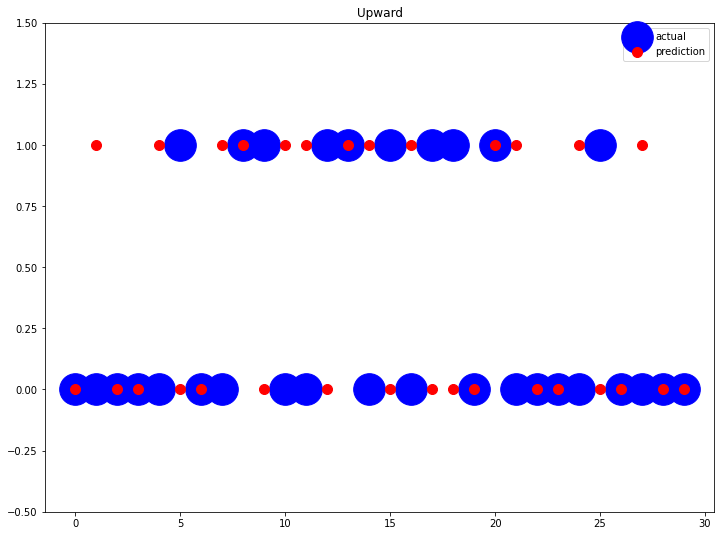

accuracy 0.43333333333333335
[[10 10]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.59      0.50      0.54        20
          상승       0.23      0.30      0.26        10

    accuracy                           0.43        30
   macro avg       0.41      0.40      0.40        30
weighted avg       0.47      0.43      0.45        30


 39
몇 번 돌림 48


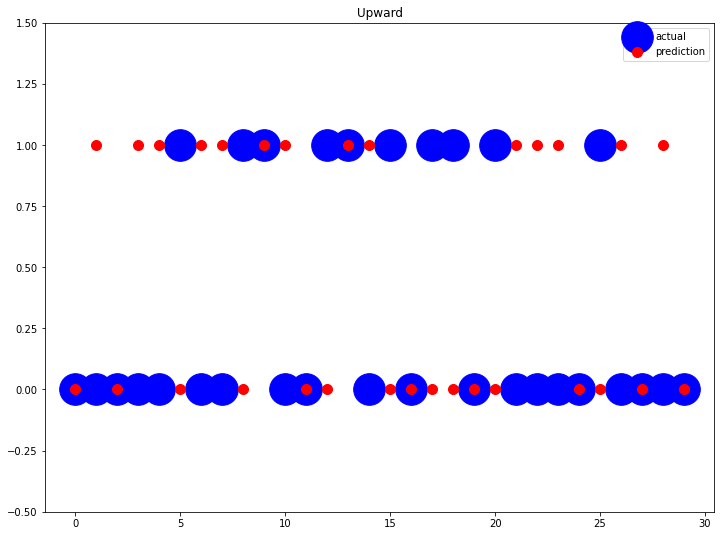

accuracy 0.3333333333333333
[[ 8 12]
 [ 8  2]]
              precision    recall  f1-score   support

          하락       0.50      0.40      0.44        20
          상승       0.14      0.20      0.17        10

    accuracy                           0.33        30
   macro avg       0.32      0.30      0.31        30
weighted avg       0.38      0.33      0.35        30


 39
몇 번 돌림 49


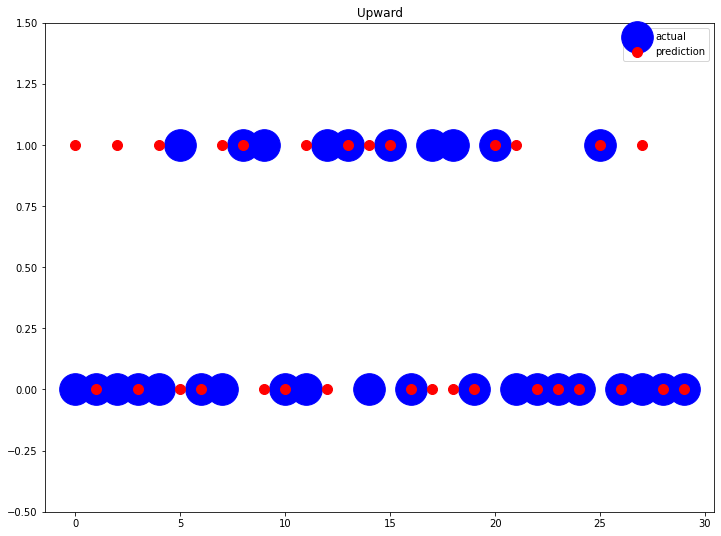

accuracy 0.5666666666666667
[[12  8]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.71      0.60      0.65        20
          상승       0.38      0.50      0.43        10

    accuracy                           0.57        30
   macro avg       0.55      0.55      0.54        30
weighted avg       0.60      0.57      0.58        30


 40
몇 번 돌림 0


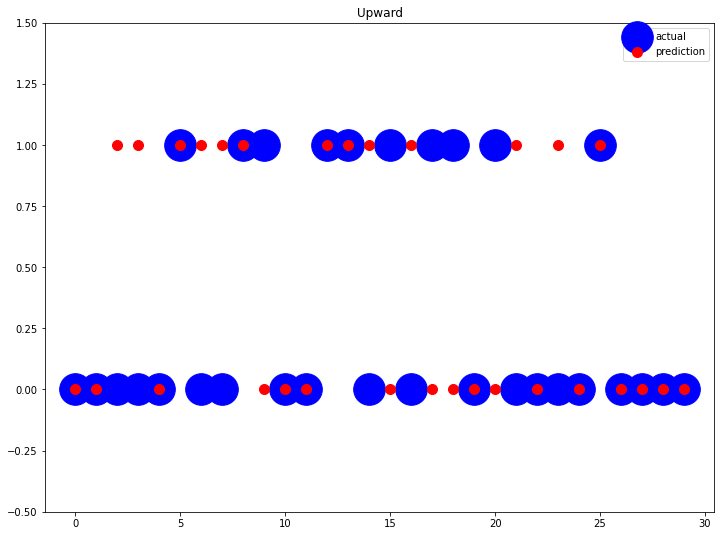

accuracy 0.5666666666666667
[[12  8]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.71      0.60      0.65        20
          상승       0.38      0.50      0.43        10

    accuracy                           0.57        30
   macro avg       0.55      0.55      0.54        30
weighted avg       0.60      0.57      0.58        30


 40
몇 번 돌림 1


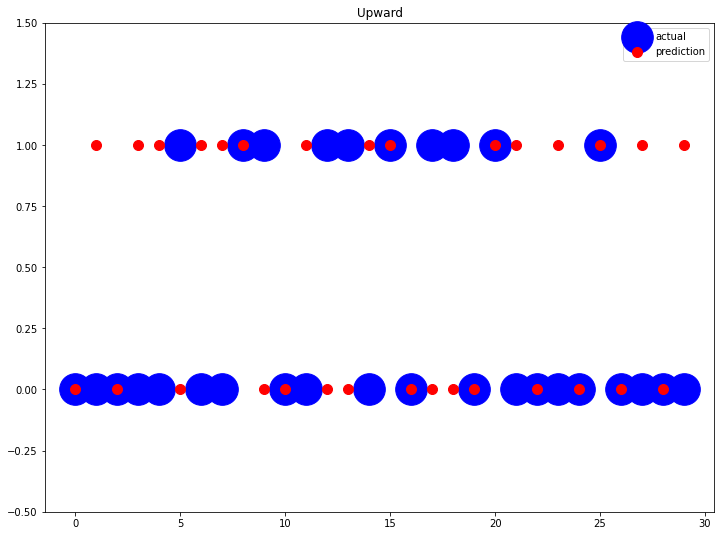

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 40
몇 번 돌림 2


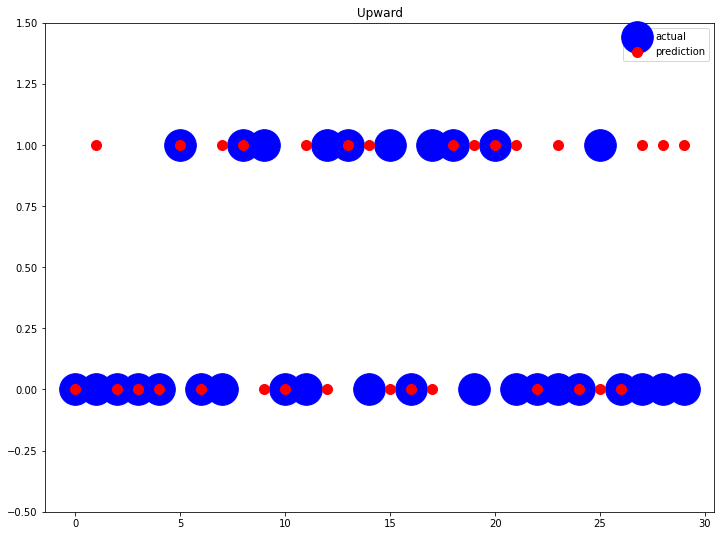

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 40
몇 번 돌림 3


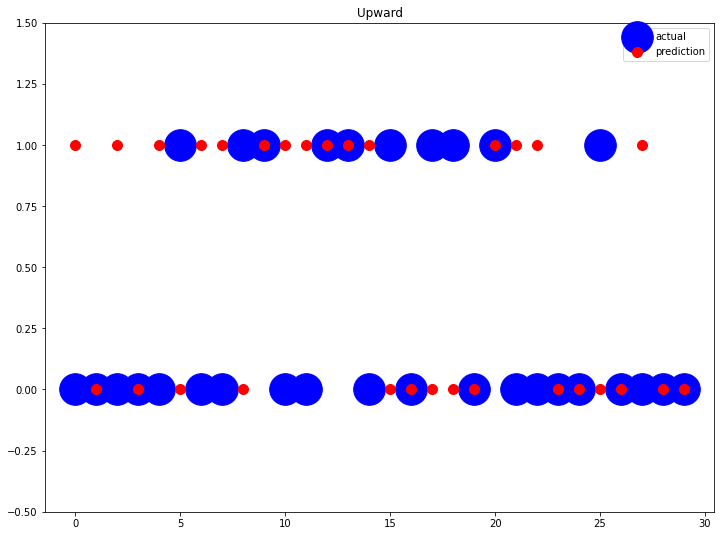

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 40
몇 번 돌림 4


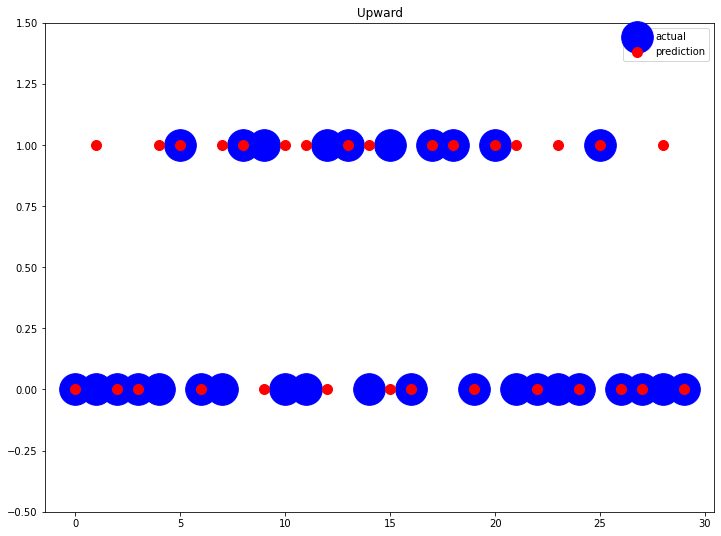

accuracy 0.6
[[11  9]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.79      0.55      0.65        20
          상승       0.44      0.70      0.54        10

    accuracy                           0.60        30
   macro avg       0.61      0.62      0.59        30
weighted avg       0.67      0.60      0.61        30


 40
몇 번 돌림 5


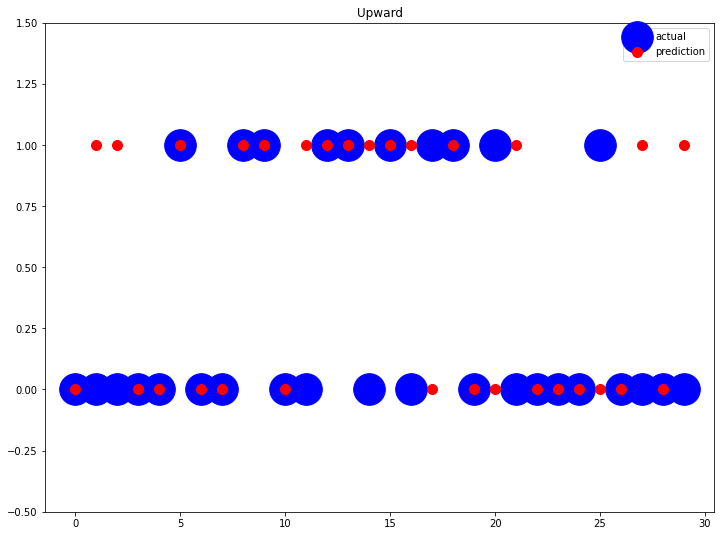

accuracy 0.6333333333333333
[[12  8]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.80      0.60      0.69        20
          상승       0.47      0.70      0.56        10

    accuracy                           0.63        30
   macro avg       0.63      0.65      0.62        30
weighted avg       0.69      0.63      0.64        30


 40
몇 번 돌림 6


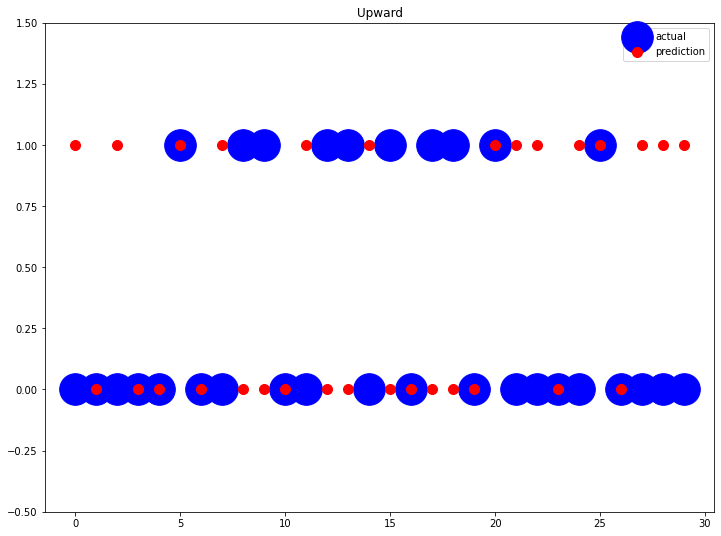

accuracy 0.4
[[ 9 11]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.56      0.45      0.50        20
          상승       0.21      0.30      0.25        10

    accuracy                           0.40        30
   macro avg       0.39      0.38      0.38        30
weighted avg       0.45      0.40      0.42        30


 40
몇 번 돌림 7


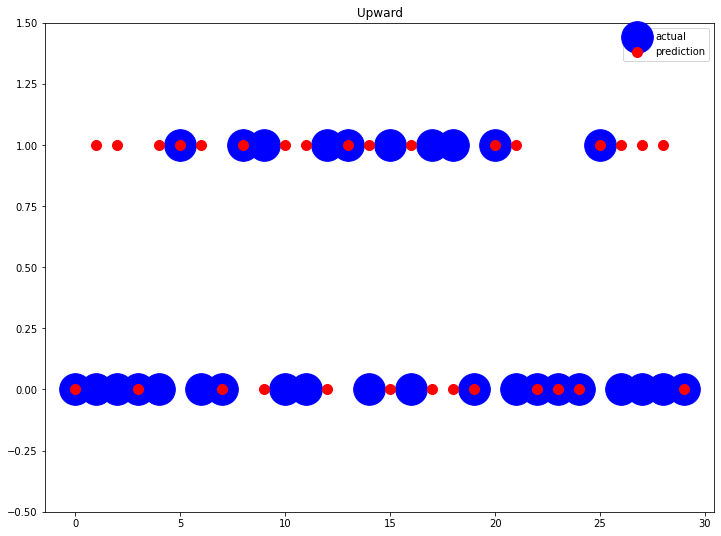

accuracy 0.43333333333333335
[[ 8 12]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.62      0.40      0.48        20
          상승       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30


 40
몇 번 돌림 8


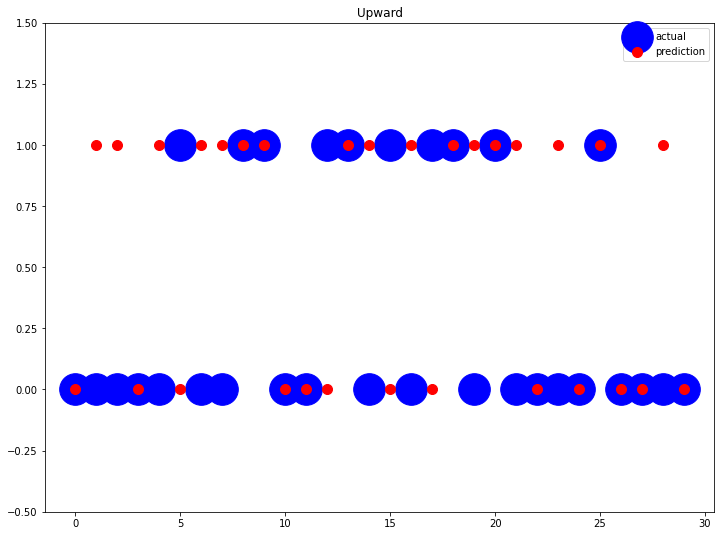

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 40
몇 번 돌림 9


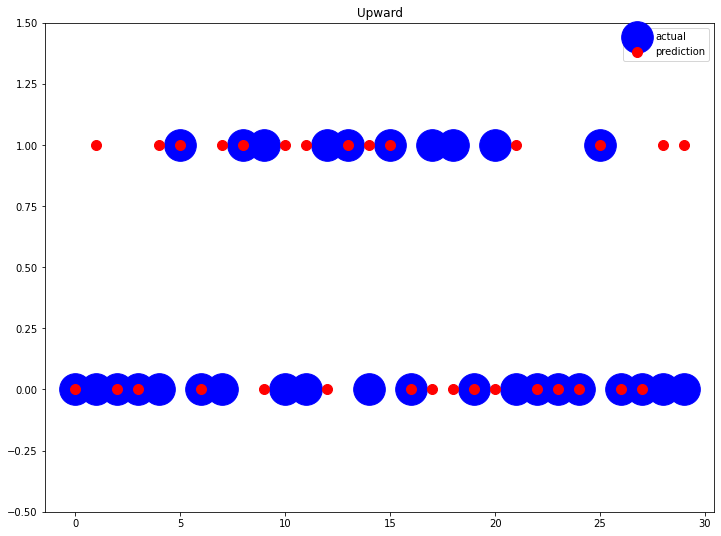

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 40
몇 번 돌림 10


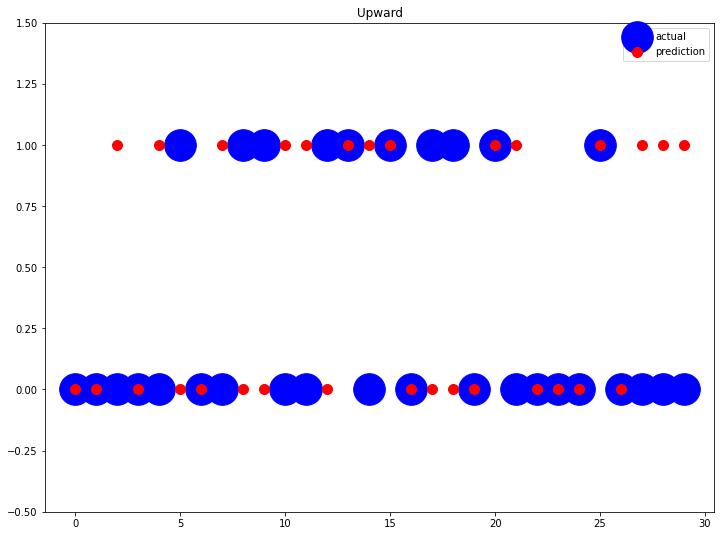

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 40
몇 번 돌림 11


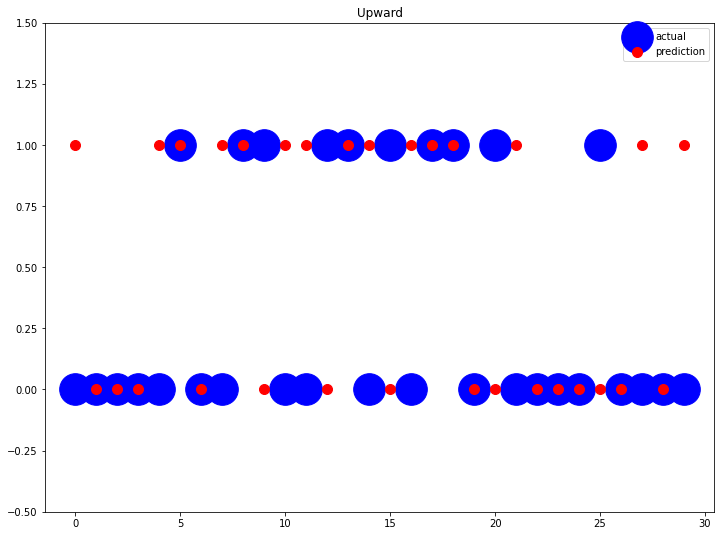

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 40
몇 번 돌림 12


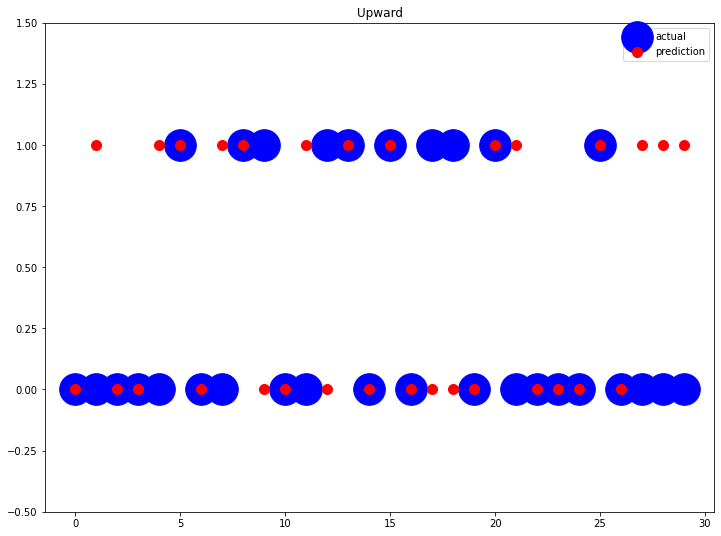

accuracy 0.6
[[12  8]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.75      0.60      0.67        20
          상승       0.43      0.60      0.50        10

    accuracy                           0.60        30
   macro avg       0.59      0.60      0.58        30
weighted avg       0.64      0.60      0.61        30


 40
몇 번 돌림 13


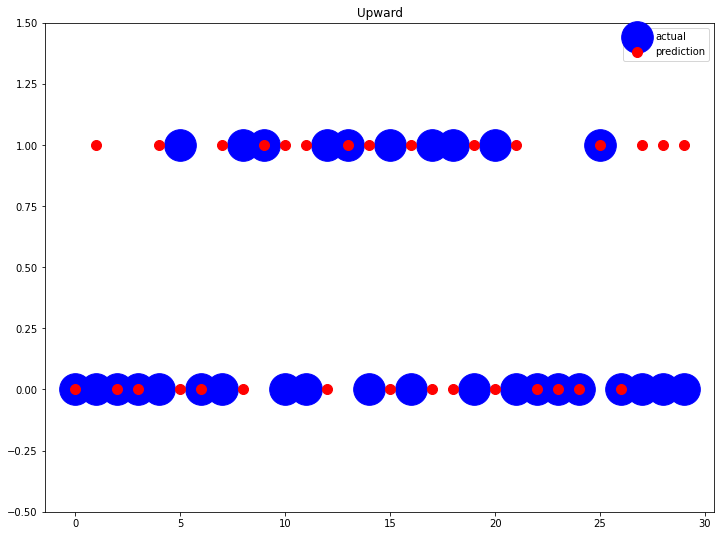

accuracy 0.36666666666666664
[[ 8 12]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.53      0.40      0.46        20
          상승       0.20      0.30      0.24        10

    accuracy                           0.37        30
   macro avg       0.37      0.35      0.35        30
weighted avg       0.42      0.37      0.38        30


 40
몇 번 돌림 14


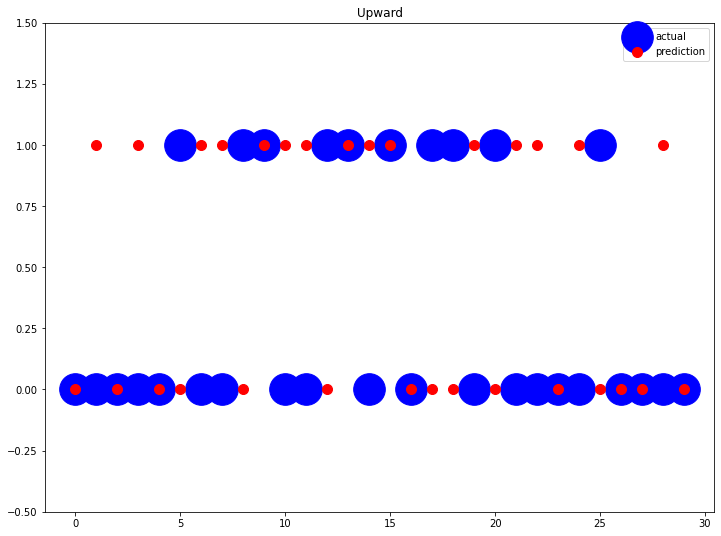

accuracy 0.36666666666666664
[[ 8 12]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.53      0.40      0.46        20
          상승       0.20      0.30      0.24        10

    accuracy                           0.37        30
   macro avg       0.37      0.35      0.35        30
weighted avg       0.42      0.37      0.38        30


 40
몇 번 돌림 15


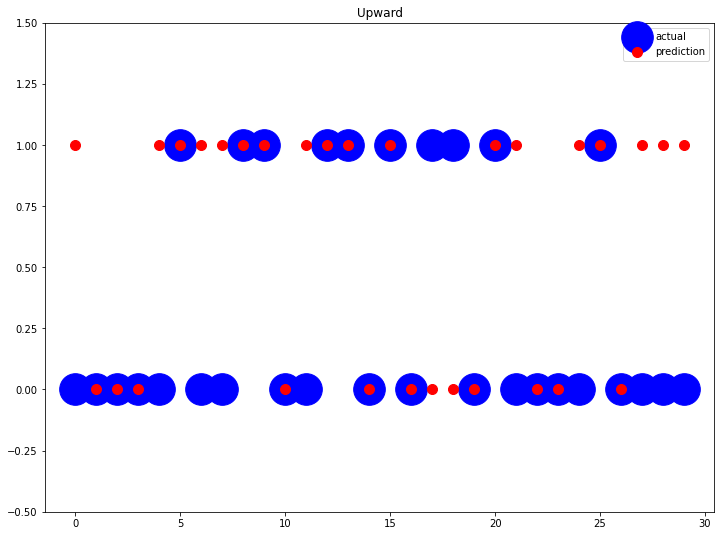

accuracy 0.6
[[10 10]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.83      0.50      0.62        20
          상승       0.44      0.80      0.57        10

    accuracy                           0.60        30
   macro avg       0.64      0.65      0.60        30
weighted avg       0.70      0.60      0.61        30


 40
몇 번 돌림 16


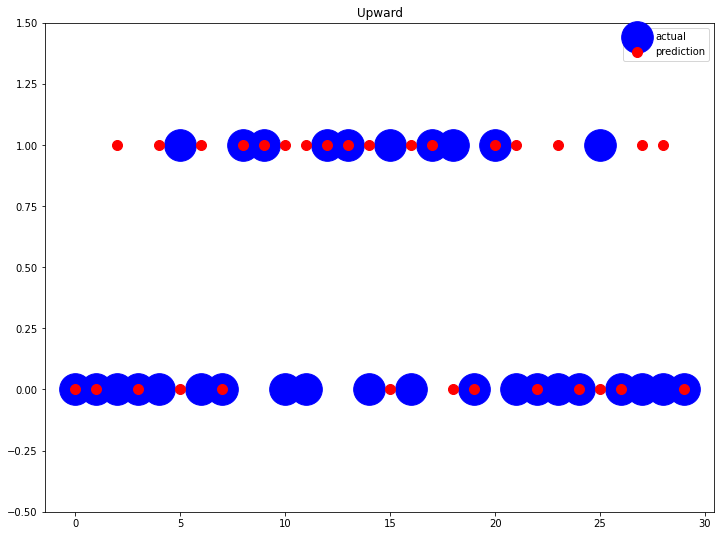

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 40
몇 번 돌림 17


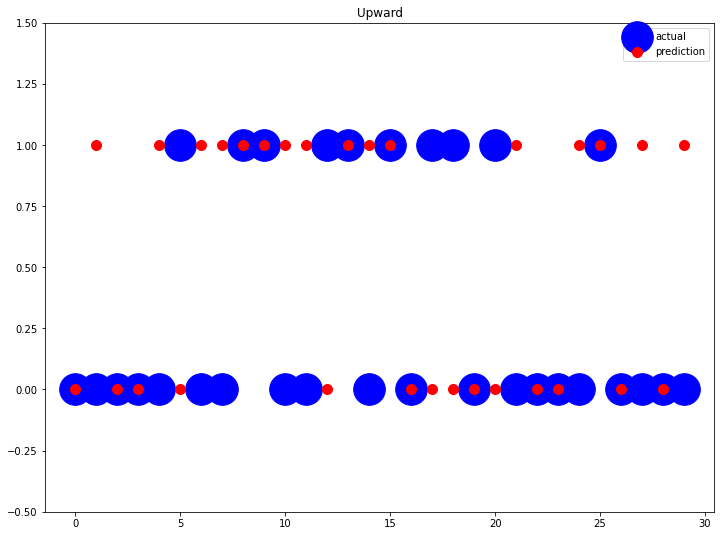

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 40
몇 번 돌림 18


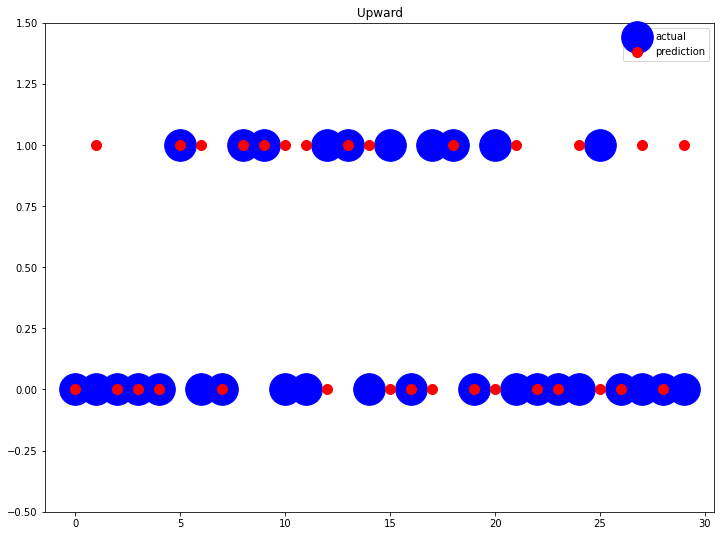

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 40
몇 번 돌림 19


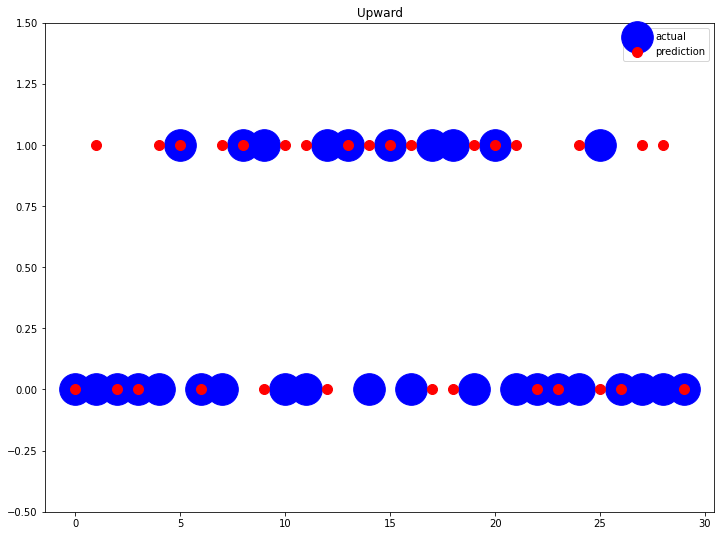

accuracy 0.43333333333333335
[[ 8 12]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.62      0.40      0.48        20
          상승       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30


 40
몇 번 돌림 20


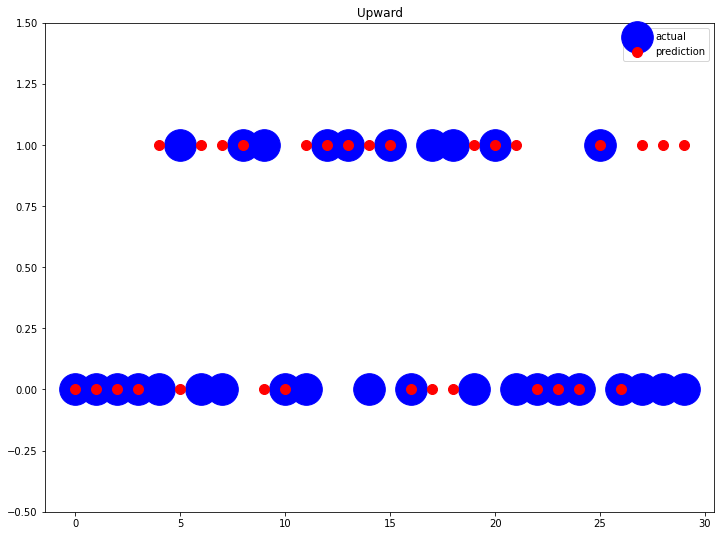

accuracy 0.5333333333333333
[[10 10]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.71      0.50      0.59        20
          상승       0.38      0.60      0.46        10

    accuracy                           0.53        30
   macro avg       0.54      0.55      0.52        30
weighted avg       0.60      0.53      0.55        30


 40
몇 번 돌림 21


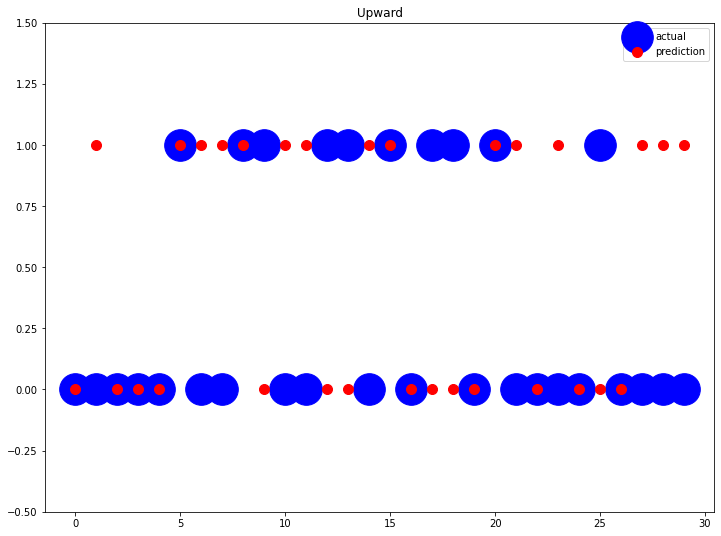

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 40
몇 번 돌림 22


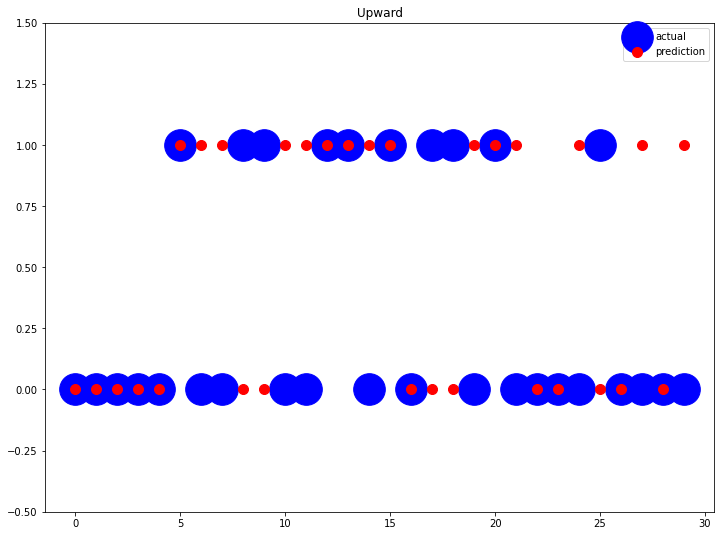

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 40
몇 번 돌림 23


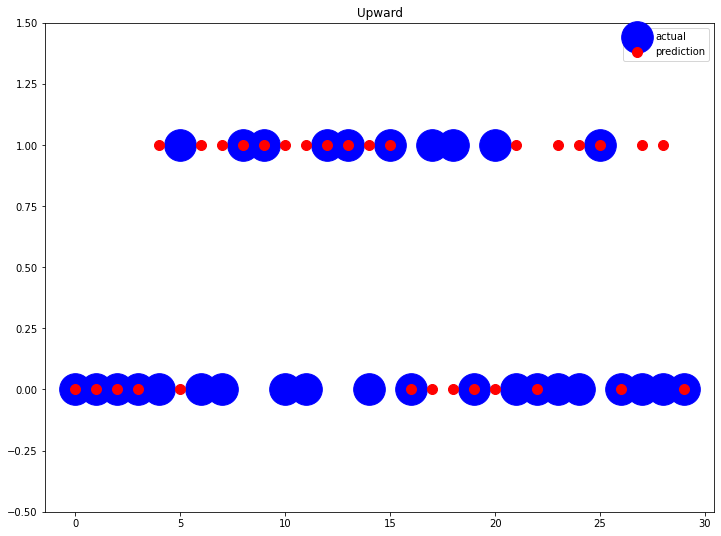

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 40
몇 번 돌림 24


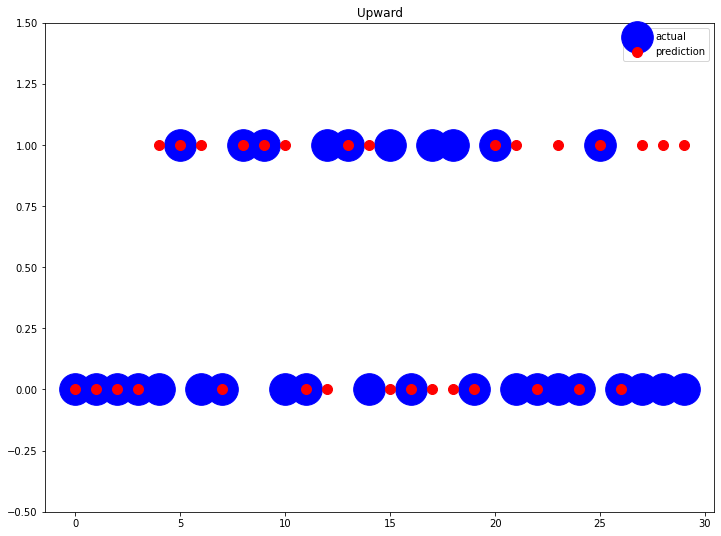

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 40
몇 번 돌림 25


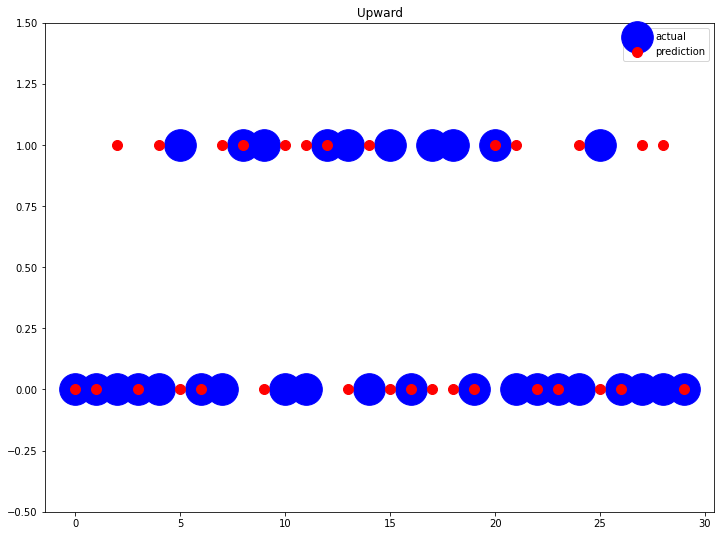

accuracy 0.43333333333333335
[[10 10]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.59      0.50      0.54        20
          상승       0.23      0.30      0.26        10

    accuracy                           0.43        30
   macro avg       0.41      0.40      0.40        30
weighted avg       0.47      0.43      0.45        30


 40
몇 번 돌림 26


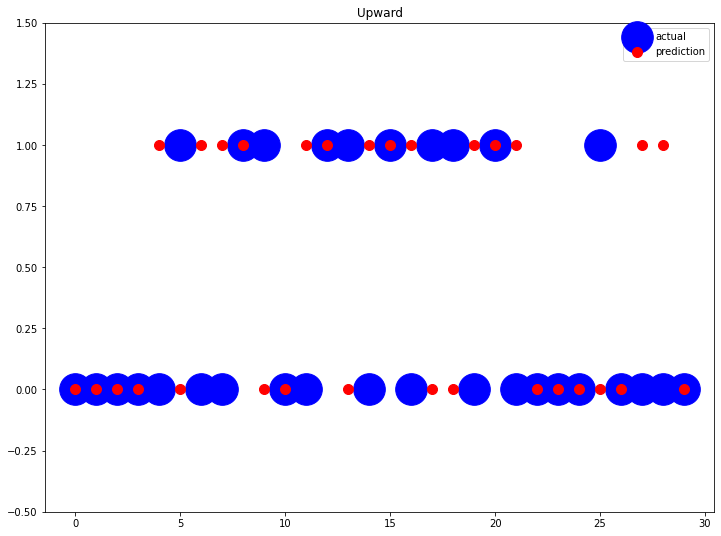

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 40
몇 번 돌림 27


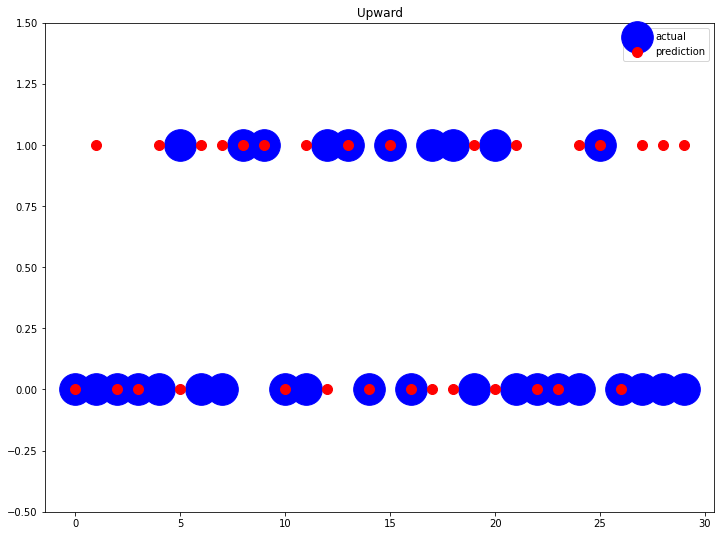

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 40
몇 번 돌림 28


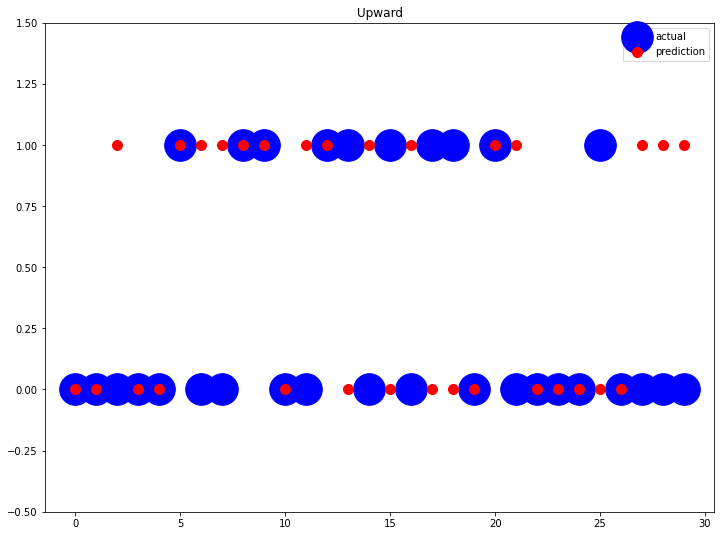

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 40
몇 번 돌림 29


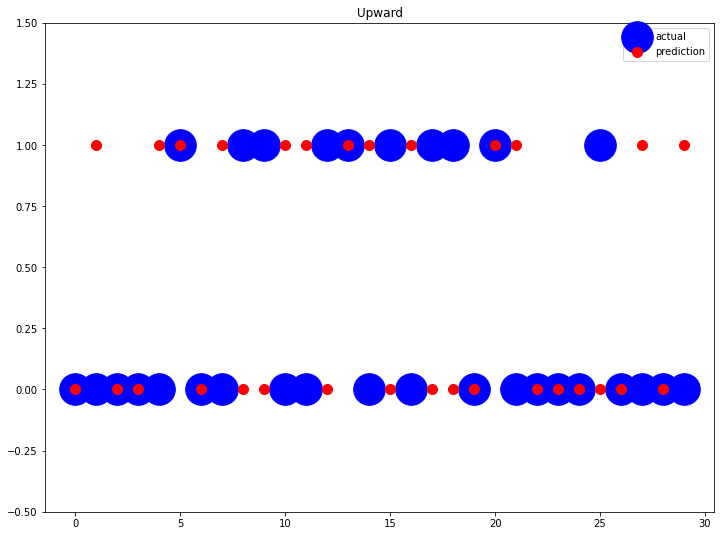

accuracy 0.43333333333333335
[[10 10]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.59      0.50      0.54        20
          상승       0.23      0.30      0.26        10

    accuracy                           0.43        30
   macro avg       0.41      0.40      0.40        30
weighted avg       0.47      0.43      0.45        30


 40
몇 번 돌림 30


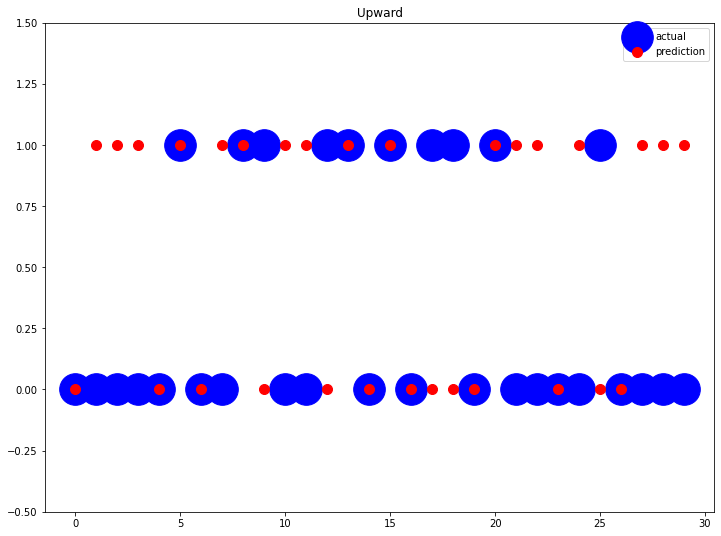

accuracy 0.43333333333333335
[[ 8 12]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.62      0.40      0.48        20
          상승       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30


 40
몇 번 돌림 31


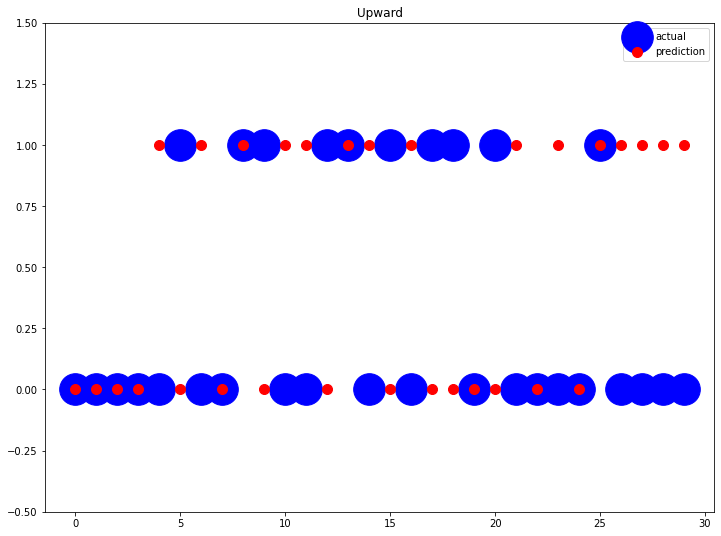

accuracy 0.36666666666666664
[[ 8 12]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.53      0.40      0.46        20
          상승       0.20      0.30      0.24        10

    accuracy                           0.37        30
   macro avg       0.37      0.35      0.35        30
weighted avg       0.42      0.37      0.38        30


 40
몇 번 돌림 32


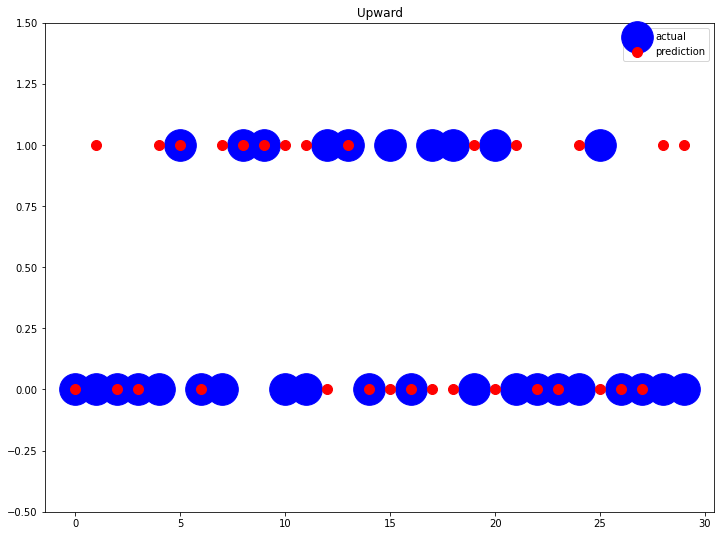

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 40
몇 번 돌림 33


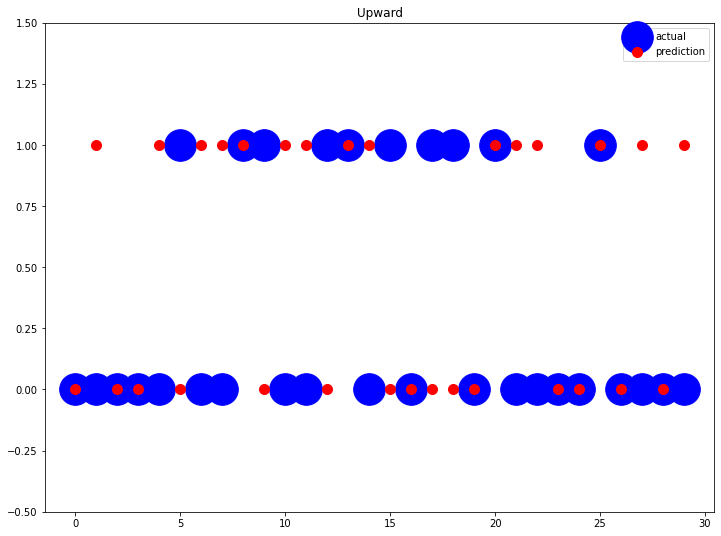

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 40
몇 번 돌림 34


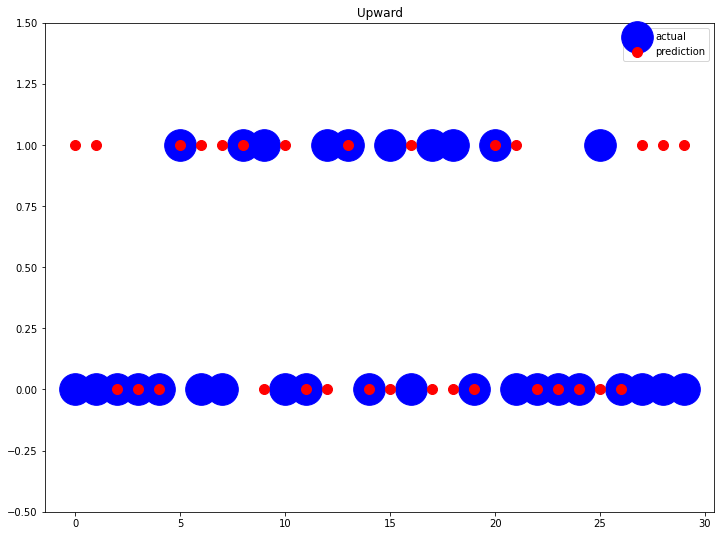

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 40
몇 번 돌림 35


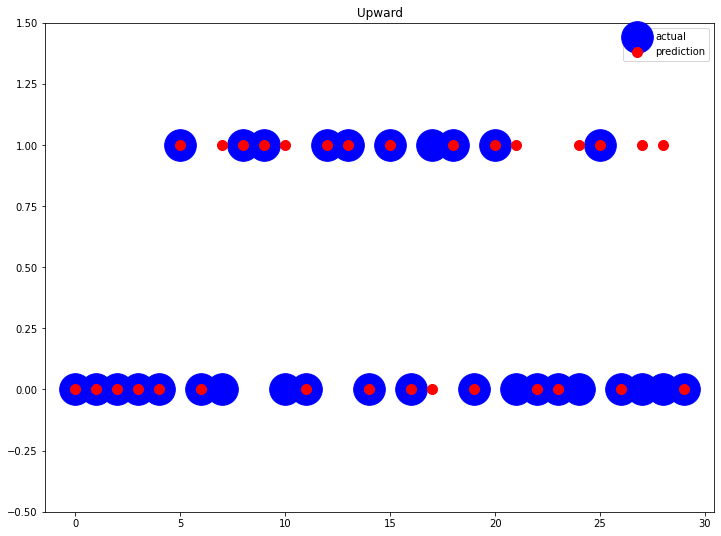

accuracy 0.7666666666666667
[[14  6]
 [ 1  9]]
              precision    recall  f1-score   support

          하락       0.93      0.70      0.80        20
          상승       0.60      0.90      0.72        10

    accuracy                           0.77        30
   macro avg       0.77      0.80      0.76        30
weighted avg       0.82      0.77      0.77        30


 40
몇 번 돌림 36


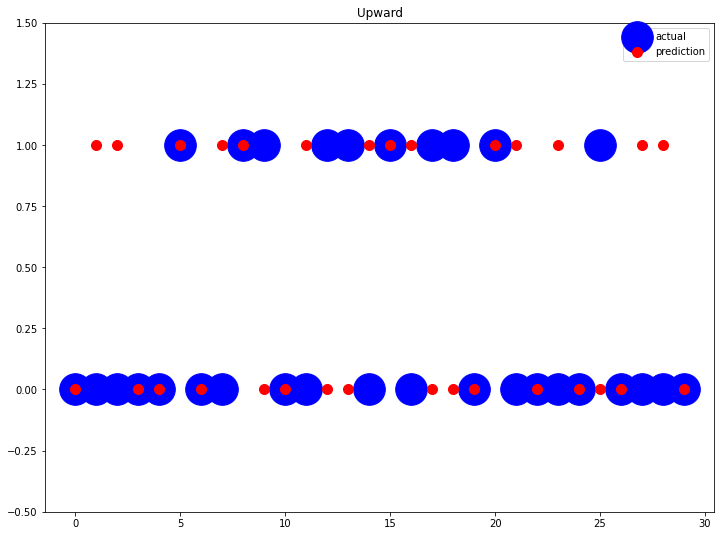

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 40
몇 번 돌림 37


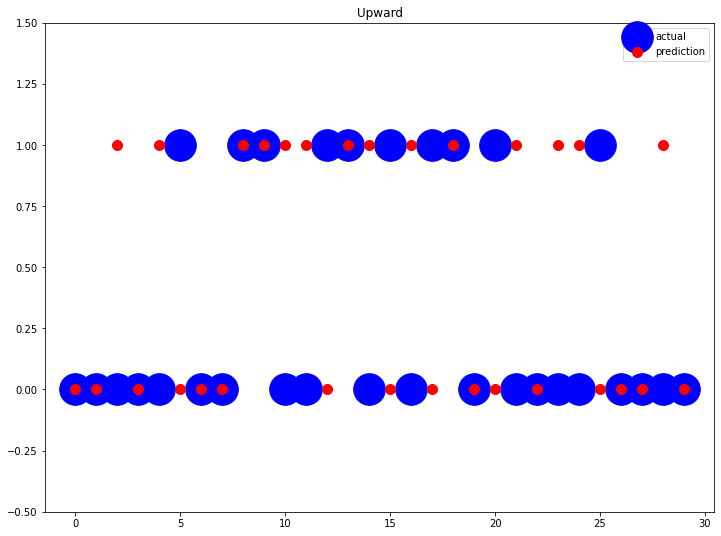

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 40
몇 번 돌림 38


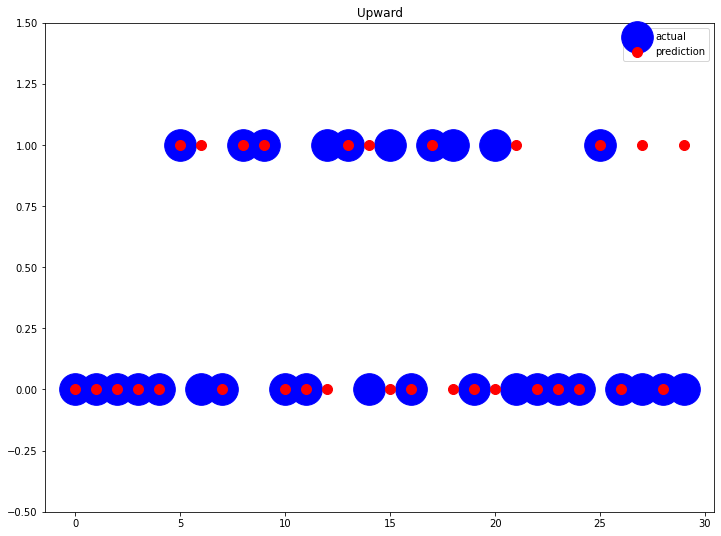

accuracy 0.7
[[15  5]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.79      0.75      0.77        20
          상승       0.55      0.60      0.57        10

    accuracy                           0.70        30
   macro avg       0.67      0.68      0.67        30
weighted avg       0.71      0.70      0.70        30


 40
몇 번 돌림 39


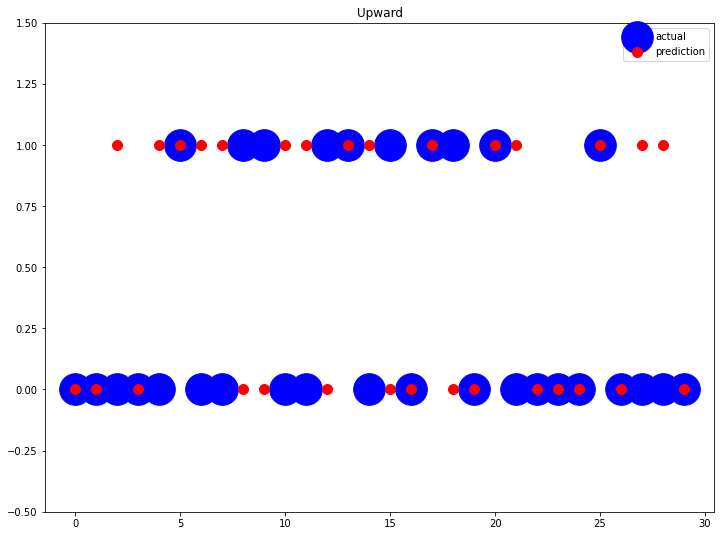

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 40
몇 번 돌림 40


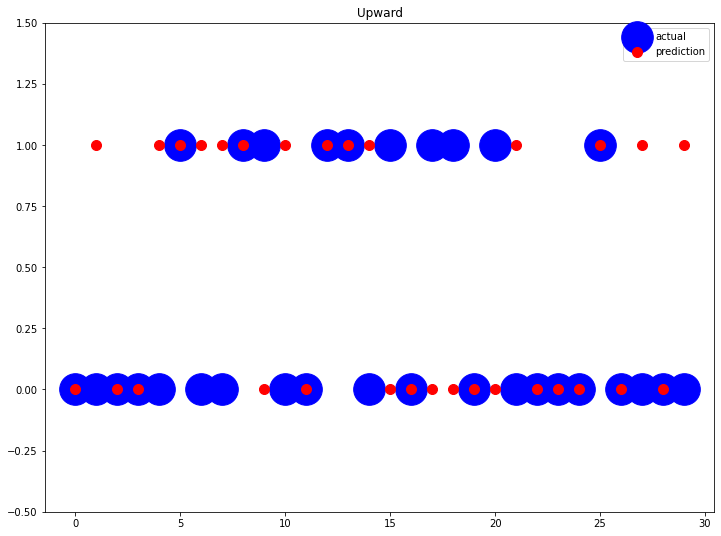

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 40
몇 번 돌림 41


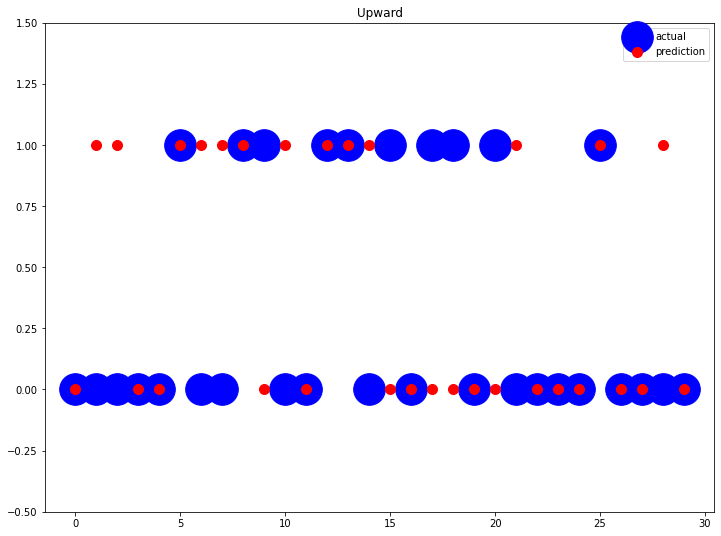

accuracy 0.5666666666666667
[[12  8]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.71      0.60      0.65        20
          상승       0.38      0.50      0.43        10

    accuracy                           0.57        30
   macro avg       0.55      0.55      0.54        30
weighted avg       0.60      0.57      0.58        30


 40
몇 번 돌림 42


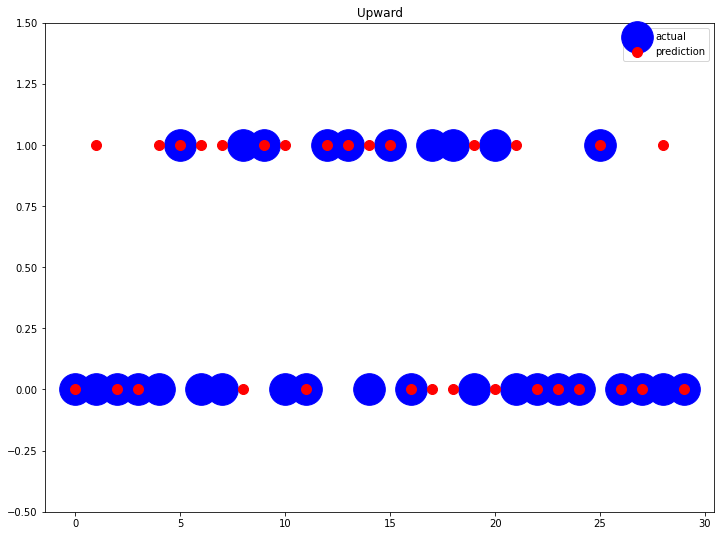

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 40
몇 번 돌림 43


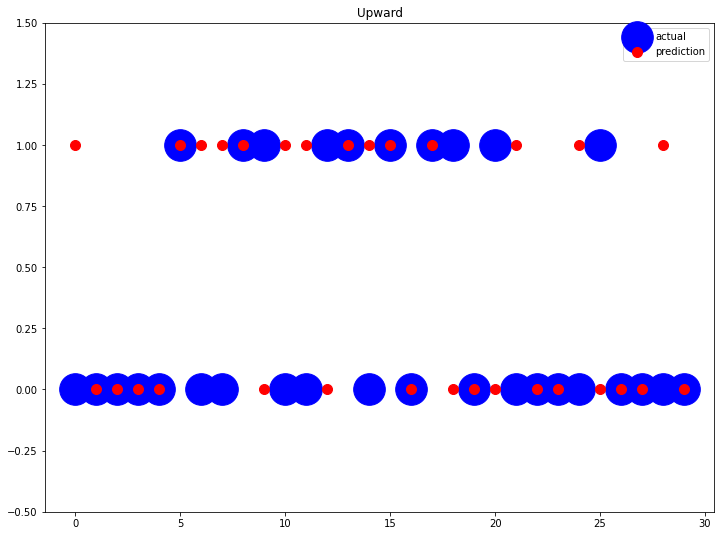

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 40
몇 번 돌림 44


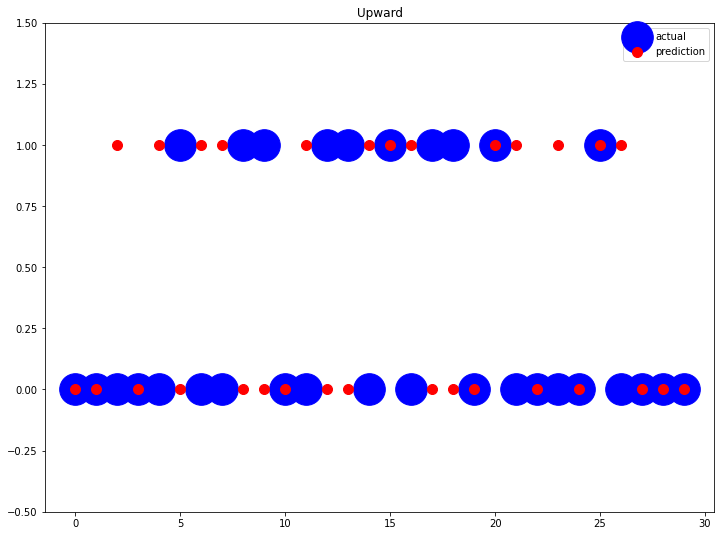

accuracy 0.43333333333333335
[[10 10]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.59      0.50      0.54        20
          상승       0.23      0.30      0.26        10

    accuracy                           0.43        30
   macro avg       0.41      0.40      0.40        30
weighted avg       0.47      0.43      0.45        30


 40
몇 번 돌림 45


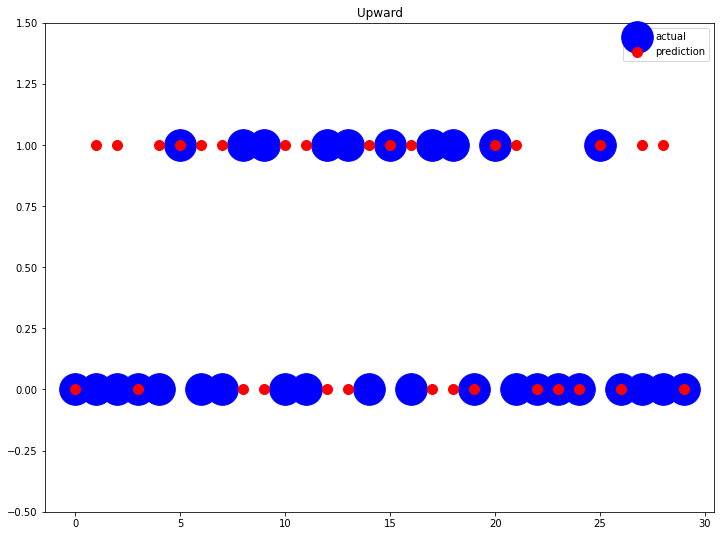

accuracy 0.4
[[ 8 12]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.57      0.40      0.47        20
          상승       0.25      0.40      0.31        10

    accuracy                           0.40        30
   macro avg       0.41      0.40      0.39        30
weighted avg       0.46      0.40      0.42        30


 40
몇 번 돌림 46


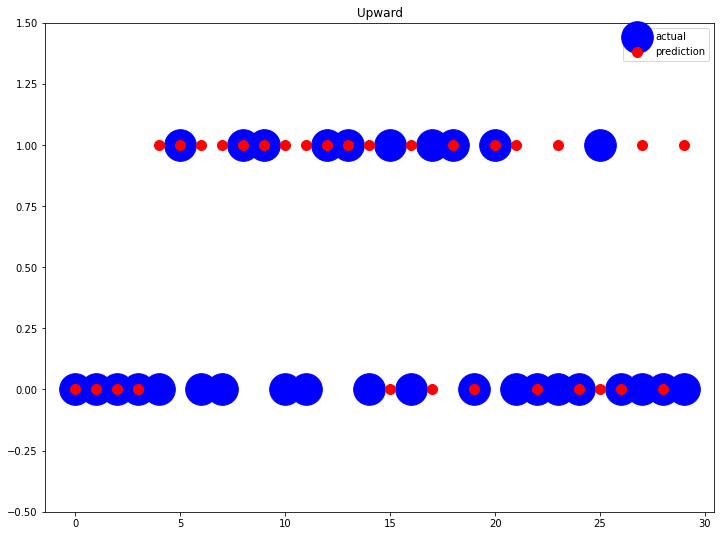

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 40
몇 번 돌림 47


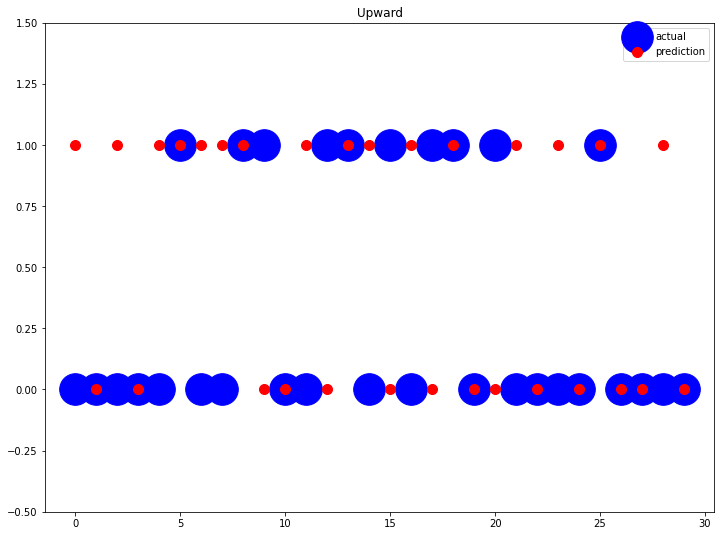

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 40
몇 번 돌림 48


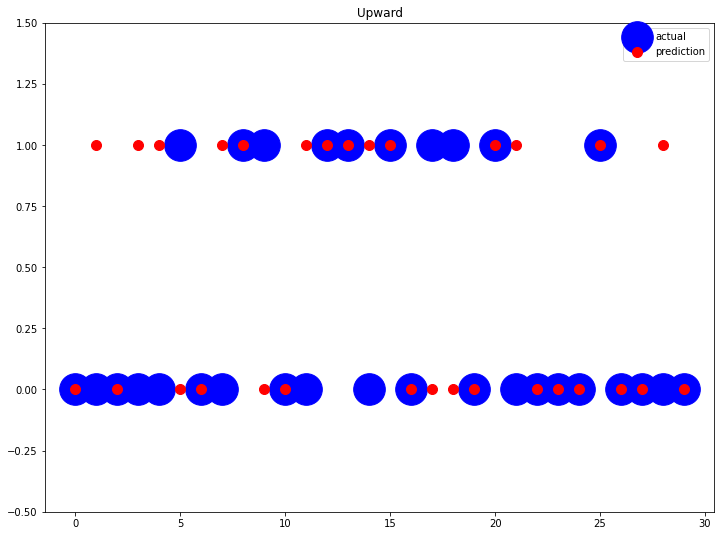

accuracy 0.6
[[12  8]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.75      0.60      0.67        20
          상승       0.43      0.60      0.50        10

    accuracy                           0.60        30
   macro avg       0.59      0.60      0.58        30
weighted avg       0.64      0.60      0.61        30


 40
몇 번 돌림 49


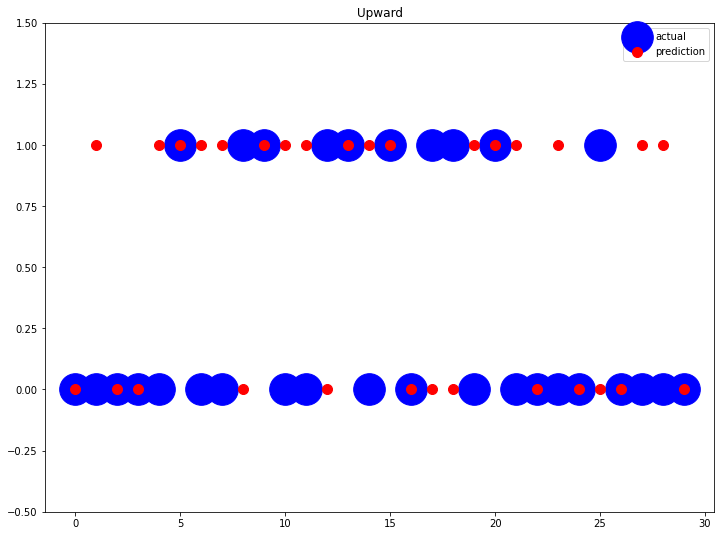

accuracy 0.43333333333333335
[[ 8 12]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.62      0.40      0.48        20
          상승       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30


 41
몇 번 돌림 0


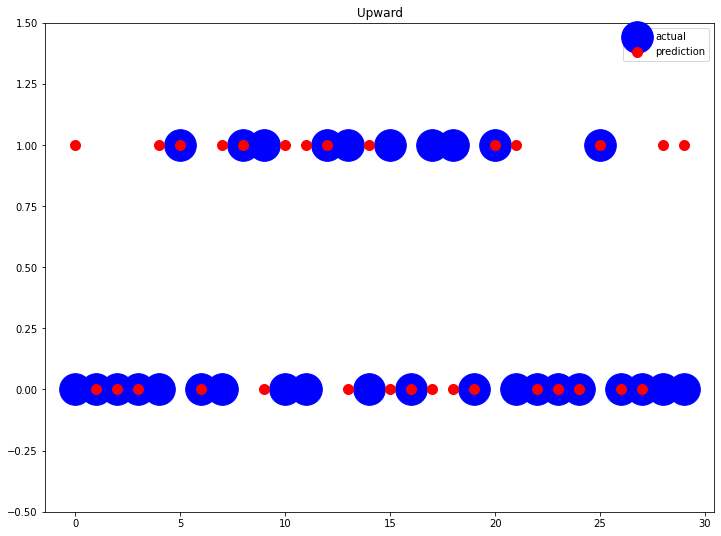

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 41
몇 번 돌림 1


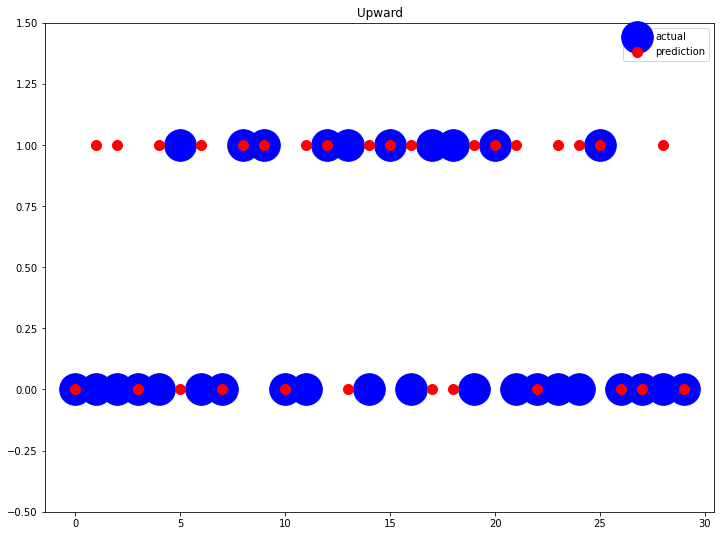

accuracy 0.4666666666666667
[[ 8 12]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.67      0.40      0.50        20
          상승       0.33      0.60      0.43        10

    accuracy                           0.47        30
   macro avg       0.50      0.50      0.46        30
weighted avg       0.56      0.47      0.48        30


 41
몇 번 돌림 2


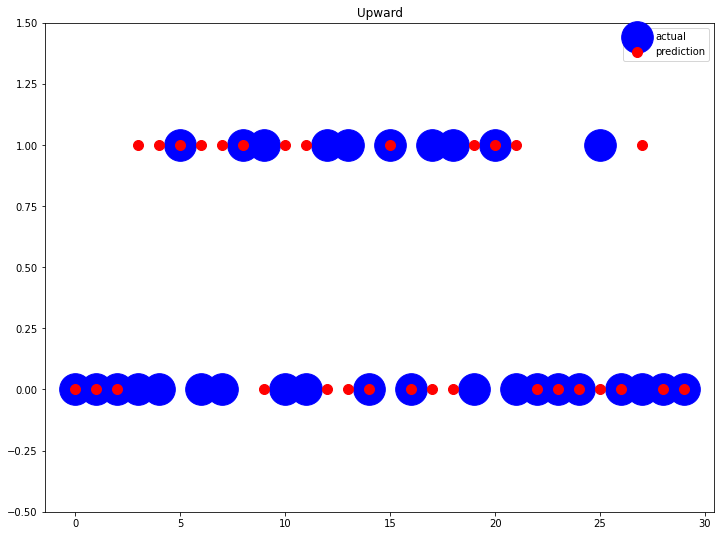

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 41
몇 번 돌림 3


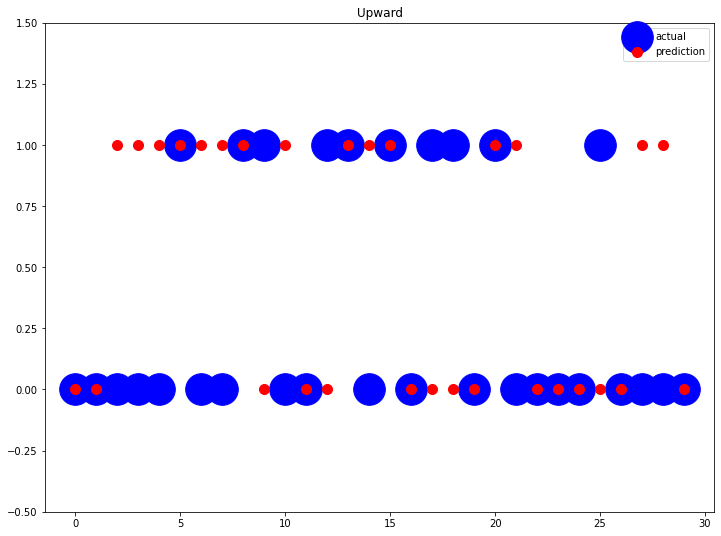

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 41
몇 번 돌림 4


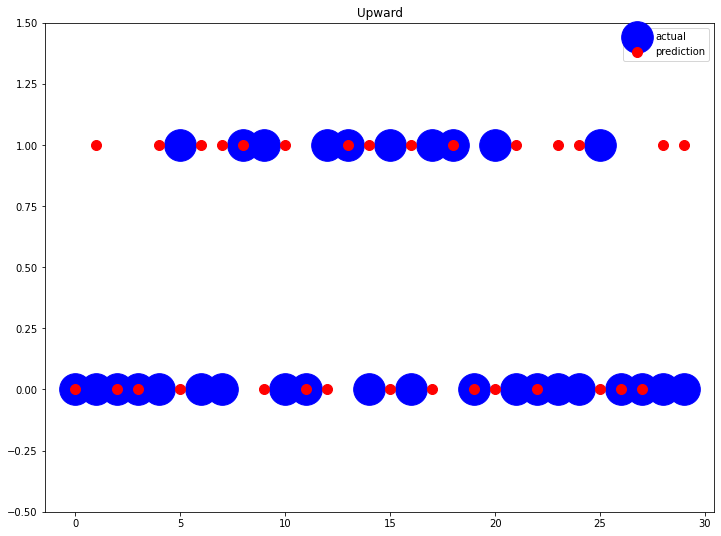

accuracy 0.36666666666666664
[[ 8 12]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.53      0.40      0.46        20
          상승       0.20      0.30      0.24        10

    accuracy                           0.37        30
   macro avg       0.37      0.35      0.35        30
weighted avg       0.42      0.37      0.38        30


 41
몇 번 돌림 5


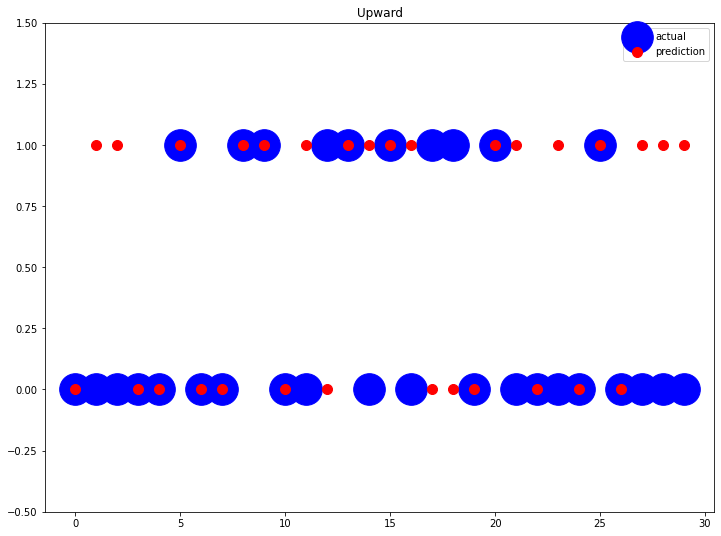

accuracy 0.5666666666666667
[[10 10]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.77      0.50      0.61        20
          상승       0.41      0.70      0.52        10

    accuracy                           0.57        30
   macro avg       0.59      0.60      0.56        30
weighted avg       0.65      0.57      0.58        30


 41
몇 번 돌림 6


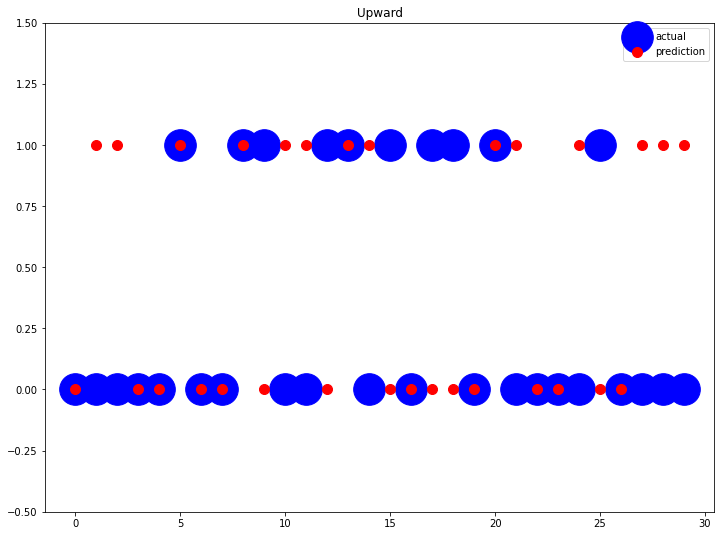

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 41
몇 번 돌림 7


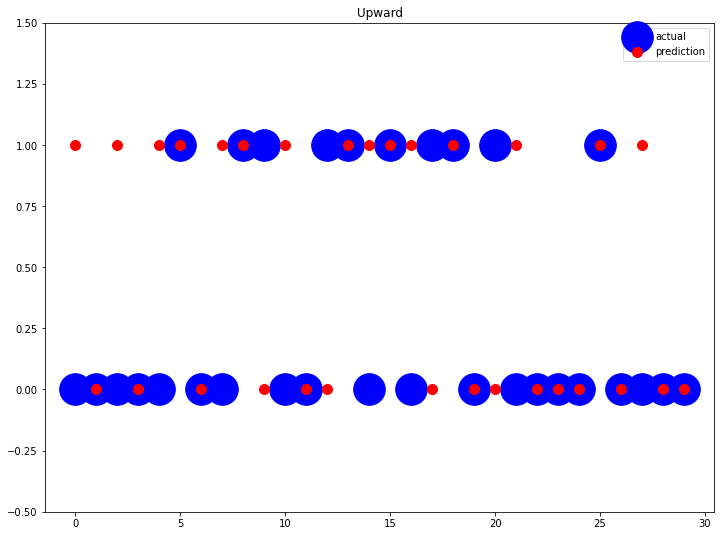

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 41
몇 번 돌림 8


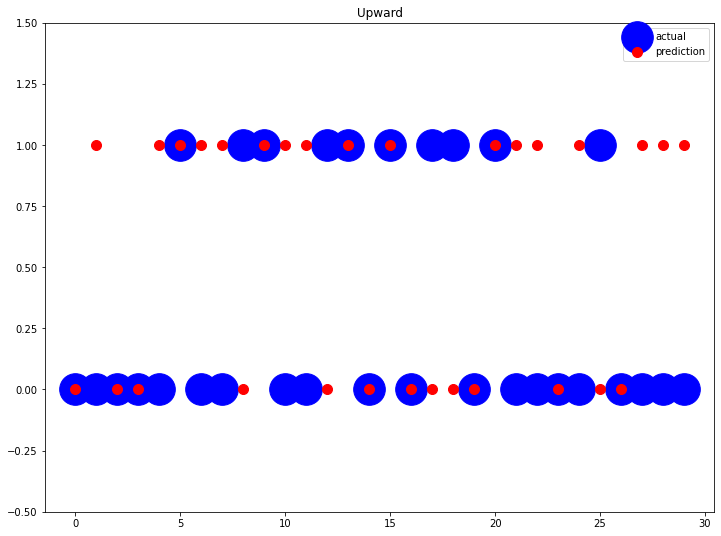

accuracy 0.43333333333333335
[[ 8 12]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.62      0.40      0.48        20
          상승       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30


 41
몇 번 돌림 9


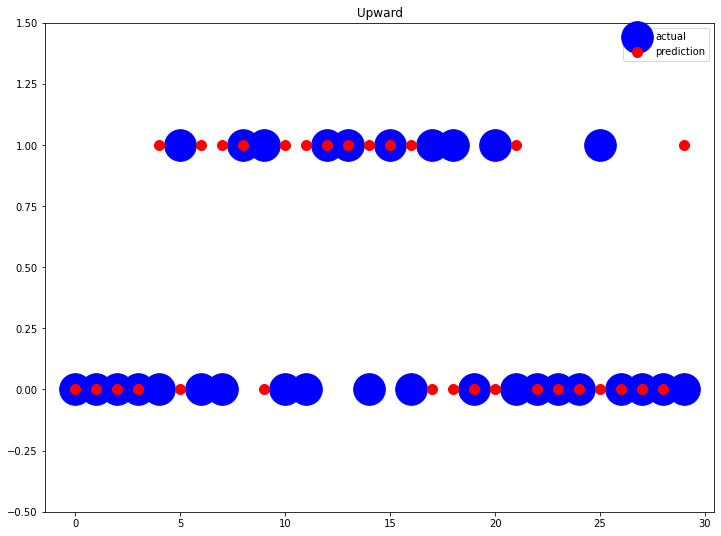

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 41
몇 번 돌림 10


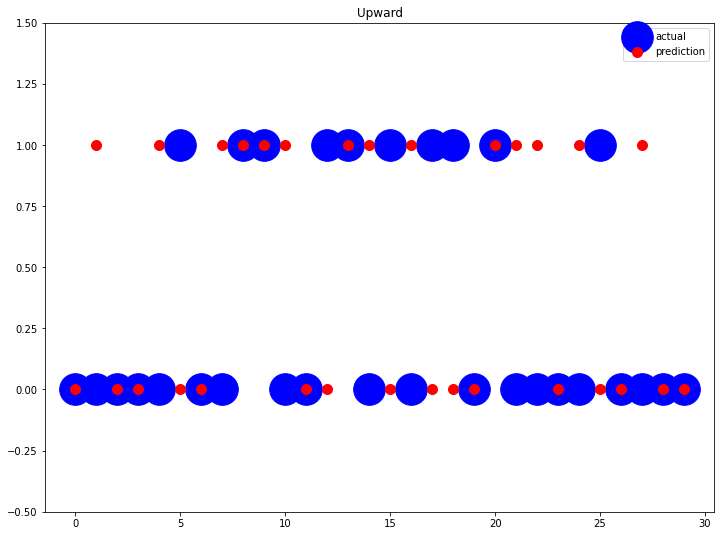

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 41
몇 번 돌림 11


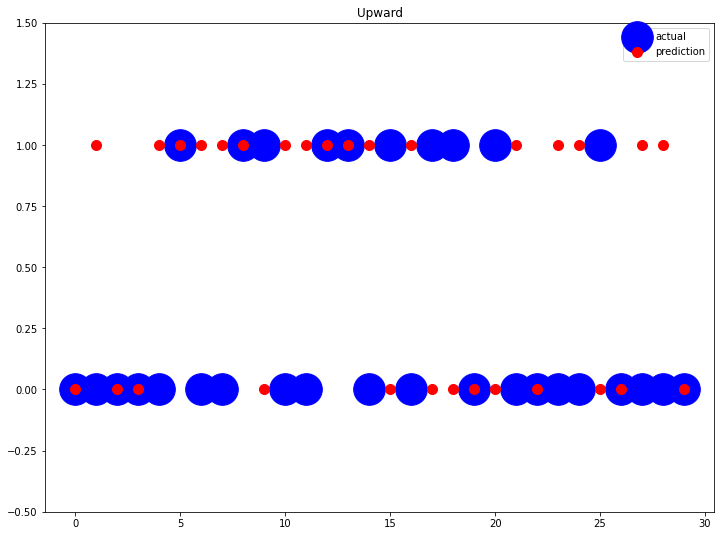

accuracy 0.36666666666666664
[[ 7 13]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.54      0.35      0.42        20
          상승       0.24      0.40      0.30        10

    accuracy                           0.37        30
   macro avg       0.39      0.38      0.36        30
weighted avg       0.44      0.37      0.38        30


 41
몇 번 돌림 12


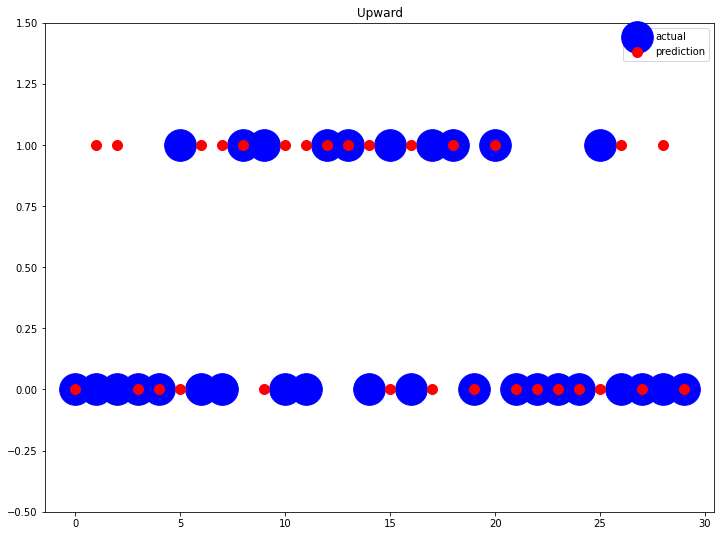

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 41
몇 번 돌림 13


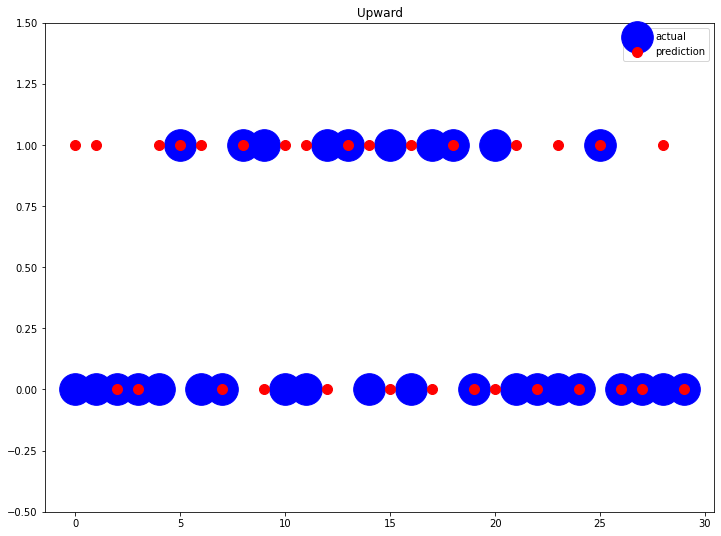

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 41
몇 번 돌림 14


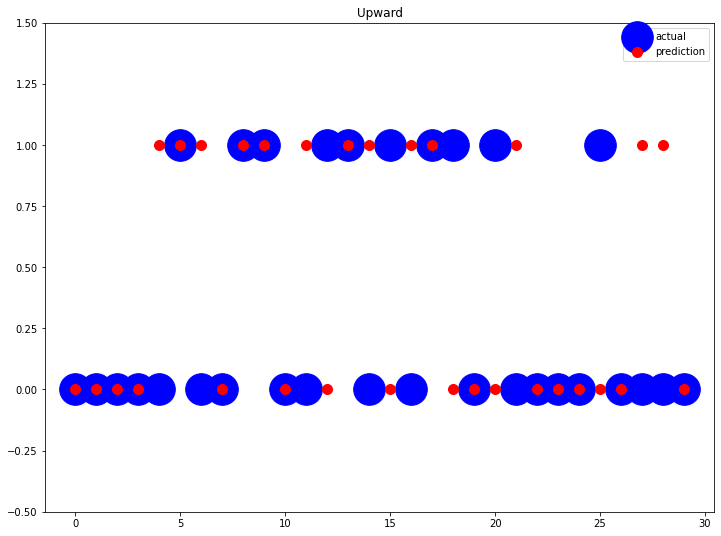

accuracy 0.5666666666666667
[[12  8]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.71      0.60      0.65        20
          상승       0.38      0.50      0.43        10

    accuracy                           0.57        30
   macro avg       0.55      0.55      0.54        30
weighted avg       0.60      0.57      0.58        30


 41
몇 번 돌림 15


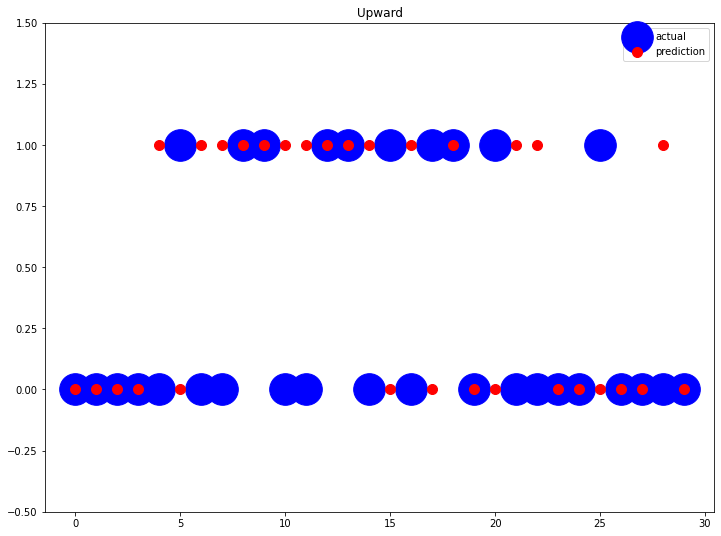

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 41
몇 번 돌림 16


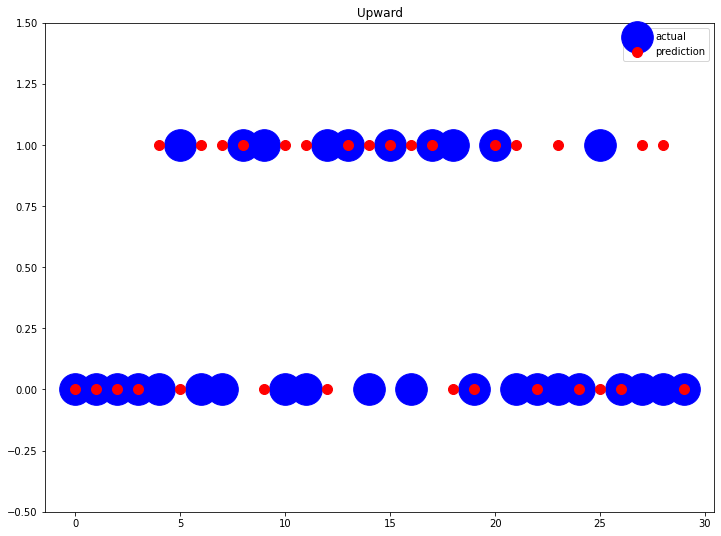

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 41
몇 번 돌림 17


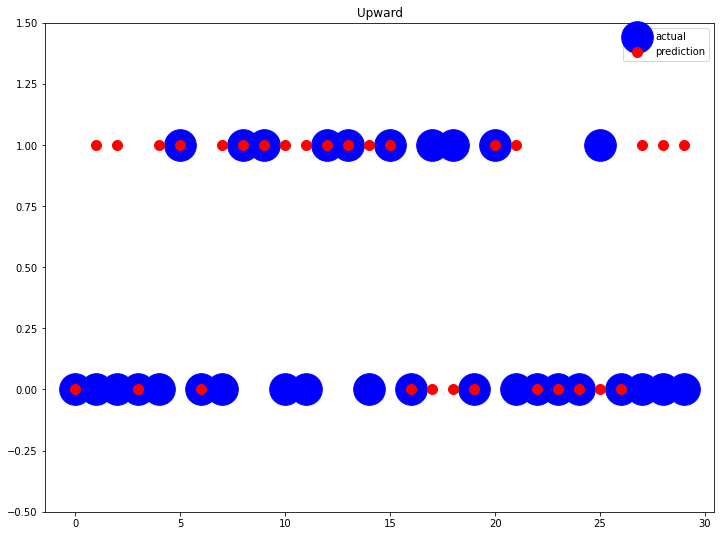

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 41
몇 번 돌림 18


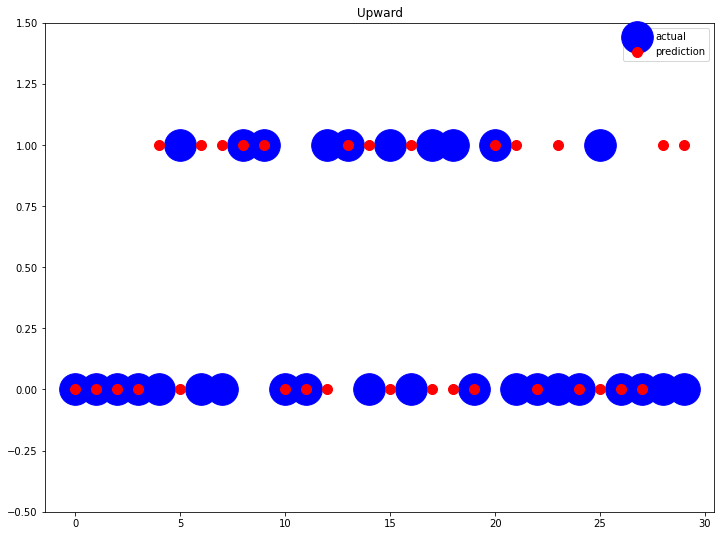

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 41
몇 번 돌림 19


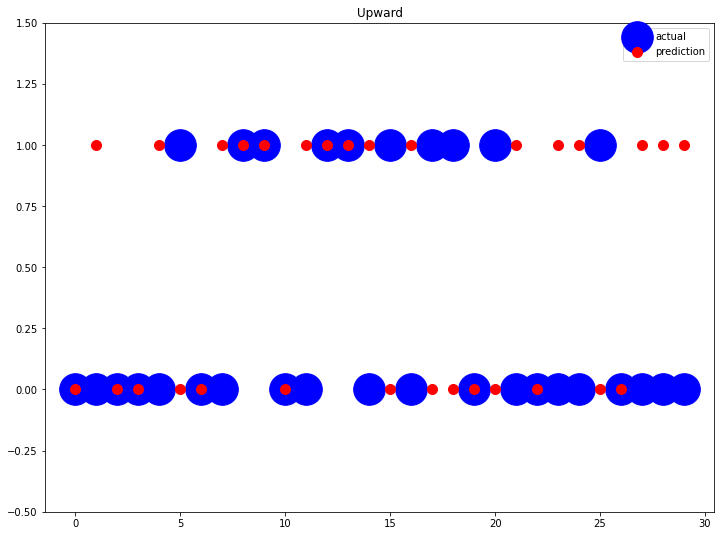

accuracy 0.4
[[ 8 12]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.57      0.40      0.47        20
          상승       0.25      0.40      0.31        10

    accuracy                           0.40        30
   macro avg       0.41      0.40      0.39        30
weighted avg       0.46      0.40      0.42        30


 41
몇 번 돌림 20


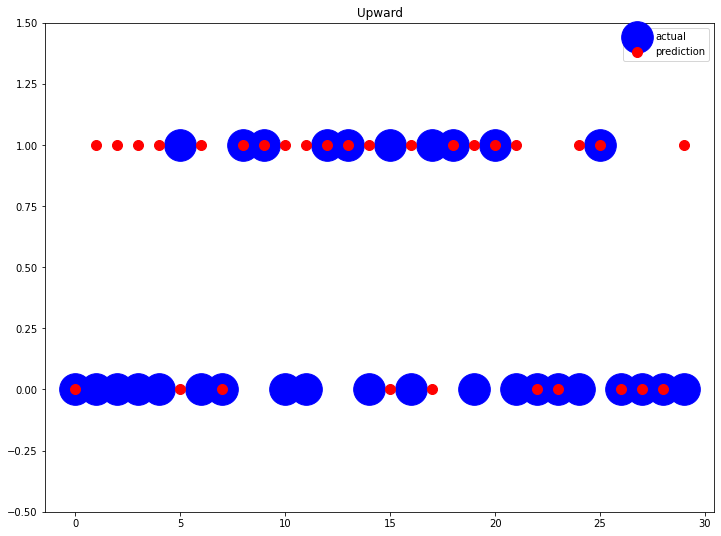

accuracy 0.4666666666666667
[[ 7 13]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.70      0.35      0.47        20
          상승       0.35      0.70      0.47        10

    accuracy                           0.47        30
   macro avg       0.52      0.52      0.47        30
weighted avg       0.58      0.47      0.47        30


 41
몇 번 돌림 21


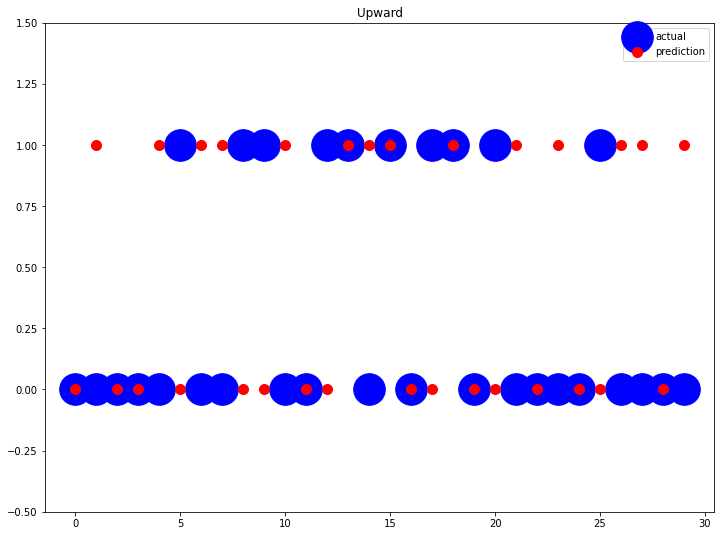

accuracy 0.4
[[ 9 11]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.56      0.45      0.50        20
          상승       0.21      0.30      0.25        10

    accuracy                           0.40        30
   macro avg       0.39      0.38      0.38        30
weighted avg       0.45      0.40      0.42        30


 41
몇 번 돌림 22


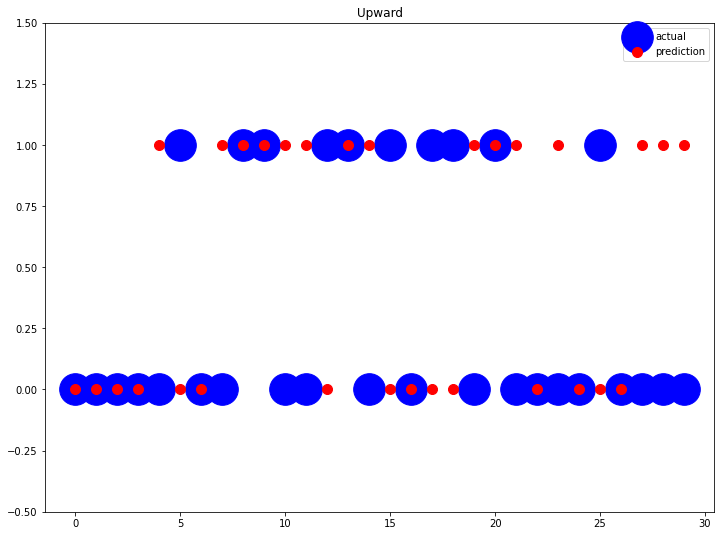

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 41
몇 번 돌림 23


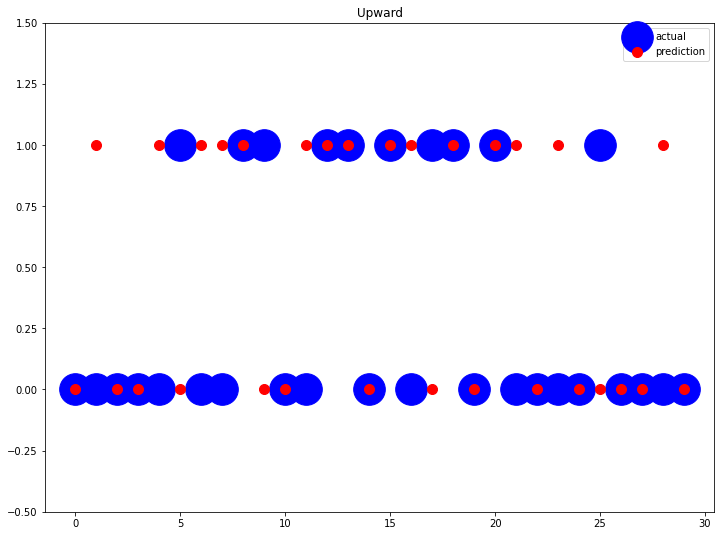

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 41
몇 번 돌림 24


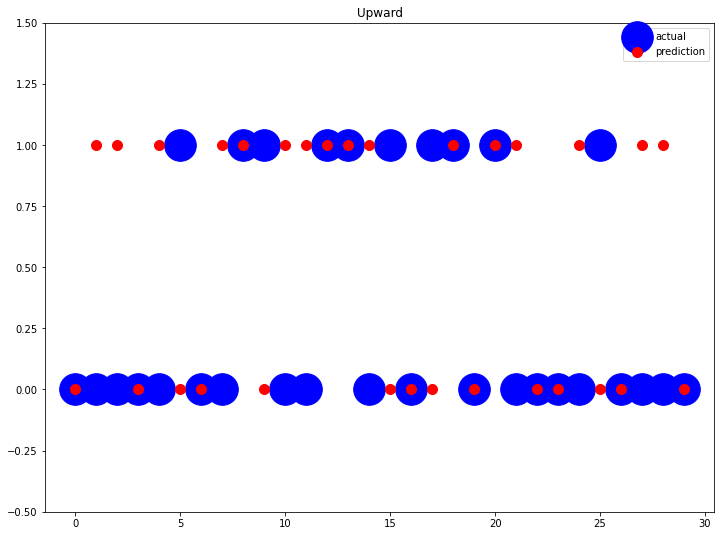

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 41
몇 번 돌림 25


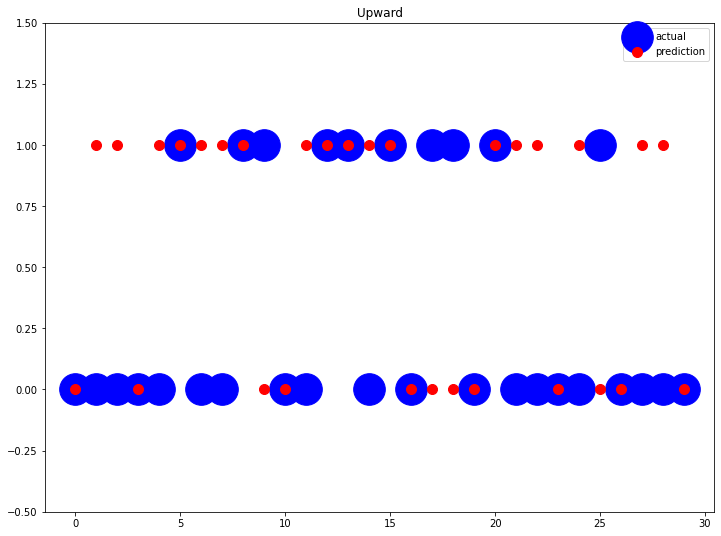

accuracy 0.4666666666666667
[[ 8 12]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.67      0.40      0.50        20
          상승       0.33      0.60      0.43        10

    accuracy                           0.47        30
   macro avg       0.50      0.50      0.46        30
weighted avg       0.56      0.47      0.48        30


 41
몇 번 돌림 26


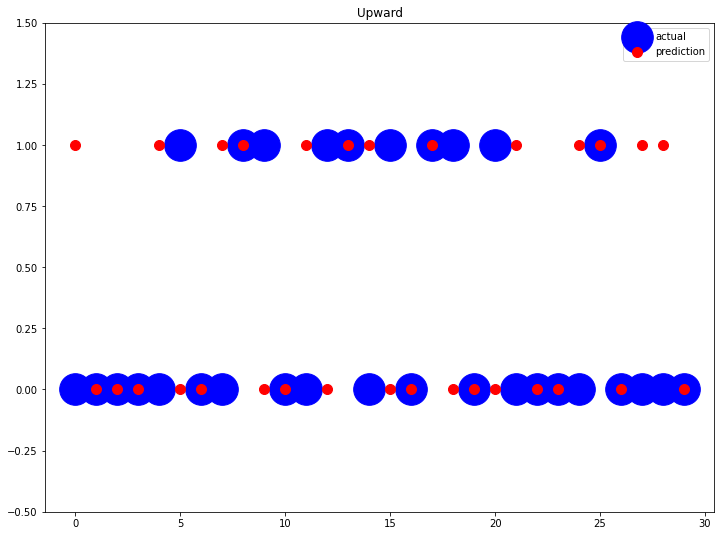

accuracy 0.5
[[11  9]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.65      0.55      0.59        20
          상승       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30


 41
몇 번 돌림 27


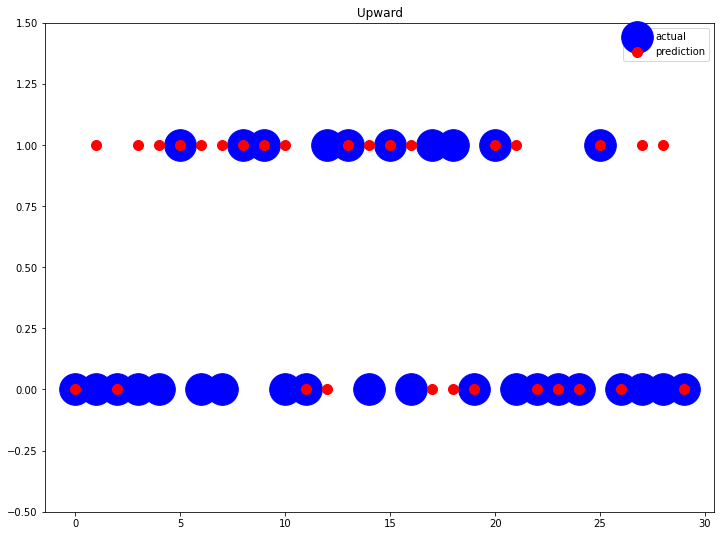

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 41
몇 번 돌림 28


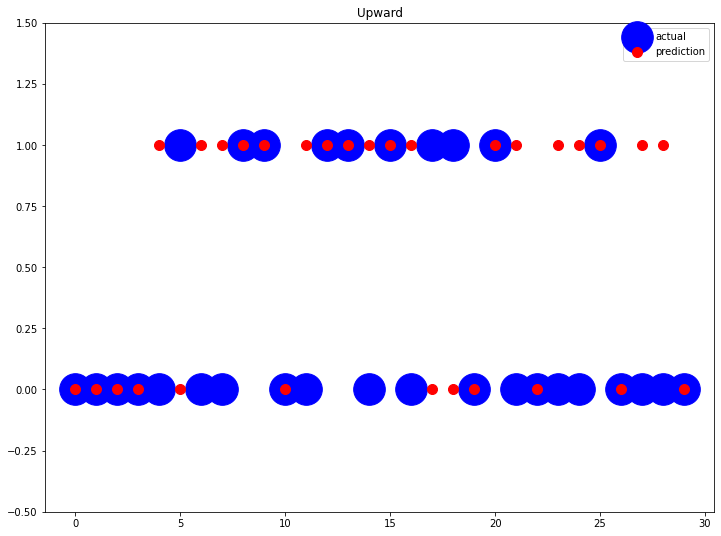

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 41
몇 번 돌림 29


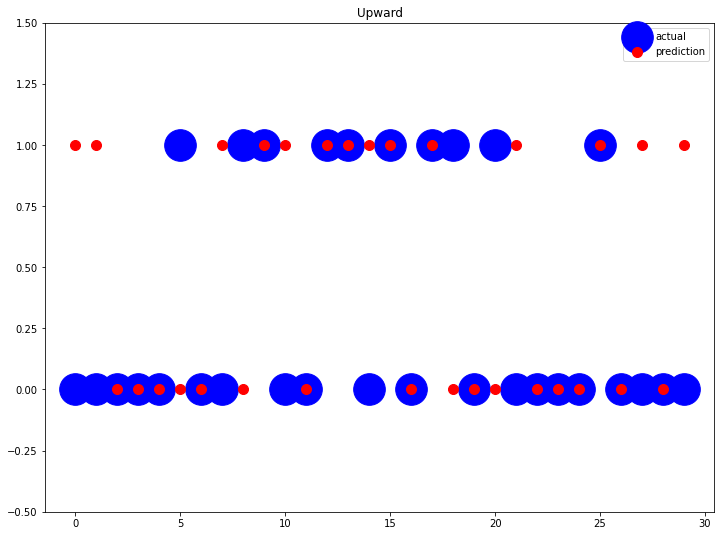

accuracy 0.6
[[12  8]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.75      0.60      0.67        20
          상승       0.43      0.60      0.50        10

    accuracy                           0.60        30
   macro avg       0.59      0.60      0.58        30
weighted avg       0.64      0.60      0.61        30


 41
몇 번 돌림 30


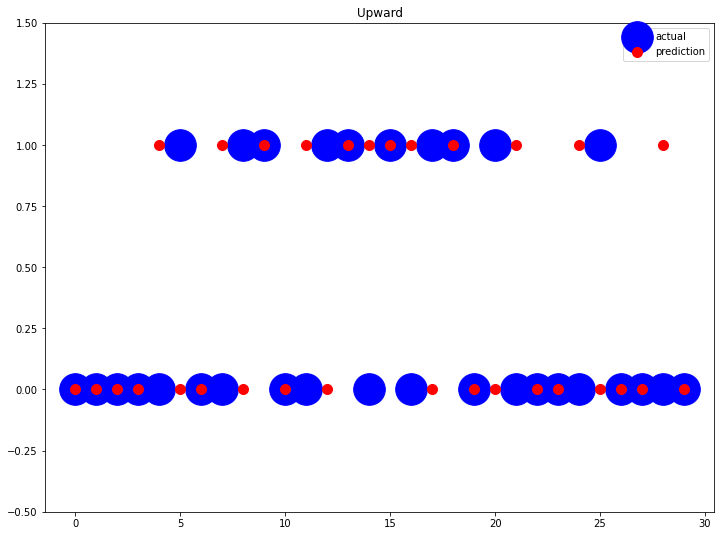

accuracy 0.5333333333333333
[[12  8]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.67      0.60      0.63        20
          상승       0.33      0.40      0.36        10

    accuracy                           0.53        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.56      0.53      0.54        30


 41
몇 번 돌림 31


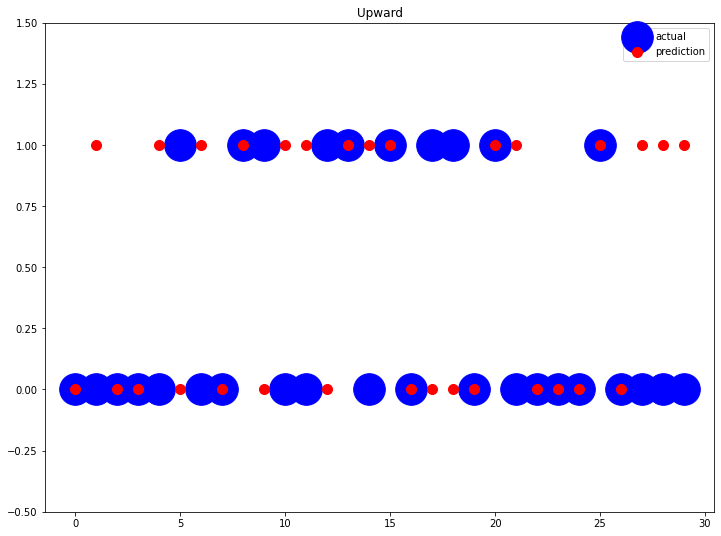

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 41
몇 번 돌림 32


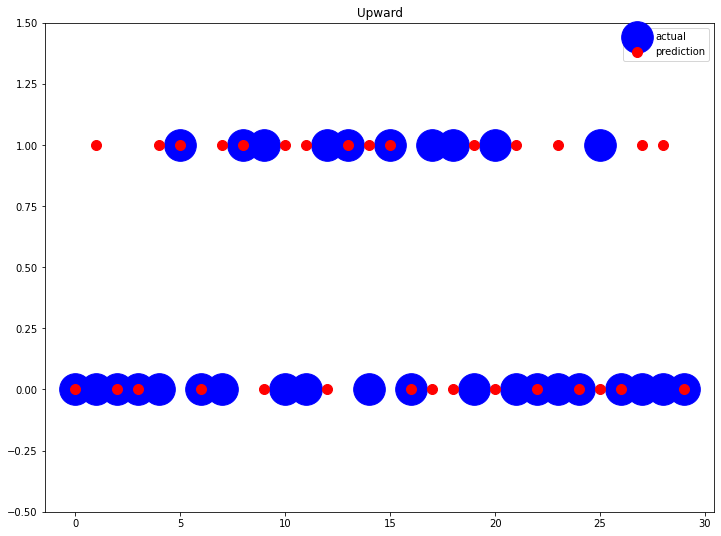

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 41
몇 번 돌림 33


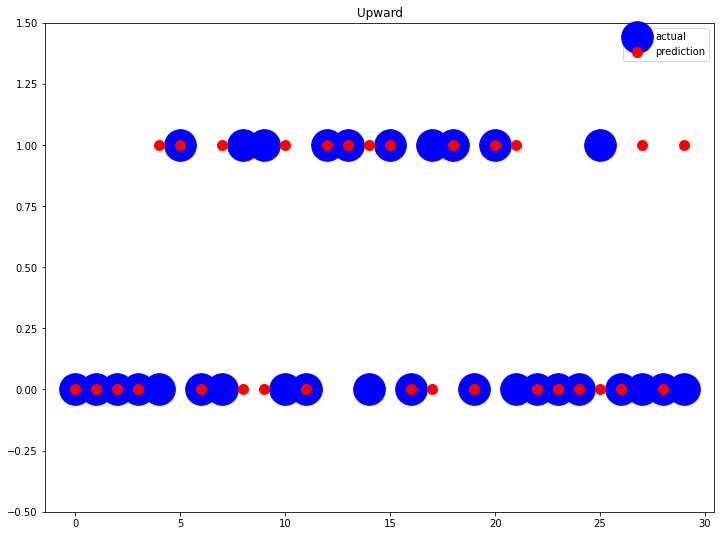

accuracy 0.6333333333333333
[[13  7]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.76      0.65      0.70        20
          상승       0.46      0.60      0.52        10

    accuracy                           0.63        30
   macro avg       0.61      0.62      0.61        30
weighted avg       0.66      0.63      0.64        30


 41
몇 번 돌림 34


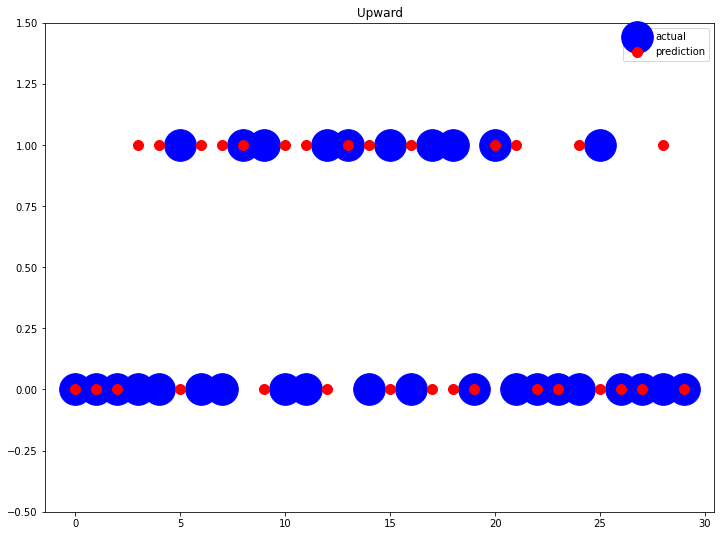

accuracy 0.4
[[ 9 11]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.56      0.45      0.50        20
          상승       0.21      0.30      0.25        10

    accuracy                           0.40        30
   macro avg       0.39      0.38      0.38        30
weighted avg       0.45      0.40      0.42        30


 41
몇 번 돌림 35


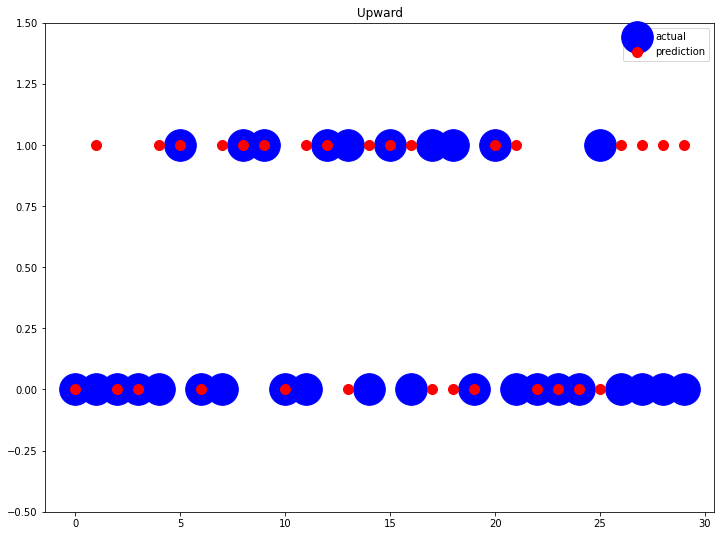

accuracy 0.5
[[ 9 11]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.69      0.45      0.55        20
          상승       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30


 41
몇 번 돌림 36


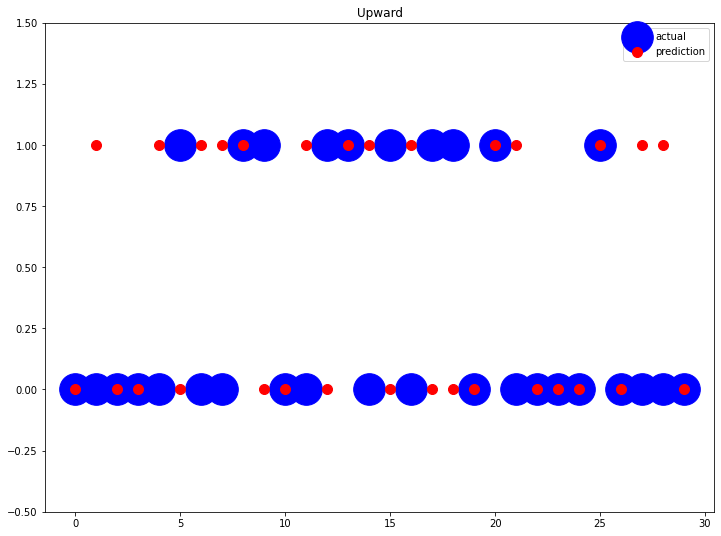

accuracy 0.4666666666666667
[[10 10]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.62      0.50      0.56        20
          상승       0.29      0.40      0.33        10

    accuracy                           0.47        30
   macro avg       0.46      0.45      0.44        30
weighted avg       0.51      0.47      0.48        30


 41
몇 번 돌림 37


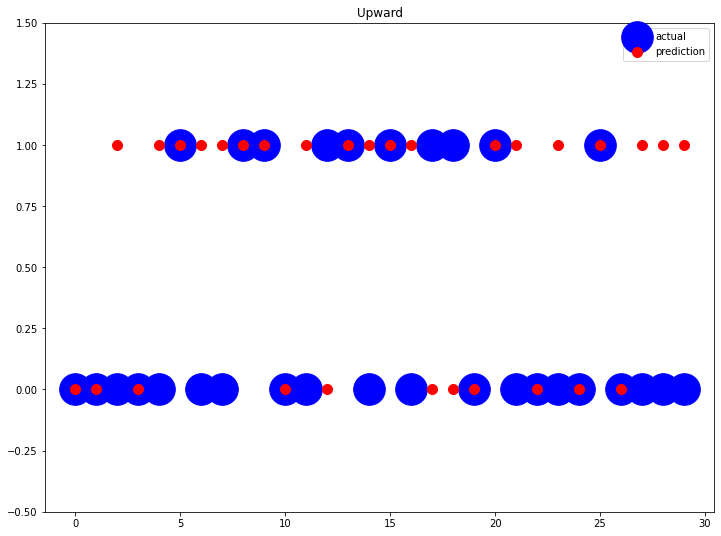

accuracy 0.5
[[ 8 12]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.73      0.40      0.52        20
          상승       0.37      0.70      0.48        10

    accuracy                           0.50        30
   macro avg       0.55      0.55      0.50        30
weighted avg       0.61      0.50      0.51        30


 41
몇 번 돌림 38


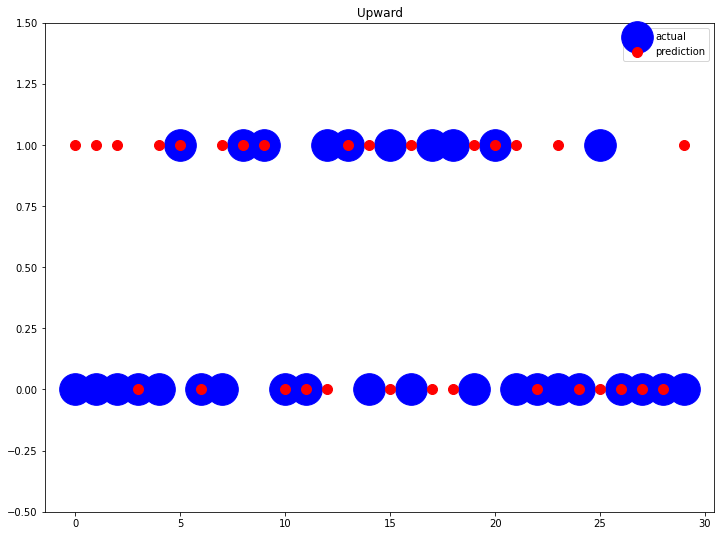

accuracy 0.4666666666666667
[[ 9 11]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.64      0.45      0.53        20
          상승       0.31      0.50      0.38        10

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.46        30
weighted avg       0.53      0.47      0.48        30


 41
몇 번 돌림 39


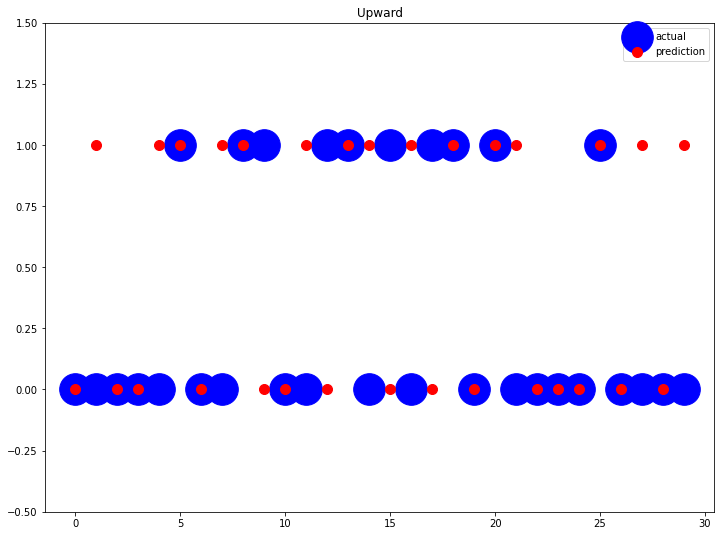

accuracy 0.5666666666666667
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

          하락       0.73      0.55      0.63        20
          상승       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30


 41
몇 번 돌림 40


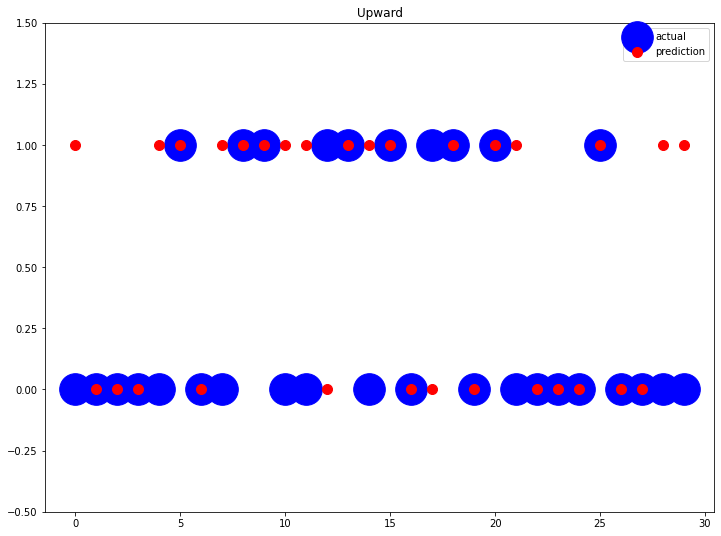

accuracy 0.6333333333333333
[[11  9]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.85      0.55      0.67        20
          상승       0.47      0.80      0.59        10

    accuracy                           0.63        30
   macro avg       0.66      0.68      0.63        30
weighted avg       0.72      0.63      0.64        30


 41
몇 번 돌림 41


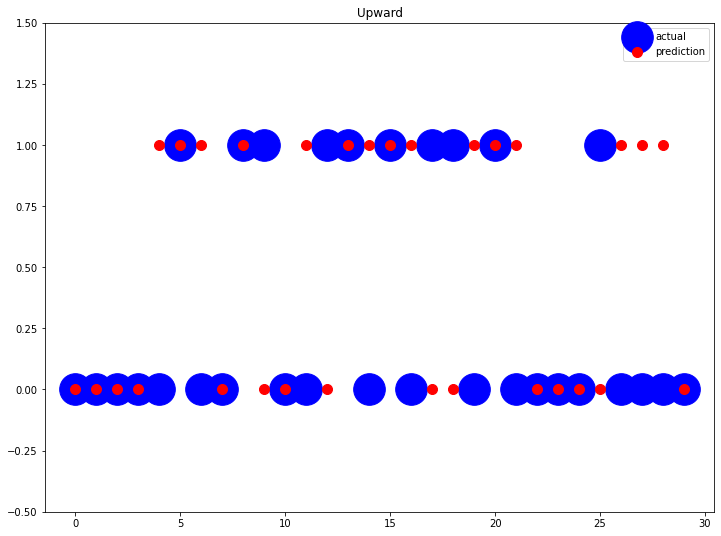

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 41
몇 번 돌림 42


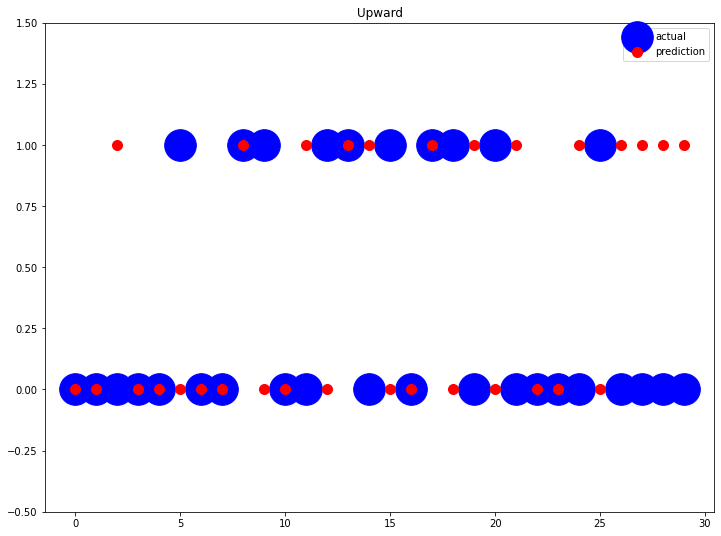

accuracy 0.43333333333333335
[[10 10]
 [ 7  3]]
              precision    recall  f1-score   support

          하락       0.59      0.50      0.54        20
          상승       0.23      0.30      0.26        10

    accuracy                           0.43        30
   macro avg       0.41      0.40      0.40        30
weighted avg       0.47      0.43      0.45        30


 41
몇 번 돌림 43


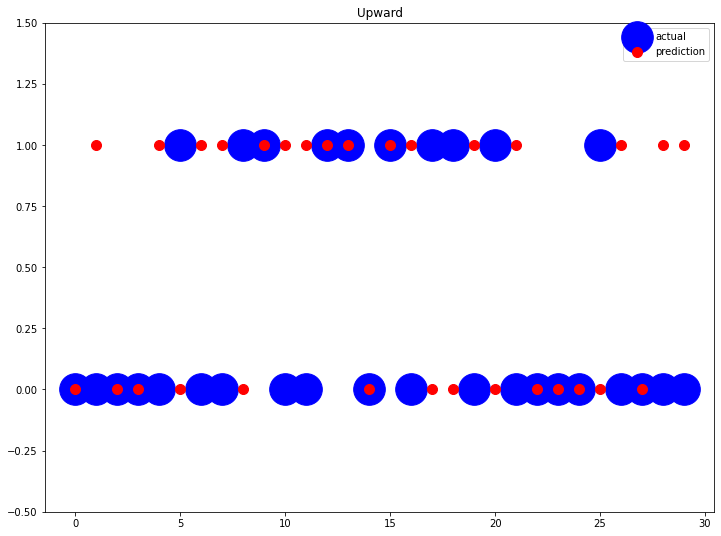

accuracy 0.4
[[ 8 12]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.57      0.40      0.47        20
          상승       0.25      0.40      0.31        10

    accuracy                           0.40        30
   macro avg       0.41      0.40      0.39        30
weighted avg       0.46      0.40      0.42        30


 41
몇 번 돌림 44


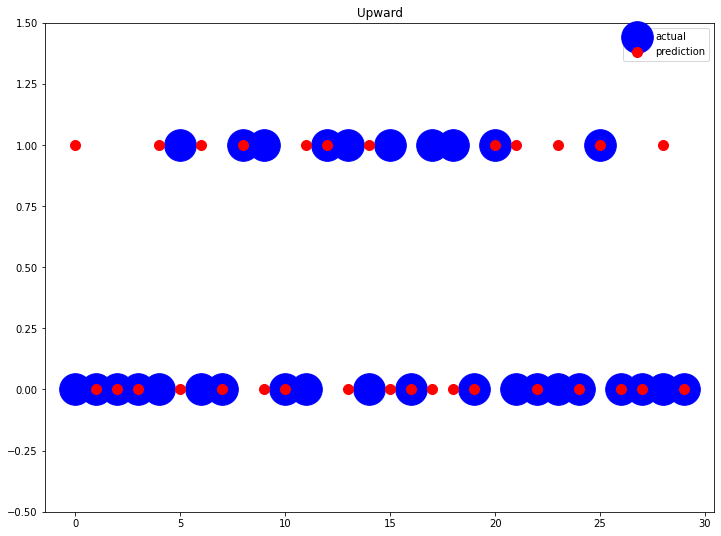

accuracy 0.5333333333333333
[[12  8]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.67      0.60      0.63        20
          상승       0.33      0.40      0.36        10

    accuracy                           0.53        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.56      0.53      0.54        30


 41
몇 번 돌림 45


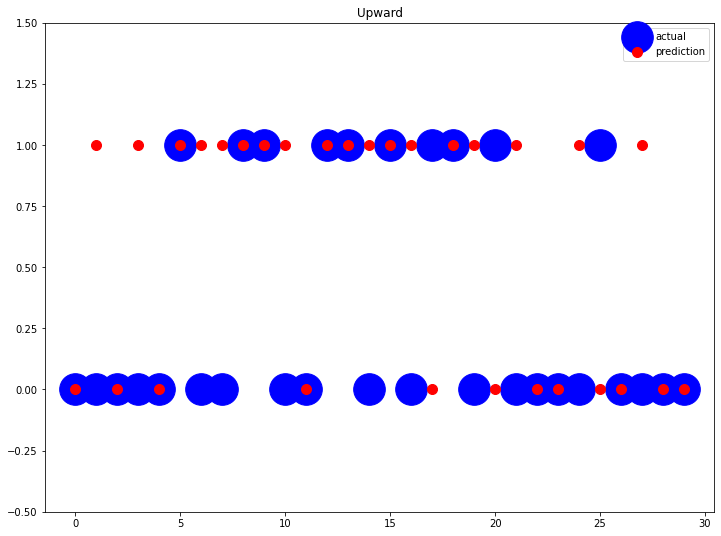

accuracy 0.5333333333333333
[[ 9 11]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.75      0.45      0.56        20
          상승       0.39      0.70      0.50        10

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.63      0.53      0.54        30


 41
몇 번 돌림 46


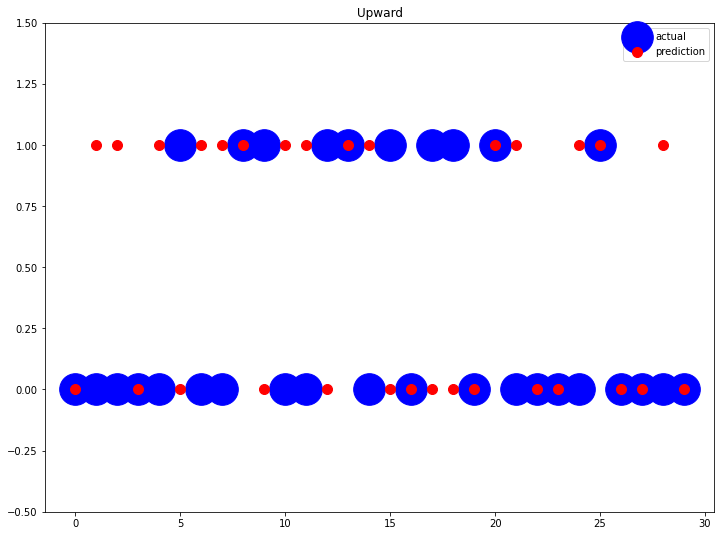

accuracy 0.43333333333333335
[[ 9 11]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.60      0.45      0.51        20
          상승       0.27      0.40      0.32        10

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.42        30
weighted avg       0.49      0.43      0.45        30


 41
몇 번 돌림 47


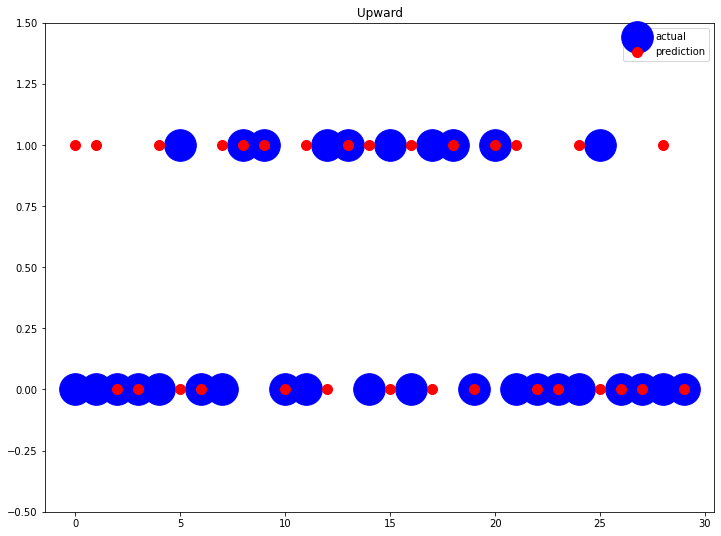

accuracy 0.5
[[10 10]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.67      0.50      0.57        20
          상승       0.33      0.50      0.40        10

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.56      0.50      0.51        30


 41
몇 번 돌림 48


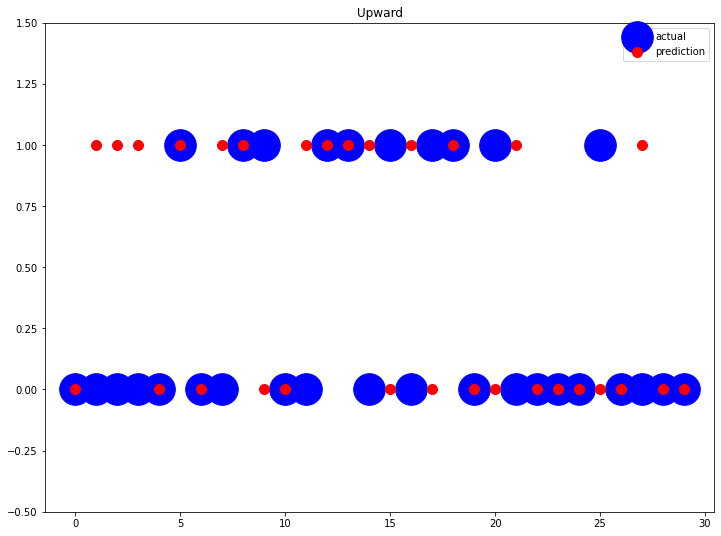

accuracy 0.5333333333333333
[[11  9]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.69      0.55      0.61        20
          상승       0.36      0.50      0.42        10

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30


 41
몇 번 돌림 49


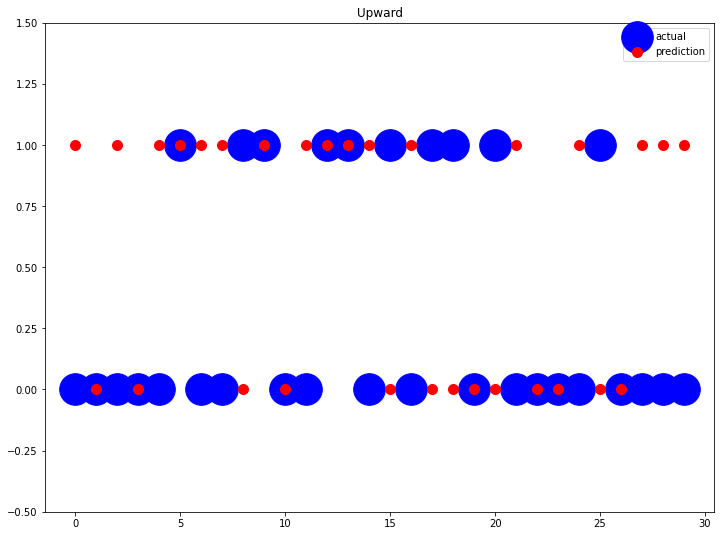

accuracy 0.36666666666666664
[[ 7 13]
 [ 6  4]]
              precision    recall  f1-score   support

          하락       0.54      0.35      0.42        20
          상승       0.24      0.40      0.30        10

    accuracy                           0.37        30
   macro avg       0.39      0.38      0.36        30
weighted avg       0.44      0.37      0.38        30



In [ ]:
epoch = [37,38,39,40,41 ]

for i in epoch:

  for j in range(50):

    print('\n', i)
    print('몇 번 돌림', j)

  
    model = Sequential()

    # model.add(GRU(32, 
    #            input_shape=(train_feature1.shape[1], train_feature1.shape[2]), 
    #            activation='tanh', return_sequences = True))

    # model.add(GRU(64, 
    #           input_shape=(train_feature1.shape[1], train_feature1.shape[2]), 
    #            activation='tanh', return_sequences = True))

    model.add(SimpleRNN(64, 
               activation='tanh', return_sequences = True))

    model.add(SimpleRNN(256, 
               activation='tanh', return_sequences = True))

    model.add(SimpleRNN(32, 
               activation='tanh'))

    model.add(Dense(2, activation='softmax'))


    # 학습
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=62, epochs=i, verbose=0)  


    # 예측
    pred = model.predict(test_feature)

    model.save('/content/drive/MyDrive/Colab Notebooks/bnk/모델/mnist_mlp_model{}{}.h5'.format(i,j))

    preds = np.argmax(pred, axis=1)

    preds1 = pd.get_dummies(preds)

    plt.figure(figsize=(12, 9))
    plt.scatter(pd.DataFrame(test_label).index, test_label[:,1], label = 'actual', s = 1000, c = 'b')
    plt.scatter(pd.DataFrame(test_label).index, preds1[1], label = 'prediction', s= 100, c = 'red')
    plt.ylim([-0.5, 1.5])
    plt.title("Upward") 
    plt.legend()
    plt.show()

    test_label1 = np.array(test_label).argmax(axis=1)

    # 성능평가: 하나로 묶어서
    print('accuracy',mt.accuracy_score(test_label1,preds))
    print(confusion_matrix(test_label1, preds))
    print(classification_report(test_label1, preds, target_names=['하락', '상승']))

# 여기다이

In [ ]:
# 모델 생성
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, GRU, SimpleRNN
import tensorflow as tf

In [ ]:
epoch = [ 31 ]

for i in epoch:

  for j in range(50):

    print('\n', i)
    print('몇 번 돌림', j)

  
    model = Sequential()

    model.add(GRU(32, 
               input_shape=(train_feature1.shape[1], train_feature1.shape[2]), 
               activation='tanh', return_sequences = True))

    model.add(GRU(64, 
               activation='tanh', return_sequences = True))

    model.add(GRU(128, 
               activation='tanh', return_sequences = True))

    model.add(GRU(256, 
               activation='tanh', return_sequences = True))

    model.add(GRU(512, 
               activation='tanh'))

    model.add(Dense(2, activation='softmax'))


    # 학습
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=31, epochs=31, verbose=0)  


    # 예측
    pred = model.predict(test_feature)

    model.save('/content/drive/MyDrive/Colab Notebooks/bnk/모델/aaa_dbgskafsdhg_mnist_mlp_model{}{}.h5'.format(i,j))

    preds = np.argmax(pred, axis=1)

    preds1 = pd.get_dummies(preds)

    test_label1 = np.array(test_label).argmax(axis=1)

    # 성능평가: 하나로 묶어서
    print('accuracy',mt.accuracy_score(test_label1,preds))
    print(confusion_matrix(test_label1, preds))
    print(classification_report(test_label1, preds, target_names=['하락', '상승']))


 31
몇 번 돌림 0
accuracy 0.5666666666666667
[[12  8]
 [ 5  5]]
              precision    recall  f1-score   support

          하락       0.71      0.60      0.65        20
          상승       0.38      0.50      0.43        10

    accuracy                           0.57        30
   macro avg       0.55      0.55      0.54        30
weighted avg       0.60      0.57      0.58        30


 31
몇 번 돌림 1
accuracy 0.5333333333333333
[[ 8 12]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.80      0.40      0.53        20
          상승       0.40      0.80      0.53        10

    accuracy                           0.53        30
   macro avg       0.60      0.60      0.53        30
weighted avg       0.67      0.53      0.53        30


 31
몇 번 돌림 2
accuracy 0.5
[[ 7 13]
 [ 2  8]]
              precision    recall  f1-score   support

          하락       0.78      0.35      0.48        20
          상승       0.38      0.80      0.52        10

    accuracy  

KeyboardInterrupt: ignored

# 저장 모델 불러오기

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/bnk/활용 모델/GRU_SelectedVariables_0.63_model3114.h5')

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_70 (GRU)                 (None, 7, 32)             4896      
_________________________________________________________________
gru_71 (GRU)                 (None, 7, 64)             18816     
_________________________________________________________________
gru_72 (GRU)                 (None, 7, 128)            74496     
_________________________________________________________________
gru_73 (GRU)                 (None, 7, 256)            296448    
_________________________________________________________________
gru_74 (GRU)                 (None, 512)               1182720   
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 1026      
Total params: 1,578,402
Trainable params: 1,578,402
Non-trainable params: 0
___________________________________________

In [ ]:
pred = model.predict(test_feature)

preds = np.argmax(pred, axis=1)

preds1 = pd.get_dummies(preds)

test_label1 = np.array(test_label).argmax(axis=1)

# 성능평가: 하나로 묶어서
print('accuracy',mt.accuracy_score(test_label1,preds))
print(confusion_matrix(test_label1, preds))
print(classification_report(test_label1, preds, target_names=['하락', '상승']))

accuracy 0.6333333333333333
[[12  8]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.80      0.60      0.69        20
          상승       0.47      0.70      0.56        10

    accuracy                           0.63        30
   macro avg       0.63      0.65      0.62        30
weighted avg       0.69      0.63      0.64        30



In [ ]:
# 예측
    pred = model.predict(test_feature)

    model.save('/content/drive/MyDrive/Colab Notebooks/bnk/모델/dbgskafsdhg_mnist_mlp_model{}{}.h5'.format(i,j))

    preds = np.argmax(pred, axis=1)

    preds1 = pd.get_dummies(preds)

    test_label1 = np.array(test_label).argmax(axis=1)

    # 성능평가: 하나로 묶어서
    print('accuracy',mt.accuracy_score(test_label1,preds))
    print(confusion_matrix(test_label1, preds))
    print(classification_report(test_label1, preds, target_names=['하락', '상승']))


 0


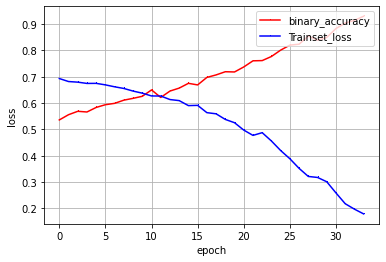

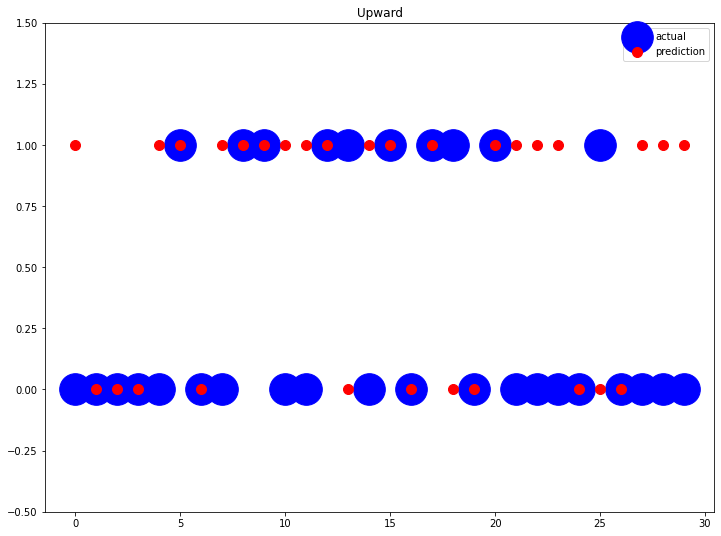

accuracy 0.5
[[ 8 12]
 [ 3  7]]
              precision    recall  f1-score   support

          하락       0.73      0.40      0.52        20
          상승       0.37      0.70      0.48        10

    accuracy                           0.50        30
   macro avg       0.55      0.55      0.50        30
weighted avg       0.61      0.50      0.51        30



In [ ]:
from keras import optimizers
from keras.layers import Dropout

for i in range(1):

  print('\n', i)

  # 모델
  model = Sequential()
  
  # model.add(GRU(32, 
  #              activation='tanh', return_sequences = True))
  
  model.add(GRU(64,
               activation='tanh', return_sequences = True))
  
  model.add(GRU(258,
               activation='tanh'))
  
  model.add(Dense(2, activation='softmax'))


  # 학습
  model.compile(loss='binary_crossentropy', optimizer= optimizers.Adam() ,  metrics=['acc'])  

  history = model.fit(x_train, y_train, batch_size=62, epochs= 34, verbose=0)  

  # 그래프 그리기
  y_test_loss = history.history['acc']
  y_train_loss = history.history['loss']

  x_len = np.arange(len(y_test_loss))
  plt.plot(x_len, y_test_loss, marker=',', c='red', label='binary_accuracy')
  plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

  plt.legend(loc='upper right')
  plt.grid()
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()


  for i in range(1):
    # 예측
    pred = model.predict(test_feature)

    preds = np.argmax(pred, axis=1)

    preds1 = pd.get_dummies(preds)

    plt.figure(figsize=(12, 9))
    plt.scatter(pd.DataFrame(test_label).index, test_label[:,1], label = 'actual', s = 1000, c = 'b')
    plt.scatter(pd.DataFrame(test_label).index, preds1[1], label = 'prediction', s= 100, c = 'red')
    plt.ylim([-0.5, 1.5])
    plt.title("Upward") 
    plt.legend()
    plt.show()

    test_label1 = np.array(test_label).argmax(axis=1)

    # 성능평가: 하나로 묶어서
    print('accuracy',mt.accuracy_score(test_label1,preds))
    print(confusion_matrix(test_label1, preds))
    print(classification_report(test_label1, preds, target_names=['하락', '상승']))